# Variability of Higher-Order Network Statistics

In [3]:
# load all third part libraries
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import bct
import scipy as sp
import scipy.stats
import networkx as nx

In [4]:
# load networks
mplex2 = np.load('/Users/nick/desktop/mplex/data/mplex300_partial.npy') # normalized already
#mplex2 = mplex2.reshape(820,300,300)
#print mplex_orig.shape
mplex1 = np.load('/Users/nick/desktop/mplex/data/mplex300.npy') # shape = (820,300,300) # not normalized
mplex1_unnorm = mplex1.copy()
# load subject id's
#subjects = np.loadtxt('/Users/nick/desktop/mplex/data/subjectIDs.txt',dtype=np.int64) # shape = (820,)
# load cogntive data
cog_head, cog_vals = np.load('/Users/nick/desktop/mplex/data/demo.npy')

age22_25_indices = np.where(cog_vals[:,4]=='22-25')[0]
age26_30_indices = np.where(cog_vals[:,4]=='26-30')[0]
age31_35_indices = np.where(cog_vals[:,4]=='31-35')[0]
age_36p_indices = np.where(cog_vals[:,4]=='36+')[0] # not used


len1 = len(age22_25_indices)
len2 = len(age26_30_indices)
len3 = len(age31_35_indices)
print len1,len2,len3

mplex1_1 = mplex1[age22_25_indices,:]
mplex1_2 = mplex1[age26_30_indices,:]
mplex1_3 = mplex1[age31_35_indices,:]
mplex2_1 = mplex2[age22_25_indices,:]
mplex2_2 = mplex2[age26_30_indices,:]
mplex2_3 = mplex2[age31_35_indices,:]


176 350 288


In [5]:
for i in range(len1):
    mplex1_1[i,:,:] = (mplex1_1[i,:,:] - np.mean(mplex1_1[i,:,:]))/np.std(mplex1_1[i,:,:])
    np.fill_diagonal(mplex1_1[i,:,:],0)
for i in range(len2):
    mplex1_2[i,:,:] = (mplex1_2[i,:,:] - np.mean(mplex1_2[i,:,:]))/np.std(mplex1_2[i,:,:])
    np.fill_diagonal(mplex1_2[i,:,:],0)
for i in range(len3):
    mplex1_3[i,:,:] = (mplex1_3[i,:,:] - np.mean(mplex1_3[i,:,:]))/np.std(mplex1_3[i,:,:])
    np.fill_diagonal(mplex1_3[i,:,:],0)


In [6]:
def gen_null(mplex):
    mp = mplex.copy()
    for i in range(mp.shape[0]):
        if i % 100 == 0 : print '%i/%i' %(i,mp.shape[0])
        mp[i,:,:] = bct.randmio_und(mp[i,:,:],5)[0]
    return mp

def z_norm(x):
    """
    Normalize values to be z-scores
    """
    for i in range(820):
        x[i,:,:] = (x[i,:,:] - np.mean(x[i,:,:])) / np.std(x[i,:,:])
    x[x<0] = 0
    return x

def ref_norm(x,y, cut = 4):
    xx = (x - np.mean(x)) / np.std(x)
    xx[xx<-cut] = -cut
    xx[xx>cut] = cut
    yy = (y - np.mean(x)) / np.std(y)
    return xx,yy

def bhat_distance(p,q):
    sp2 = np.var(p)
    sq2 = np.var(q)
    mp = np.mean(p)
    mq = np.mean(q)
    return round(0.25*np.log(0.25*((sp2/sq2)+(sq2/sp2)+2)) + 0.25*((mp-mq)**2 / (sp2+sq2)),3)

In [7]:

thresh = 3

## Age range 1

mp0 = mplex1_1.copy()
mp0[mp0 < thresh] = 0
mp0[mp0 >= thresh] = 1
for i in range(mp0.shape[0]): np.fill_diagonal(mp0[i,:,:],0)
mp0_null = gen_null(mp0)
    
mp1 = mplex1_1.copy()
mp1[mp1 < thresh] = 0
for i in range(mp1.shape[0]): np.fill_diagonal(mp1[i,:,:],0)
mp1_null = gen_null(mp1)

mp3 = mplex2_1.copy()
mp3[mp3 < thresh] = 0
mp3[mp3 >= thresh] = 1
for i in range(mp3.shape[0]): np.fill_diagonal(mp3[i,:,:],0)
mp3_null = gen_null(mp3)
    
mp4 = mplex2_1.copy()
mp4[mp4 < thresh] = 0
for i in range(mp4.shape[0]): np.fill_diagonal(mp4[i,:,:],0)
mp4_null = gen_null(mp4)

## Age range 2

mp6 = mplex1_2.copy()
mp6[mp6 < thresh] = 0
mp6[mp6 >= thresh] = 1
for i in range(mp6.shape[0]): np.fill_diagonal(mp6[i,:,:],0)
mp6_null = gen_null(mp6)
    
mp7 = mplex1_2.copy()
mp7[mp7 < thresh] = 0
for i in range(mp7.shape[0]): np.fill_diagonal(mp7[i,:,:],0)
mp7_null = gen_null(mp7)

mp9 = mplex2_2.copy()
mp9[mp9 < thresh] = 0
mp9[mp9 >= thresh] = 1
for i in range(mp9.shape[0]): np.fill_diagonal(mp9[i,:,:],0)
mp9_null = gen_null(mp9)
    
mp10 = mplex2_2.copy()
mp10[mp10 < thresh] = 0
for i in range(mp10.shape[0]): np.fill_diagonal(mp10[i,:,:],0)
mp10_null = gen_null(mp10)

## Age range 3

mp12 = mplex1_3.copy()
mp12[mp12 < thresh] = 0
mp12[mp12 >= thresh] = 1
for i in range(mp12.shape[0]): np.fill_diagonal(mp12[i,:,:],0)
mp12_null = gen_null(mp12)
    
mp13 = mplex1_3.copy()
mp13[mp13 < thresh] = 0
for i in range(mp13.shape[0]): np.fill_diagonal(mp13[i,:,:],0)
mp13_null = gen_null(mp13)

mp15 = mplex2_3.copy()
mp15[mp15 < thresh] = 0
mp15[mp15 >= thresh] = 1
for i in range(mp15.shape[0]): np.fill_diagonal(mp15[i,:,:],0)
mp15_null = gen_null(mp15)
    
mp16 = mplex2_3.copy()
mp16[mp16 < thresh] = 0
for i in range(mp16.shape[0]): np.fill_diagonal(mp16[i,:,:],0)
mp16_null = gen_null(mp16)



# dont currently include the 36+ age range because there are only 6 subjects

mp_list = [mp0,mp1,mp3,mp4,mp6,mp7,mp9,mp10,mp12,mp13,mp15,mp16]
mp_list_null = [mp0_null,mp1_null,mp3_null,mp4_null,mp6_null,mp7_null,mp9_null,mp10_null,mp12_null,mp13_null,mp15_null,mp16_null]

0/176
100/176
0/176
100/176
0/176
100/176
0/176
100/176
0/350
100/350
200/350
300/350
0/350
100/350
200/350
300/350
0/350
100/350
200/350
300/350
0/350
100/350
200/350
300/350
0/288
100/288
200/288
0/288
100/288
200/288
0/288
100/288
200/288
0/288
100/288
200/288




Cognitive data pre-processing and function for testing correlation between cognitive data and network metrics:

In [6]:
def plot_hist(nb,labels,tag):
    for pidx in range(nb.shape[0]):
        plt.figure(figsize=(7,5))
        brain,random = ref_norm(nb[pidx,:,0],nb[pidx,:,1],cut=4)
        _min = min(np.min(brain),np.min(random))
        _max = max(np.max(brain),np.max(random))
        bins = np.linspace(_min,_max, 100)
        plt.hist(random,label='Null',bins=bins,normed=True,alpha=0.5)
        plt.hist(brain,label='Brain',bins=bins,normed=True,alpha=0.5)
        plt.title('%s : %s - Bhat Distance : %03f' % (tag,labels[pidx],bhat_distance(nb[pidx,:,0],nb[pidx,:,1])))
        plt.xlabel('Brain Network Z-values')
        plt.ylabel('Normalized sBin Frequency')
        plt.legend(loc='best')
        plt.show()

## 1. Centrality

Here, we test full (mplex1) and partial (mplex2) correlation networks using various centrality measures. We perform this analysis for binary, thresholded normalized, and unthresholded normalized versions of each network.

For each metric that returns a vector of values for each individual network, we will take the variance, the max, and the mean.

### 1A. Node Betweenness

Mplex : 0
0/176 


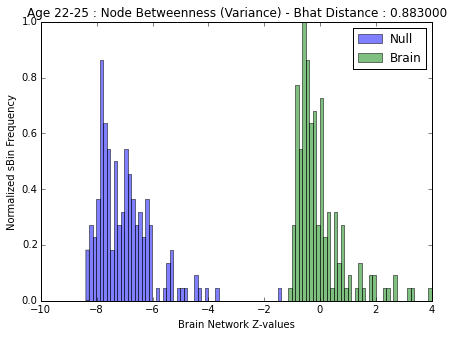

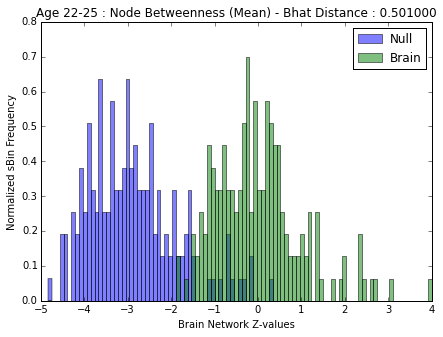

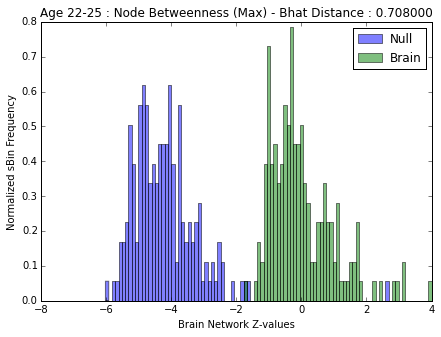

Mplex : 1
0/176 


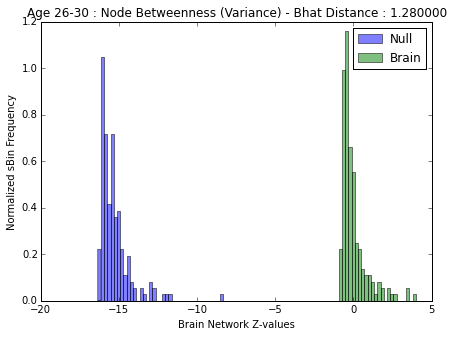

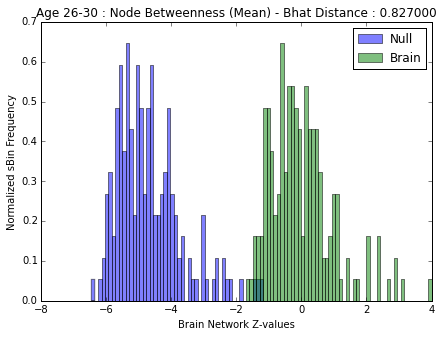

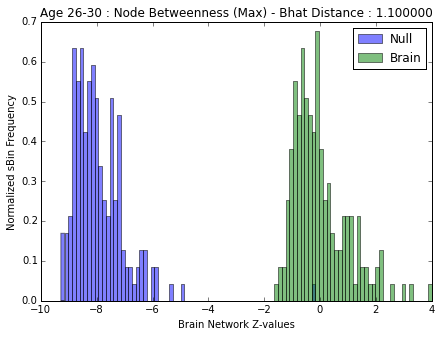

Mplex : 2
0/176 


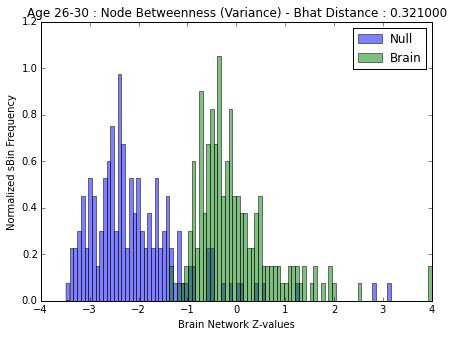

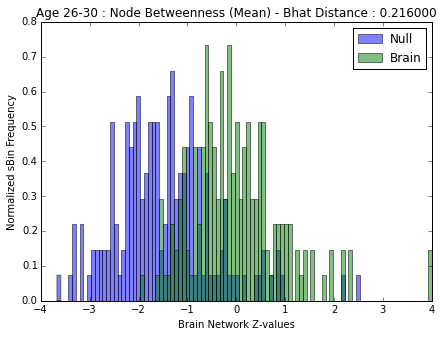

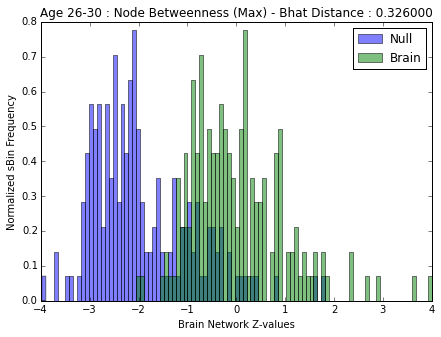

Mplex : 3
0/176 


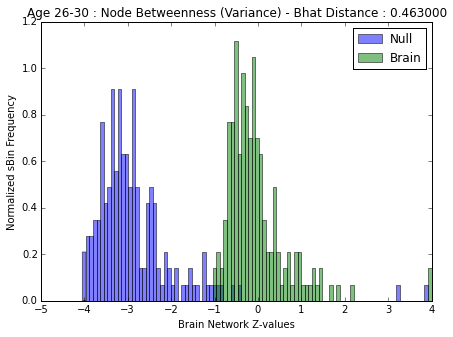

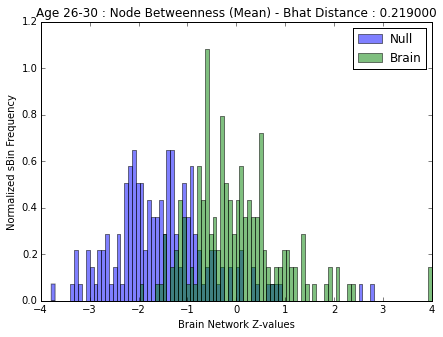

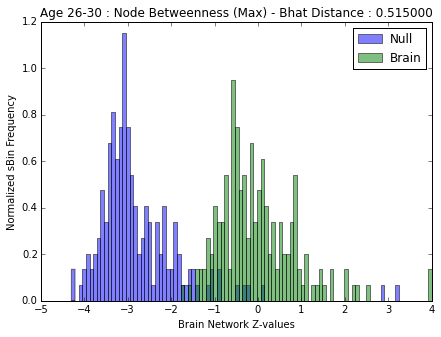

Mplex : 4
0/350 
250/350 


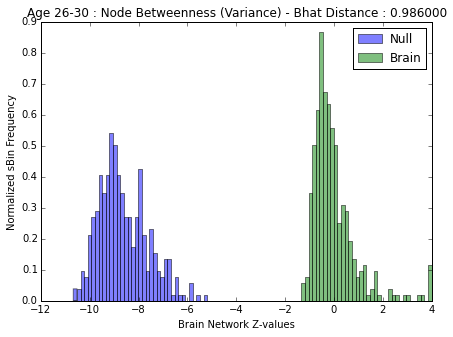

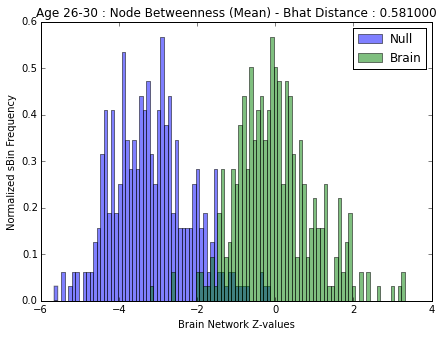

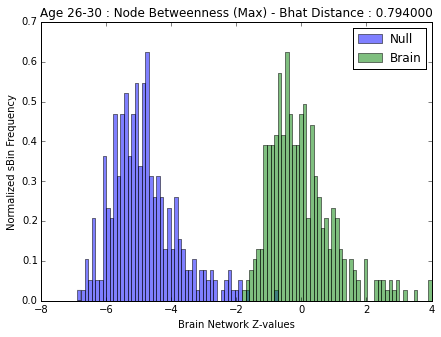

Mplex : 5
0/350 
250/350 


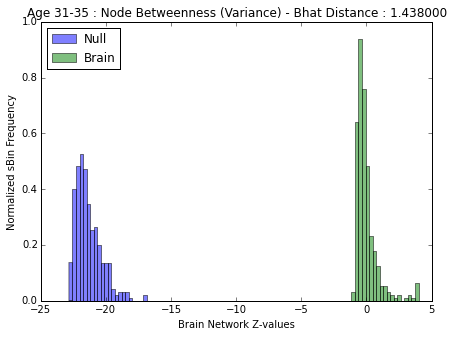

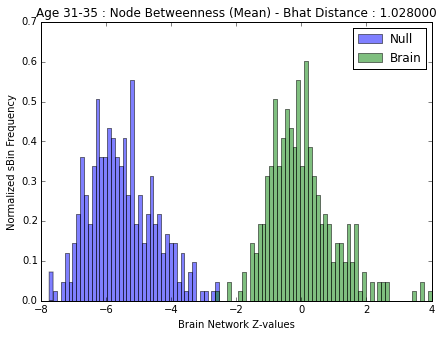

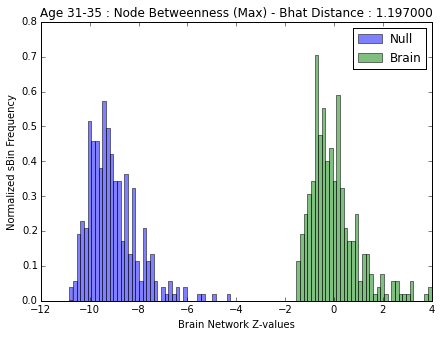

Mplex : 6
0/350 
250/350 


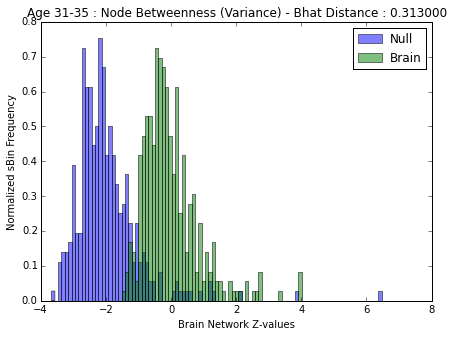

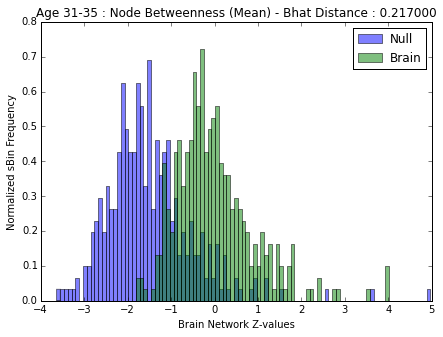

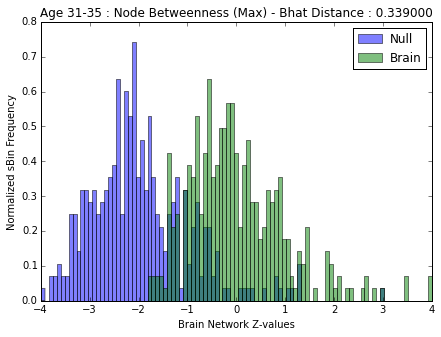

Mplex : 7
0/350 
250/350 


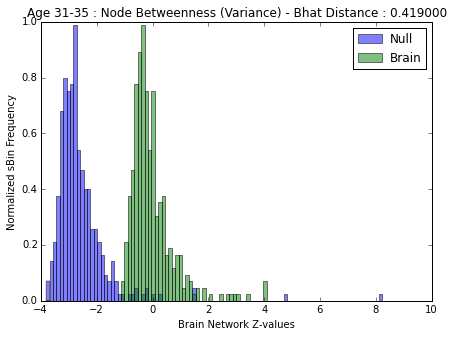

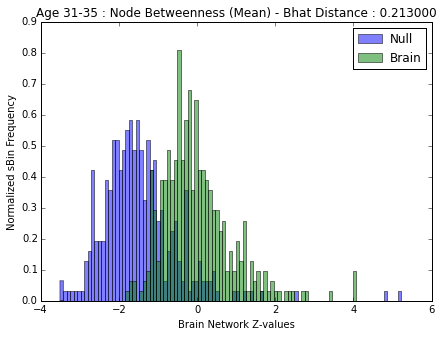

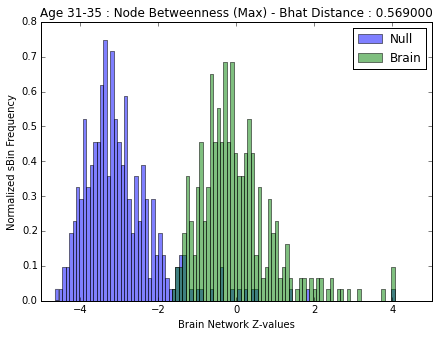

Mplex : 8
0/288 
250/288 


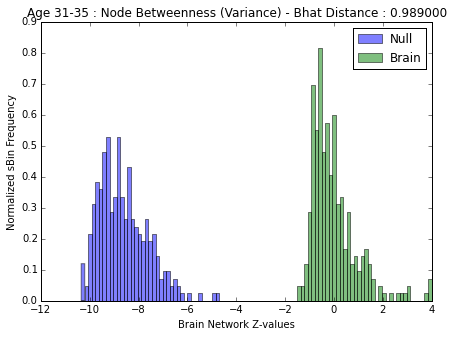

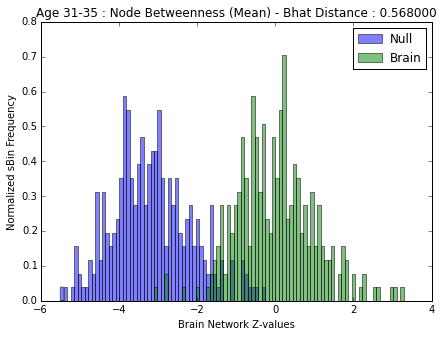

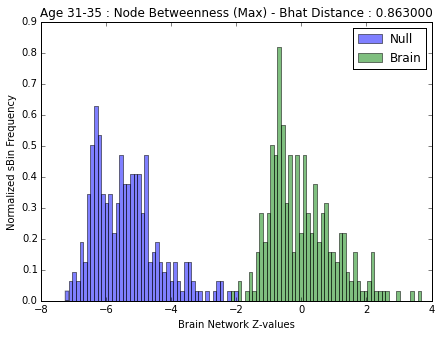

Mplex : 9
0/288 
250/288 


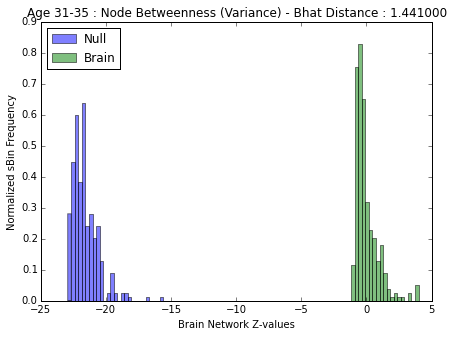

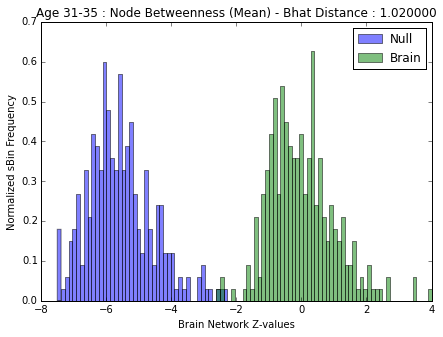

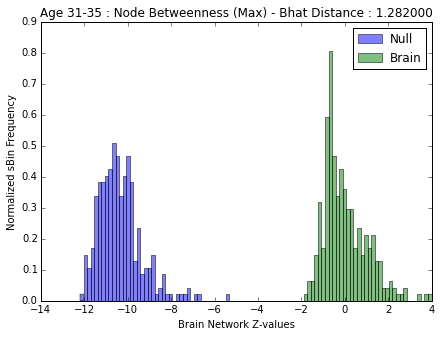

Mplex : 10
0/288 
250/288 


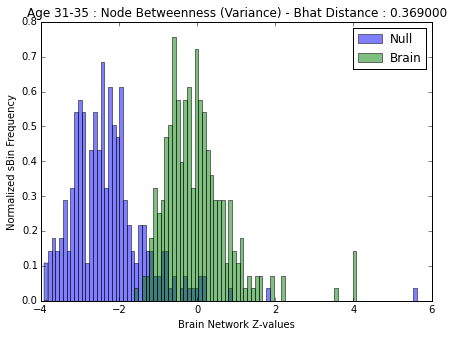

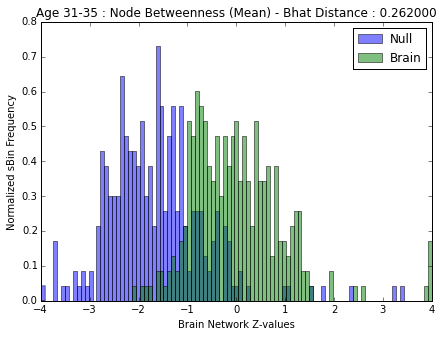

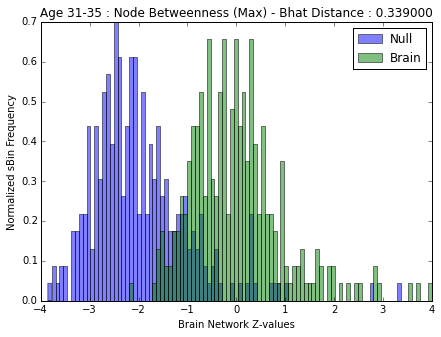

Mplex : 11
0/288 
250/288 


In [7]:
%matplotlib inline
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex :' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.betweenness_bin(net)
        btwn_null = bct.betweenness_bin(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Node Betweenness (Variance)','Node Betweenness (Mean)', 'Node Betweenness (Max)'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Node Betweenness (Variance)','Node Betweenness (Mean)', 'Node Betweenness (Max)'], 'Age 26-30')
    else:
        plot_hist(nb,['Node Betweenness (Variance)','Node Betweenness (Mean)', 'Node Betweenness (Max)'], 'Age 31-35')


### 1B. PageRank

Mplex :  0
0/176 


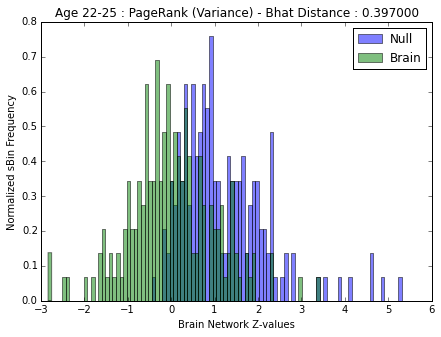

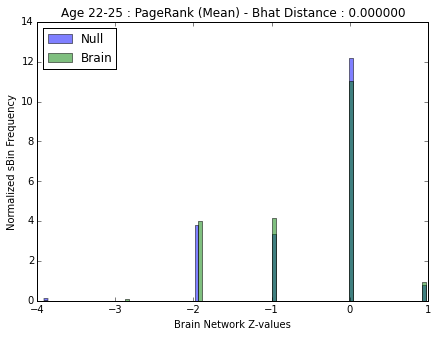

Mplex :  1
0/176 


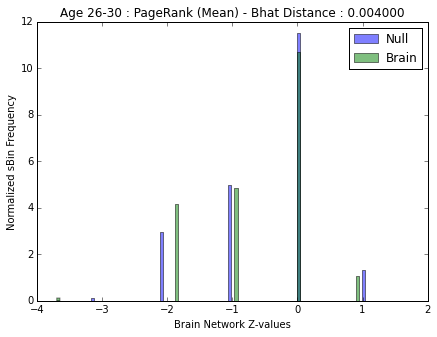

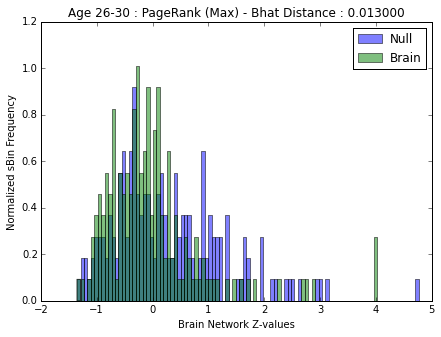

Mplex :  2
0/176 


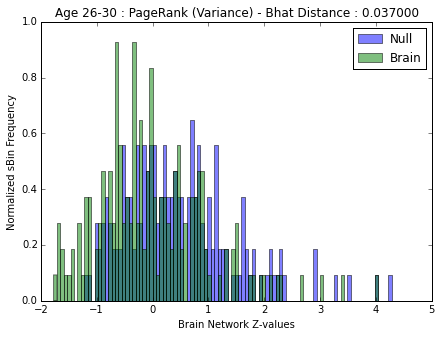

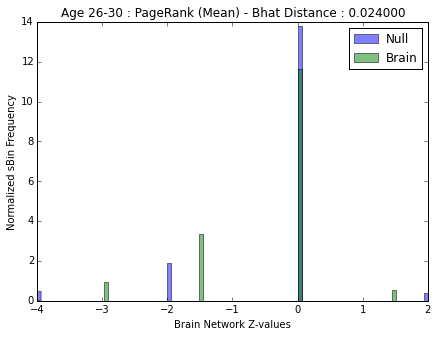

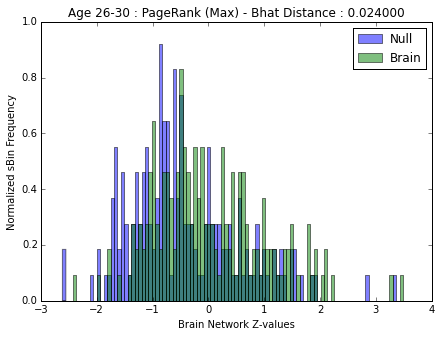

Mplex :  3
0/176 


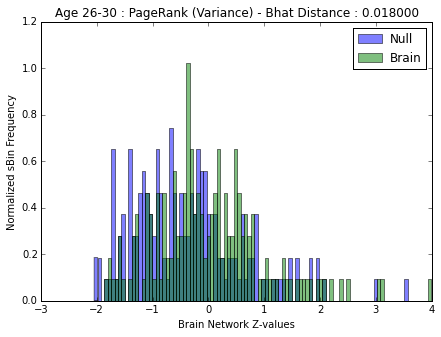

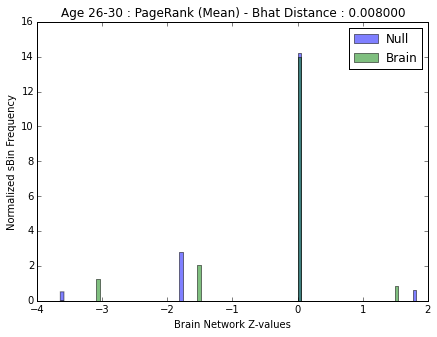

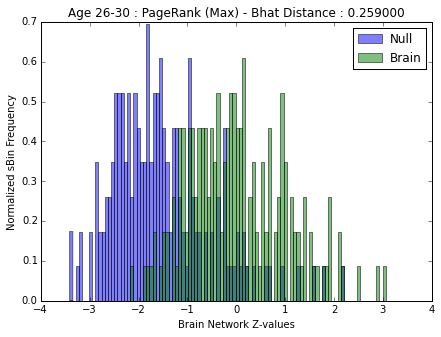

Mplex :  4
0/350 
250/350 


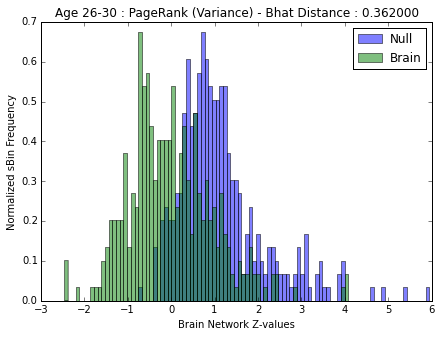

Mplex :  5
0/350 
250/350 


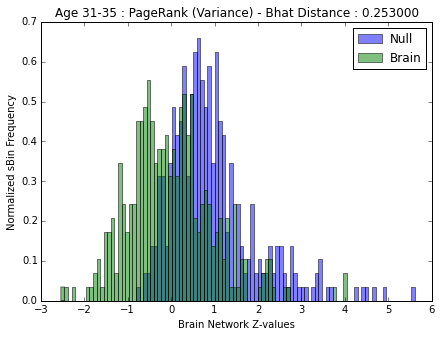

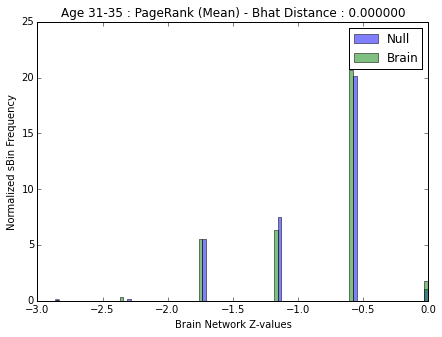

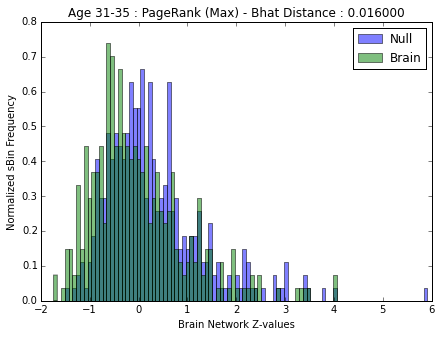

Mplex :  6
0/350 
250/350 


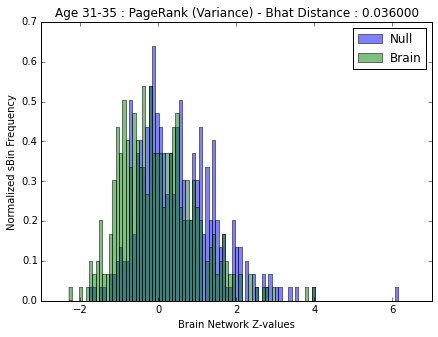

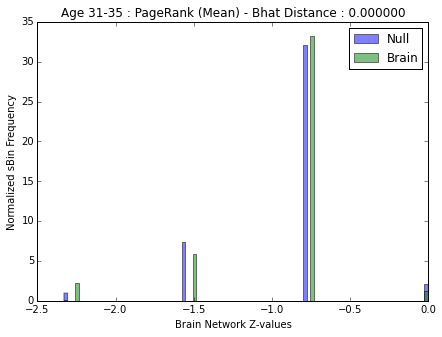

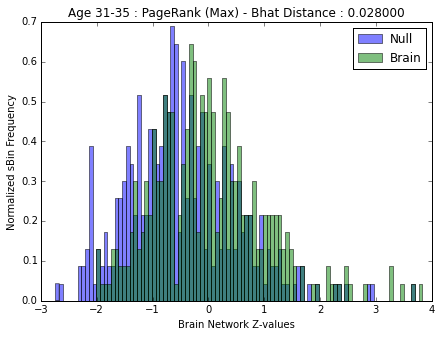

Mplex :  7
0/350 
250/350 


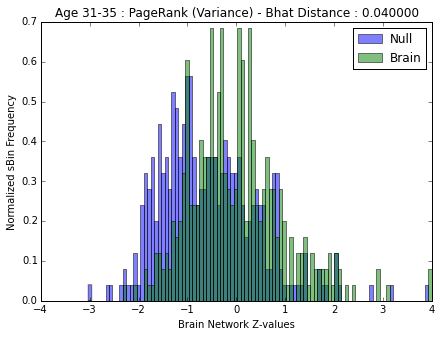

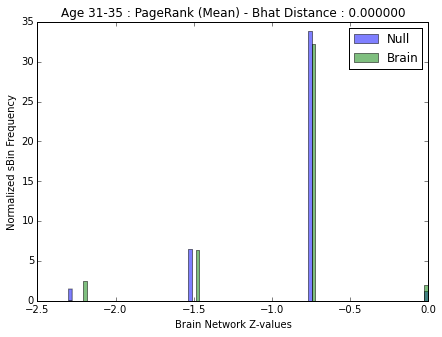

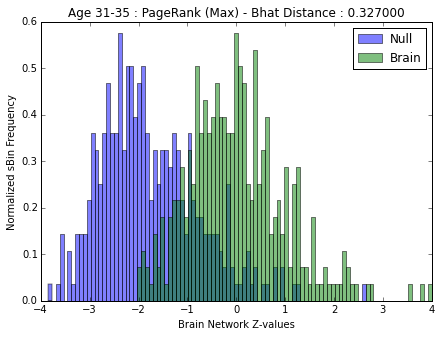

Mplex :  8
0/288 
250/288 


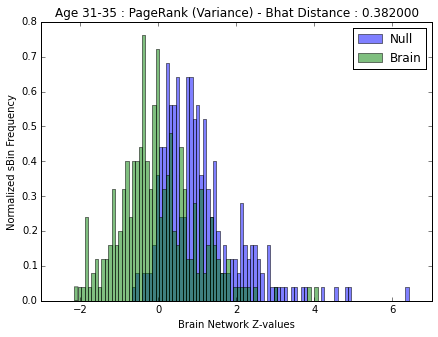

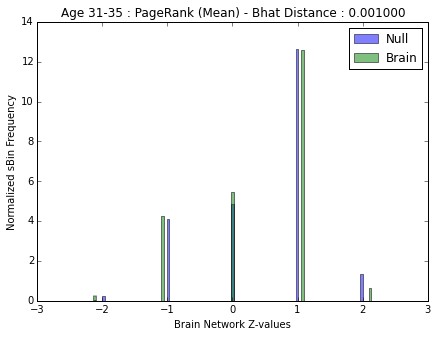

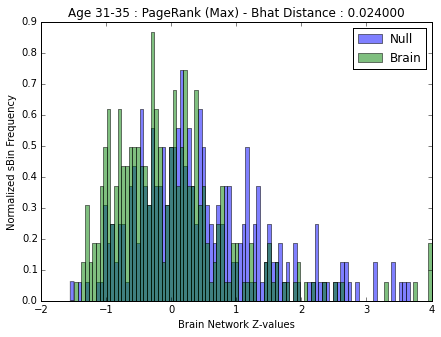

Mplex :  9
0/288 
250/288 


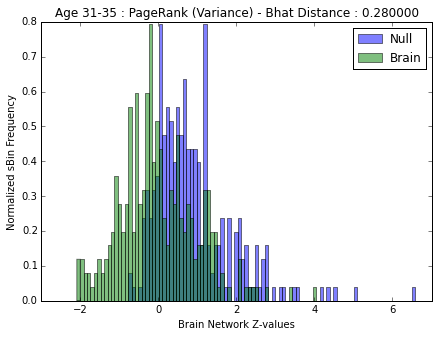

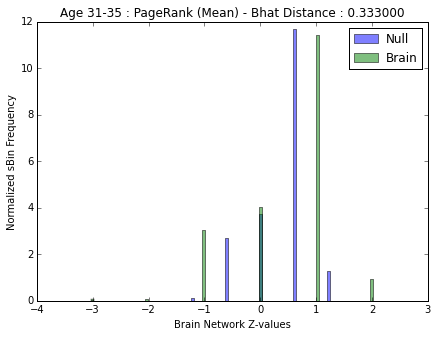

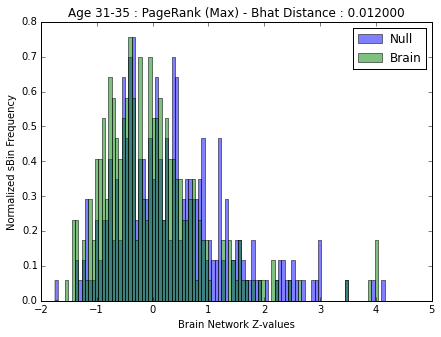

Mplex :  10
0/288 
250/288 


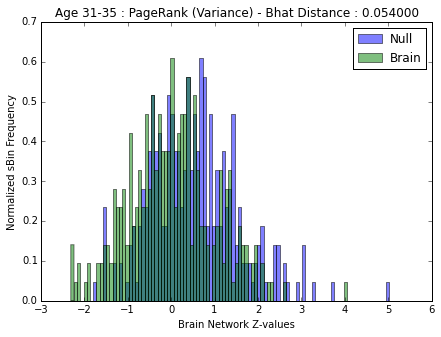

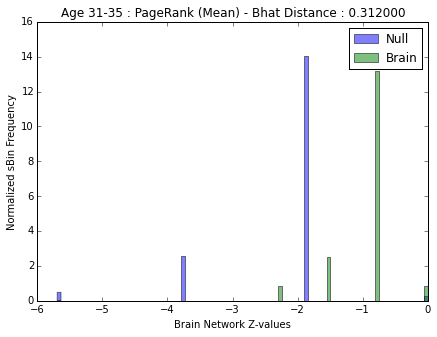

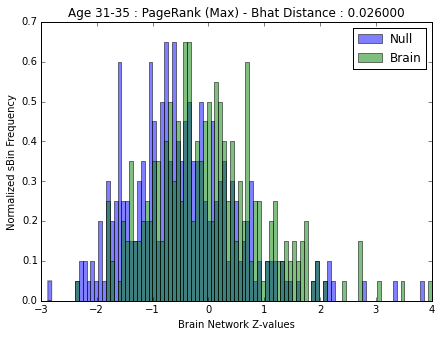

Mplex :  11
0/288 
250/288 


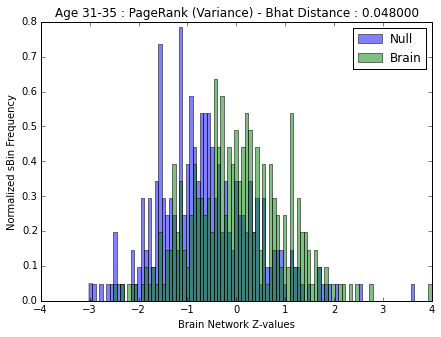

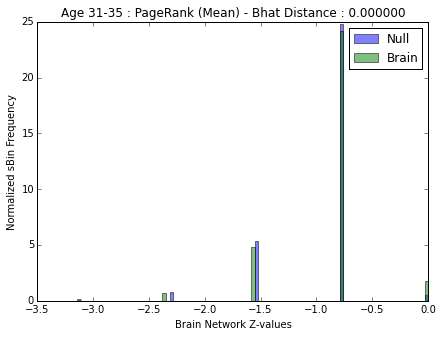

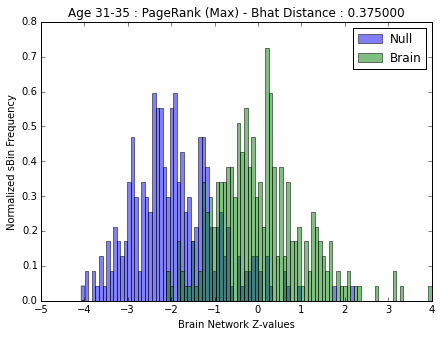

In [8]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.pagerank_centrality(net,0.85)
        btwn_null = bct.pagerank_centrality(null,0.85)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['PageRank (Variance)','PageRank (Mean)', 'PageRank (Max)'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['PageRank (Variance)','PageRank (Mean)', 'PageRank (Max)'], 'Age 26-30')
    else:
        plot_hist(nb,['PageRank (Variance)','PageRank (Mean)', 'PageRank (Max)'], 'Age 31-35')            

### 1C. Eigenvector Centrality

Mplex :  0
0/176 


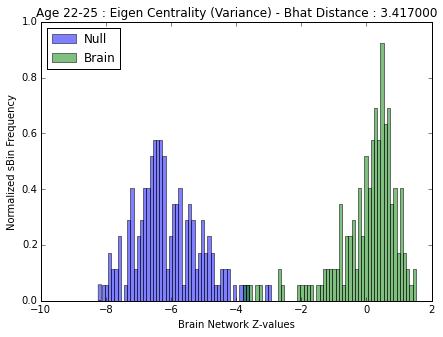

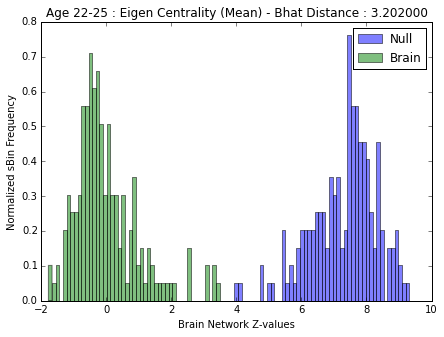

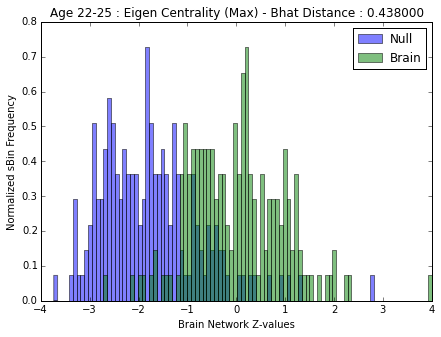

Mplex :  1
0/176 


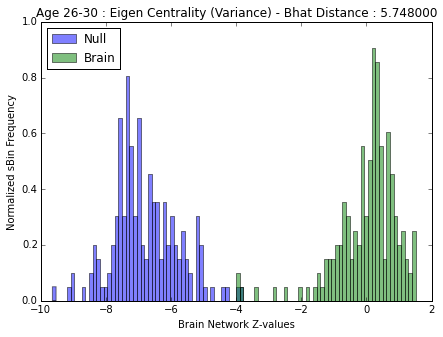

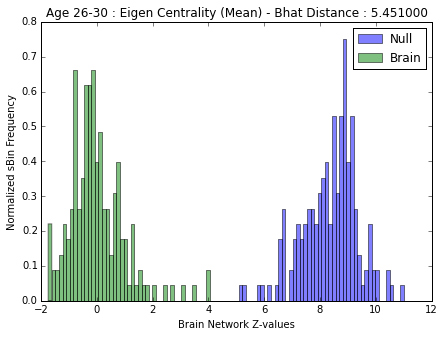

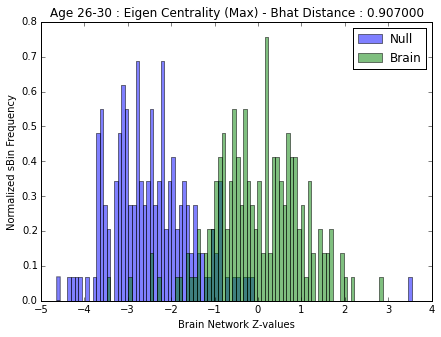

Mplex :  2
0/176 


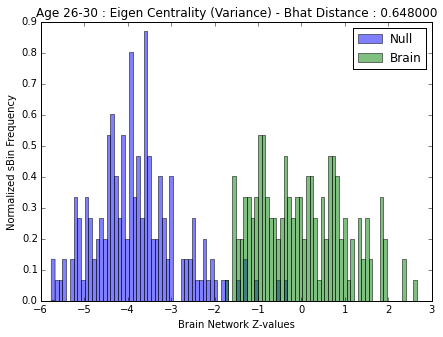

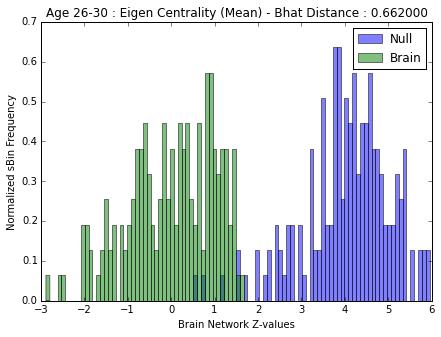

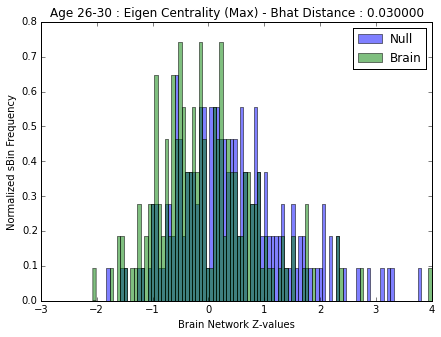

Mplex :  3
0/176 


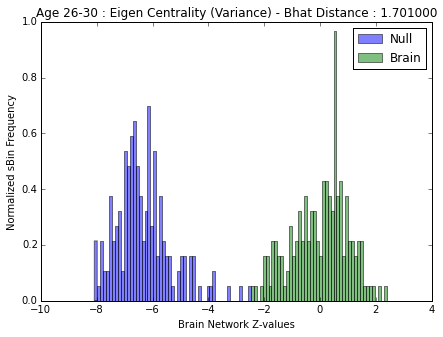

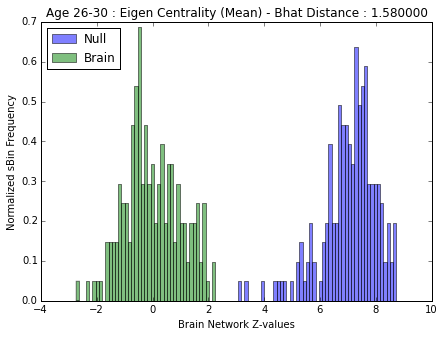

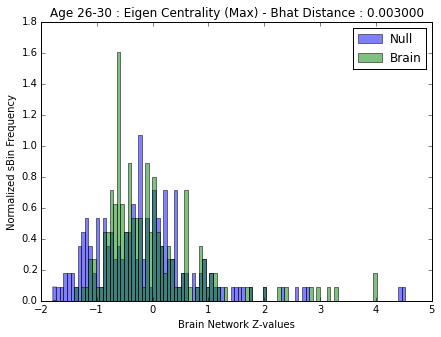

Mplex :  4
0/350 
250/350 


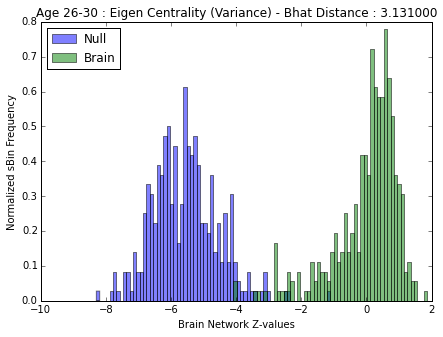

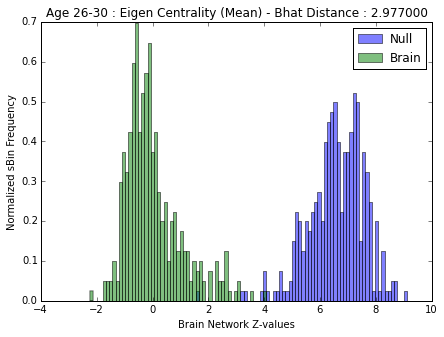

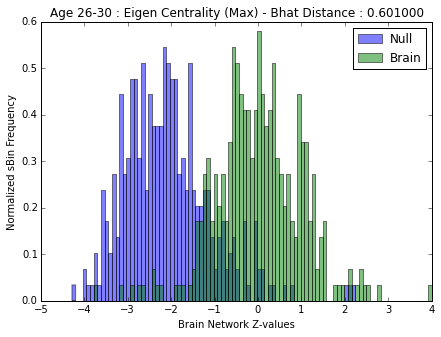

Mplex :  5
0/350 
250/350 


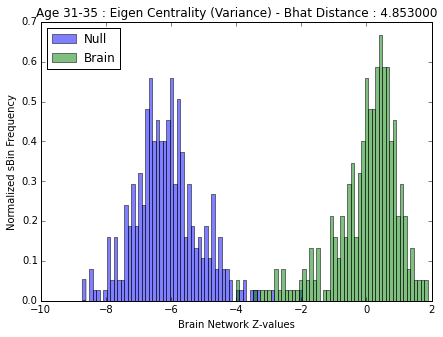

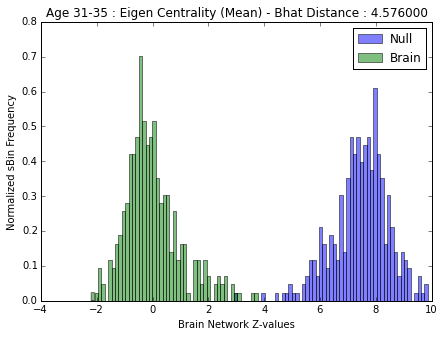

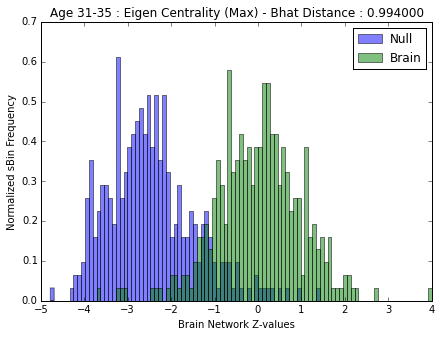

Mplex :  6
0/350 
250/350 


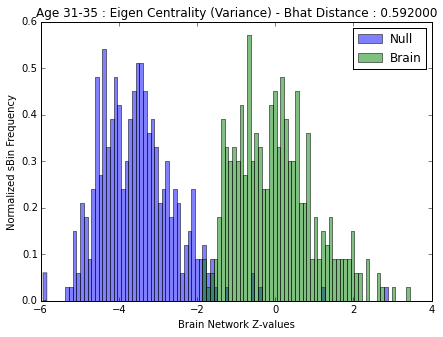

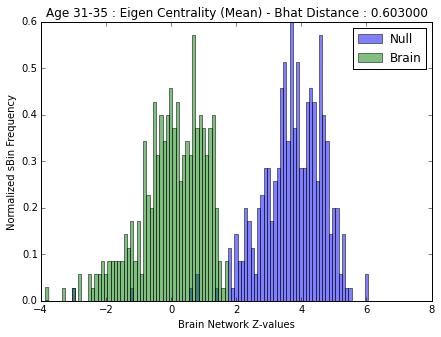

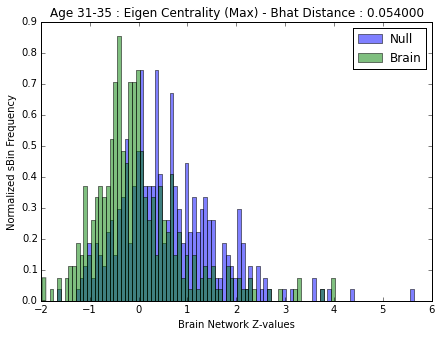

Mplex :  7
0/350 
250/350 


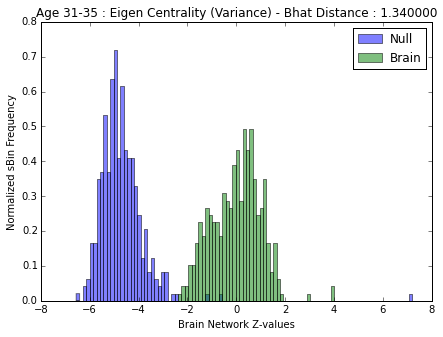

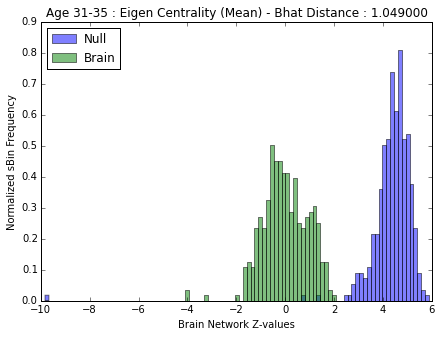

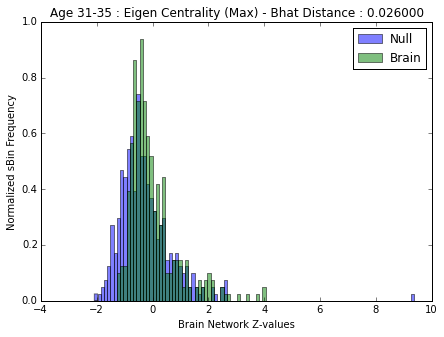

Mplex :  8
0/288 
250/288 


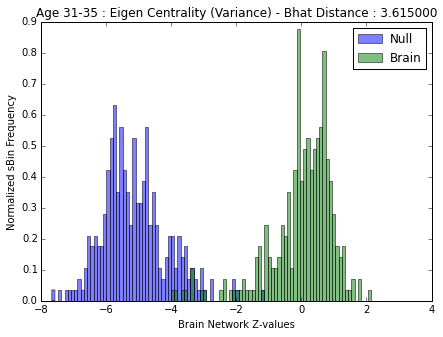

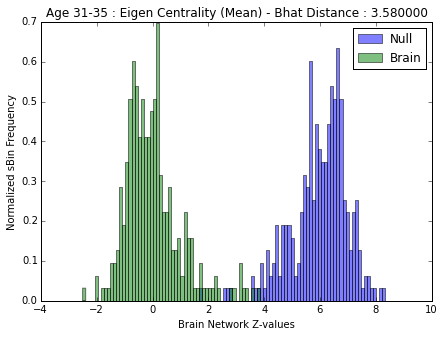

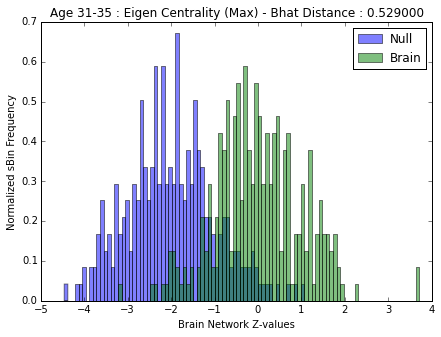

Mplex :  9
0/288 
250/288 


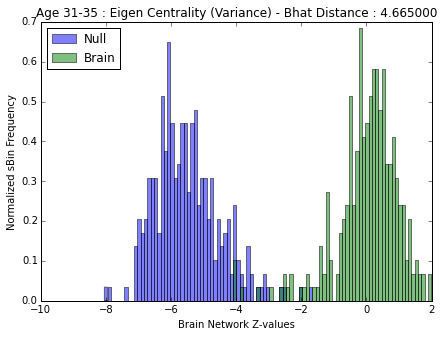

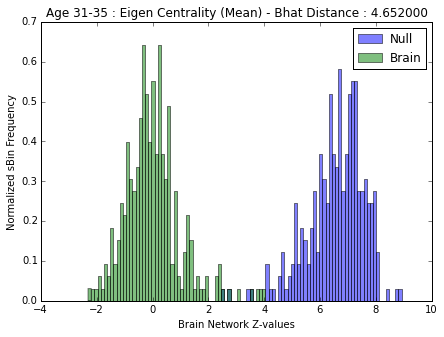

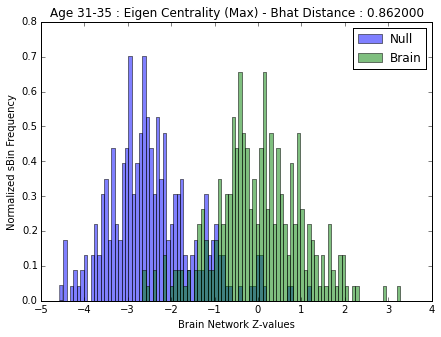

Mplex :  10
0/288 
250/288 


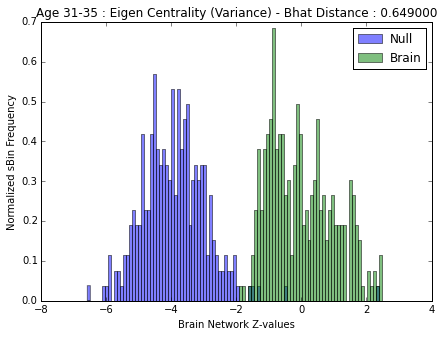

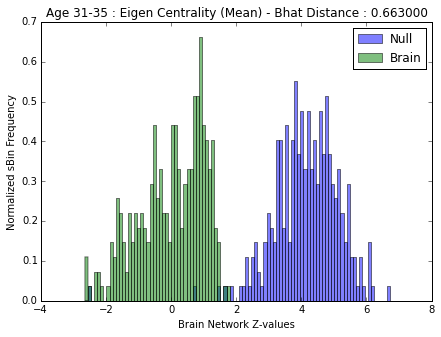

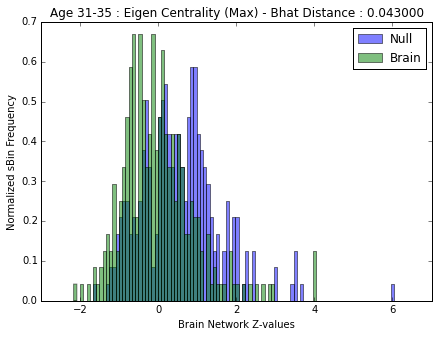

Mplex :  11
0/288 
250/288 


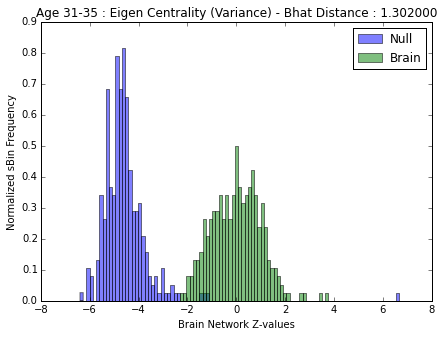

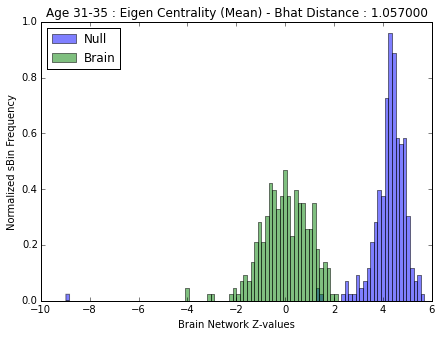

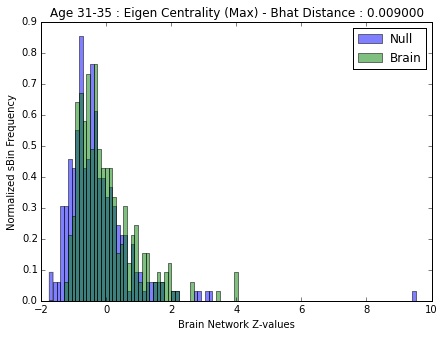

In [10]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.eigenvector_centrality_und(net)
        btwn_null = bct.eigenvector_centrality_und(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Eigen Centrality (Variance)','Eigen Centrality (Mean)', 'Eigen Centrality (Max)'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Eigen Centrality (Variance)','Eigen Centrality (Mean)', 'Eigen Centrality (Max)'], 'Age 26-30')
    else:
        plot_hist(nb,['Eigen Centrality (Variance)','Eigen Centrality (Mean)', 'Eigen Centrality (Max)'], 'Age 31-35')

## 2. Clustering

### 2A. Clustering Coefficienct

In [34]:
%matplotlib inline
def plot_together(allvals,mlabels,glabels=['22-25','26-30','31-35']):
    """allvals.shape = (num_mplex, num_subjects, num_metrics)"""
    for midx in range(allvals.shape[2]):
        for i in range(4):
            net1 = allvals[i,:,midx]
            net1 = net1[net1!=0]
            net2 = allvals[i+4,:,midx]
            net2 = net2[net2!=0]
            net3 = allvals[i+8,:,midx]
            net3 = net3[net3!=0]
            norm_mean = np.mean(net2)
            net1 = (net1 - norm_mean) / np.std(net1)
            net2 = (net2 - norm_mean) / np.std(net2)
            net3 = (net3 - norm_mean) / np.std(net3)
            _min = min(np.min(net1),np.min(net2),np.min(net3))
            _max = max(np.max(net1),np.max(net2),np.max(net3))
            plt.figure(figsize=(7,5))
            bins= np.linspace(_min,_max,100)
            plt.hist(net1,label=glabels[0],bins=bins,normed=True,alpha=0.5)
            plt.hist(net2,label=glabels[1],bins=bins,normed=True,alpha=0.5)
            plt.hist(net3,label=glabels[2],bins=bins,normed=True,alpha=0.5)
            plt.xlabel('Brain Network Z-values')
            plt.ylabel('Normalized Bin Frequency')
            plt.legend(loc='best')
            plt.title('Age-Grouped : %s' % mlabels[midx])
            plt.show()
        
  

Mplex :  0
0/176 
Mplex :  1
0/176 
Mplex :  2
0/176 
Mplex :  3
0/176 
Mplex :  4
0/350 
250/350 
Mplex :  5
0/350 
250/350 
Mplex :  6
0/350 
250/350 
Mplex :  7
0/350 
250/350 
Mplex :  8
0/288 
250/288 
Mplex :  9
0/288 
250/288 
Mplex :  10
0/288 
250/288 
Mplex :  11
0/288 
250/288 


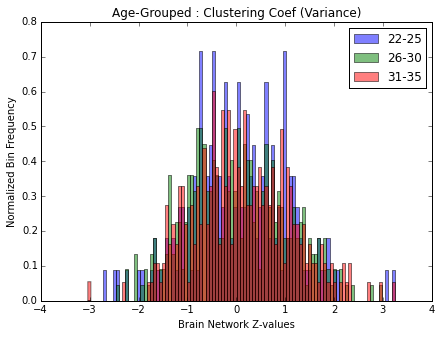

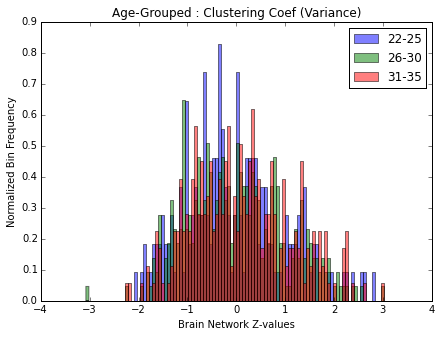

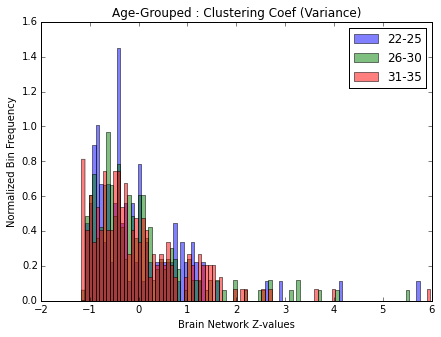

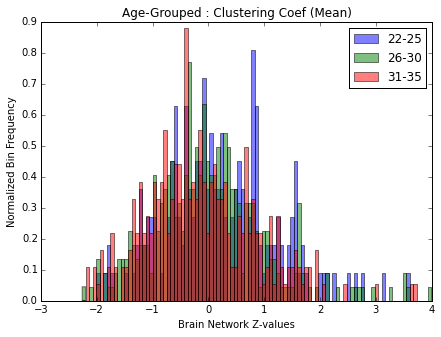

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


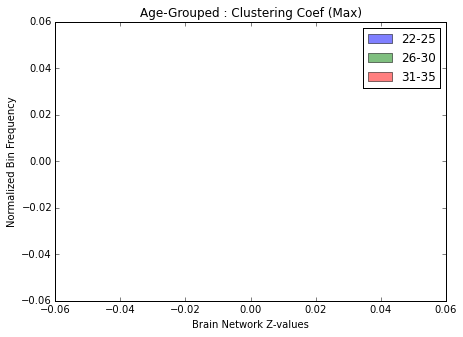

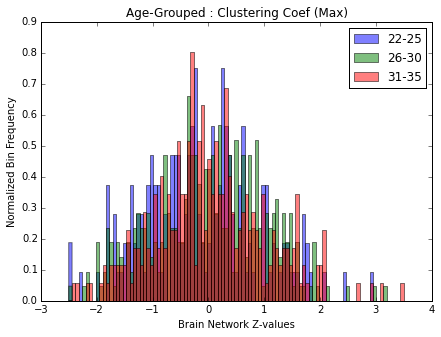

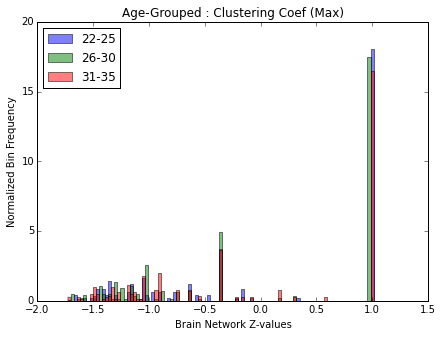

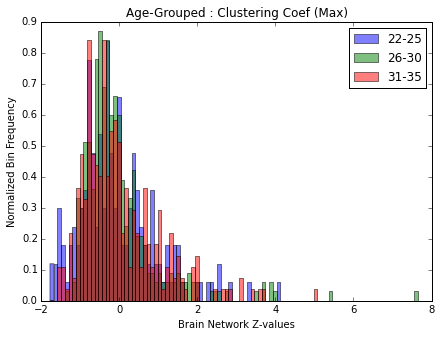

In [35]:
allvals = np.zeros((len(mp_list),820,3))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]   
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.clustering_coef_bu(net)
        btwn_null = bct.clustering_coef_bu(null)
        nb[0,net_idx,0] = np.var(btwn)
        allvals[mp_idx,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        allvals[mp_idx,net_idx,1] = np.mean(btwn)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
        allvals[mp_idx,net_idx,2] = np.max(btwn)
    #if np.ceil(mp_idx / 4) == 0:
     #   plot_hist(nb,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'], 'Age 22-25')
    #elif np.ceil(mp_idx / 4) == 1:
    #    plot_hist(nb,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'], 'Age 26-30')
    #else:
    #    plot_hist(nb,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'], 'Age 31-35')
plot_together(allvals,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'])

### 2B. Transitivity

Mplex :  0
0/176 


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


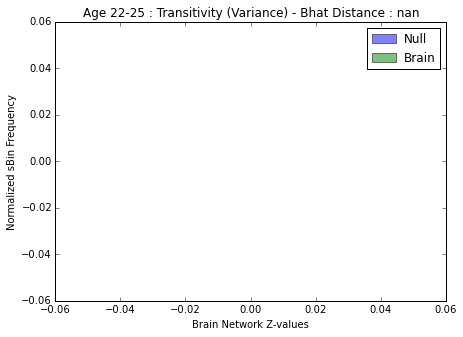

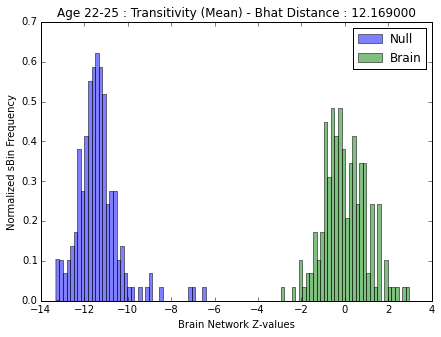

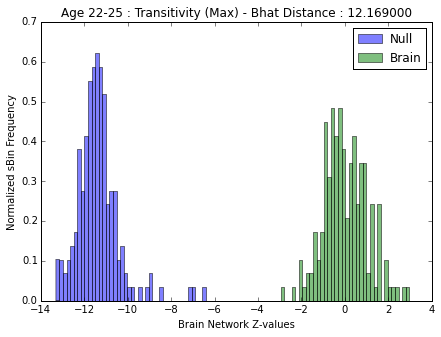

Mplex :  1
0/176 


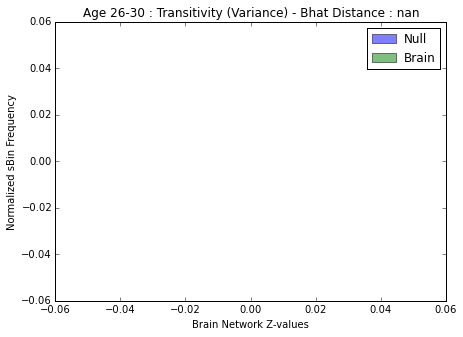

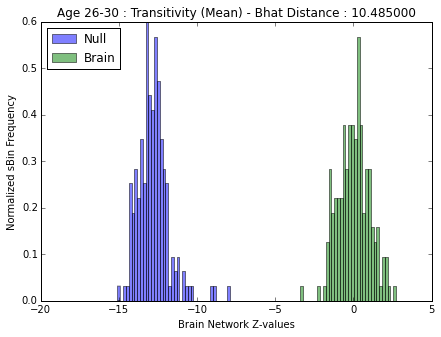

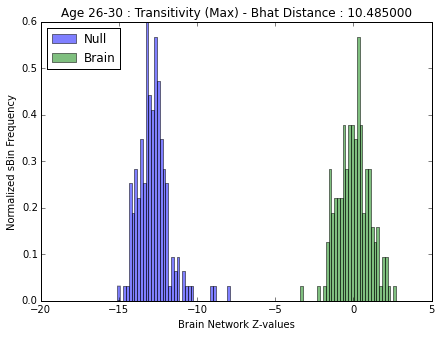

Mplex :  2
0/176 


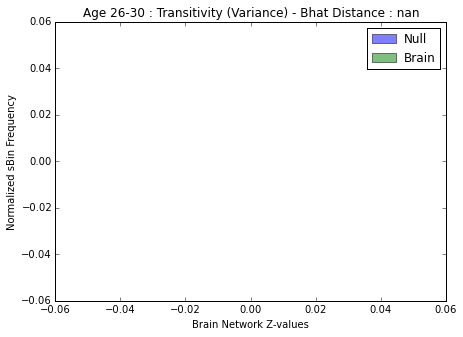

Mplex :  3
0/176 


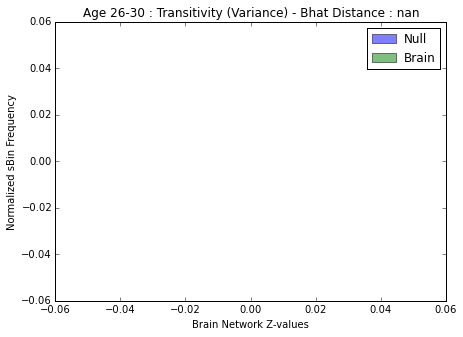

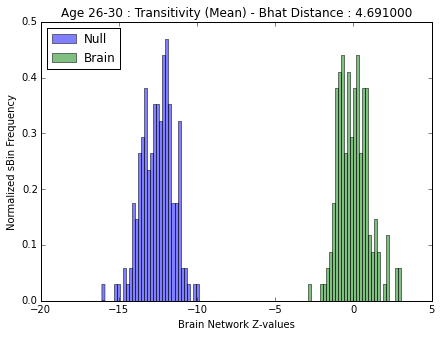

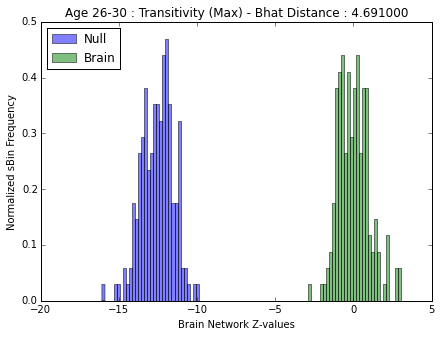

Mplex :  4
0/350 
250/350 


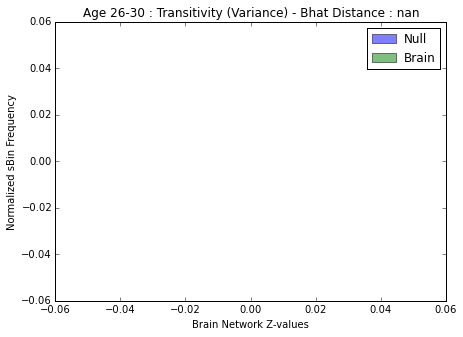

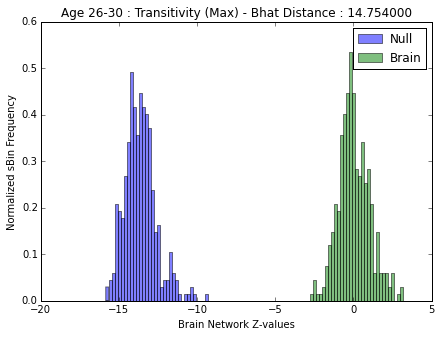

Mplex :  5
0/350 
250/350 


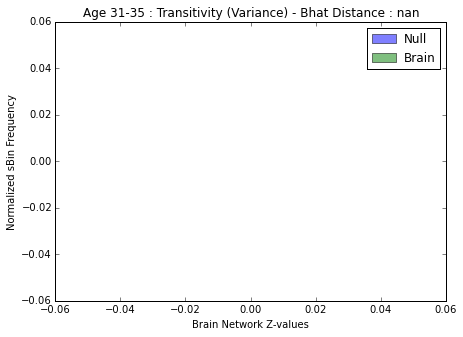

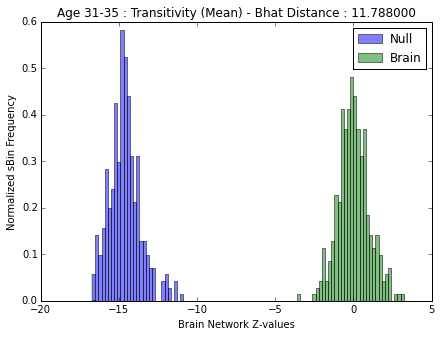

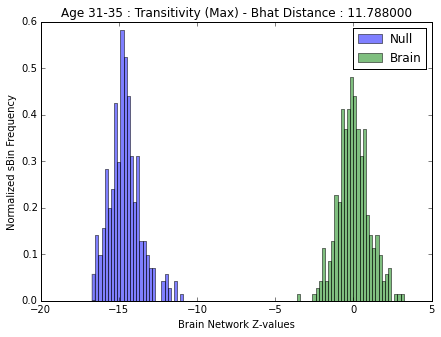

Mplex :  6
0/350 
250/350 


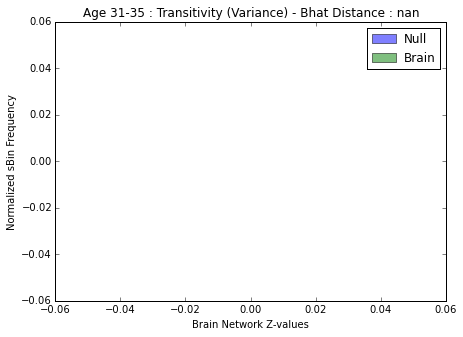

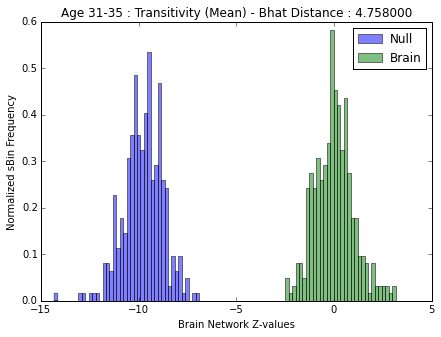

Mplex :  7
0/350 
250/350 


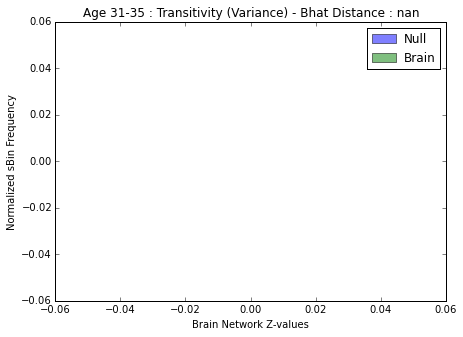

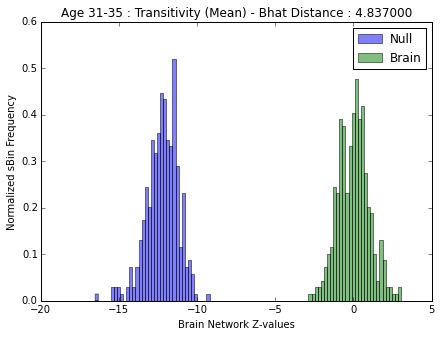

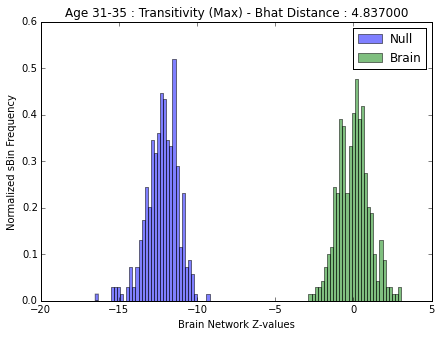

Mplex :  8
0/288 
250/288 


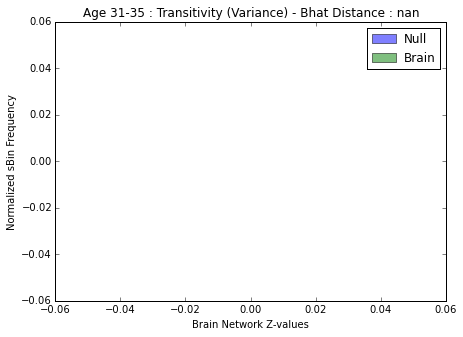

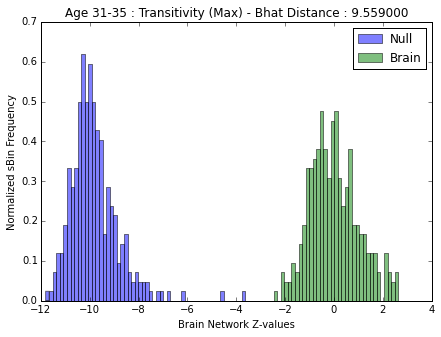

Mplex :  9
0/288 
250/288 


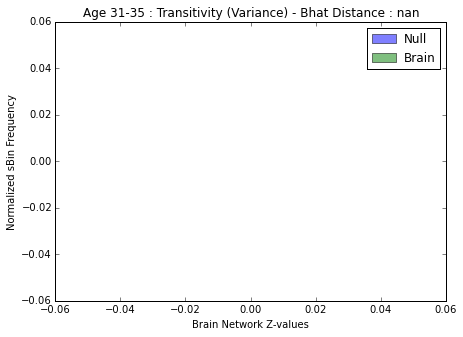

Mplex :  10
0/288 
250/288 


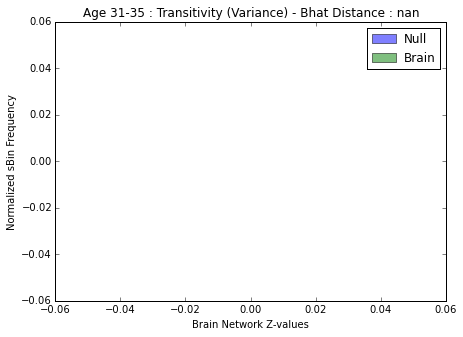

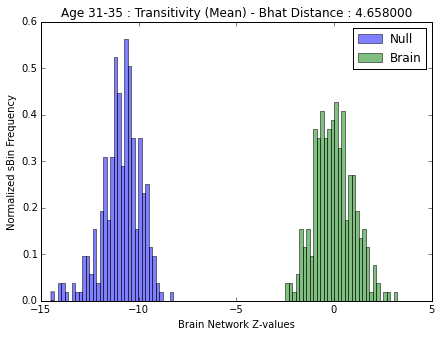

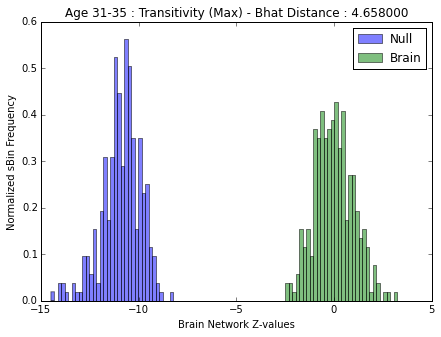

Mplex :  11
0/288 
250/288 


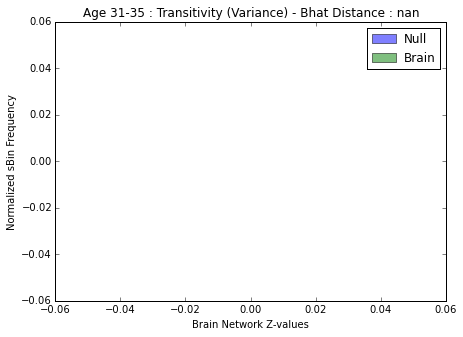

In [12]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.transitivity_bu(net)
            btwn_null = bct.transitivity_bu(null)
        else:
            btwn = bct.transitivity_wu(net)
            btwn_null = bct.transitivity_wu(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Transitivity (Variance)','Transitivity (Mean)', 'Transitivity (Max)'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Transitivity (Variance)','Transitivity (Mean)', 'Transitivity (Max)'], 'Age 26-30')
    else:
        plot_hist(nb,['Transitivity (Variance)','Transitivity (Mean)', 'Transitivity (Max)'], 'Age 31-35')

## 3. Core

### 3A. Assortativity

Mplex :  0
0/176 


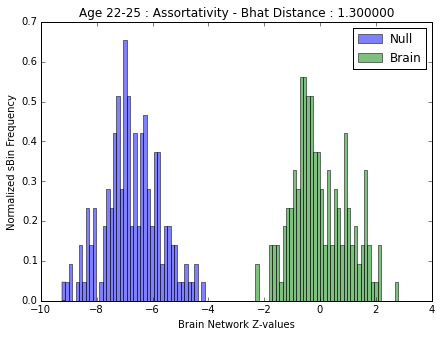

Mplex :  1
0/176 


Mplex :  2
0/176 


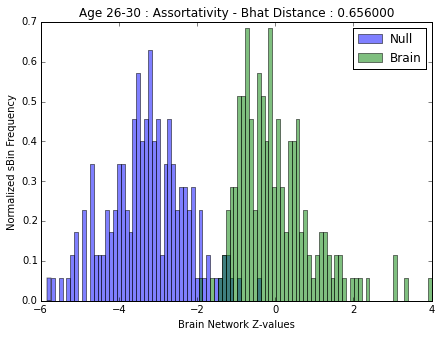

Mplex :  3
0/176 


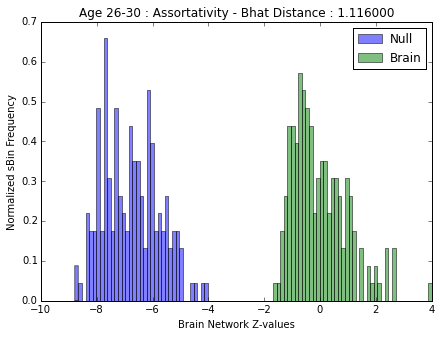

Mplex :  4
0/350 
250/350 


Mplex :  5
0/350 
250/350 


Mplex :  6
0/350 
250/350 


Mplex :  7
0/350 
250/350 


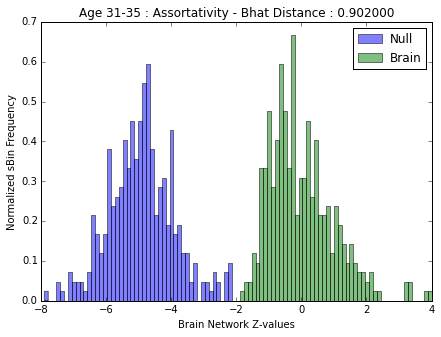

Mplex :  8
0/288 
250/288 


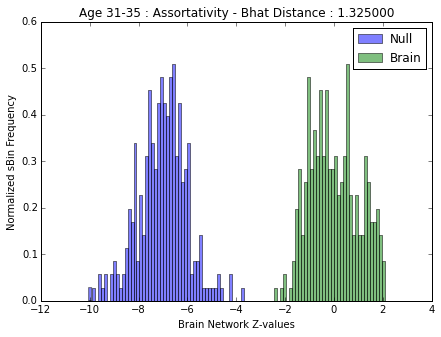

Mplex :  9
0/288 
250/288 


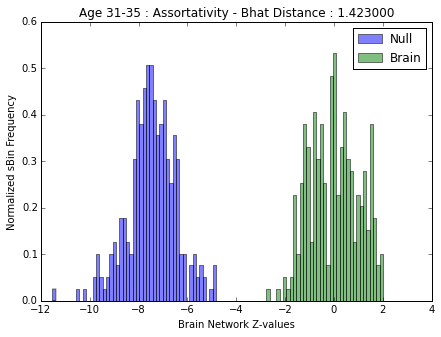

Mplex :  10
0/288 
250/288 


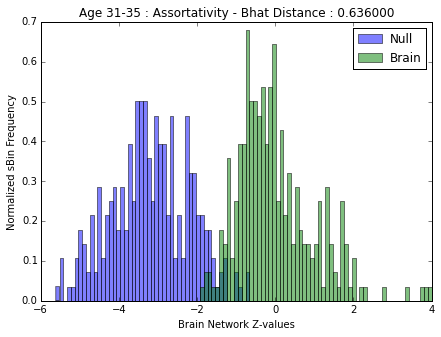

Mplex :  11
0/288 
250/288 


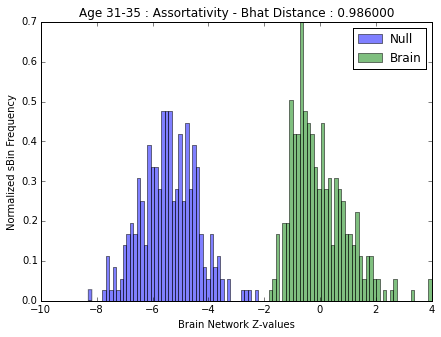

In [13]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.assortativity_bin(net,0)
            btwn_null = bct.assortativity_bin(null,0)
        else:
            btwn = bct.assortativity_wei(net,0)
            btwn_null = bct.assortativity_wei(null,0)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Assortativity'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Assortativity'], 'Age 26-30')
    else:
        plot_hist(nb,['Assortativity'], 'Age 31-35')

### 3B. Rich Club

Mplex :  0
0/176 


//anaconda/lib/python2.7/site-packages/bctpy-0.4.1-py2.7.egg/bct/algorithms/core.py:354: RuntimeWarning: invalid value encountered in double_scalars
  R[k] = Ek[k] / (Nk[k] * (Nk[k] - 1))


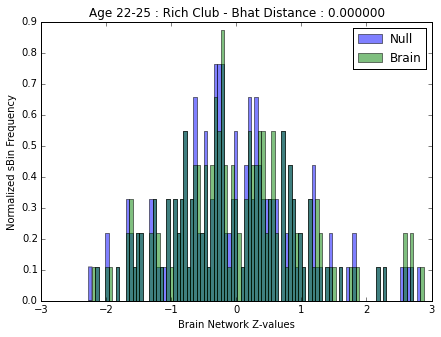

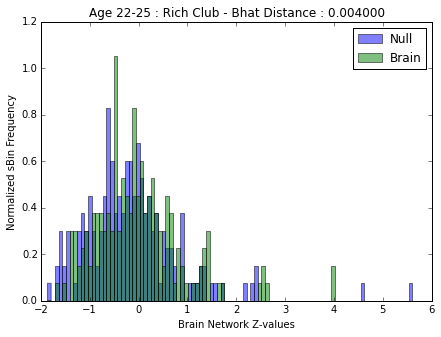

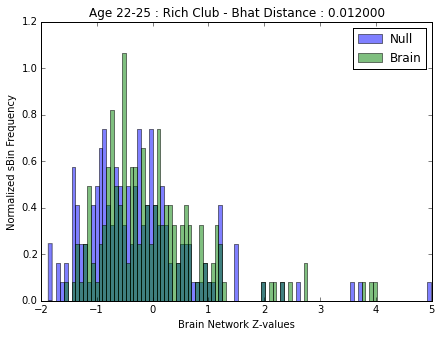

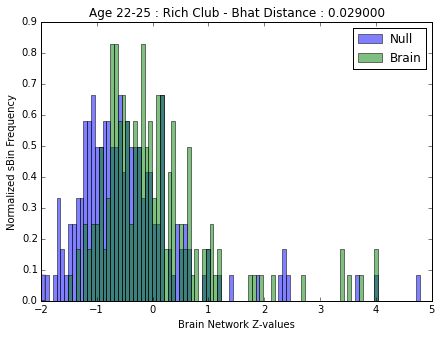

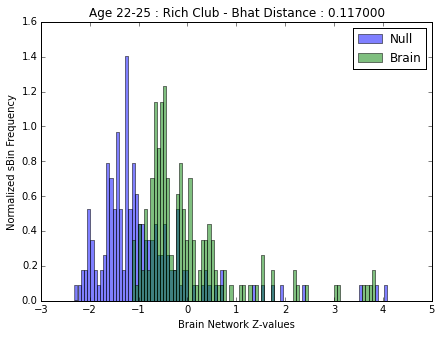

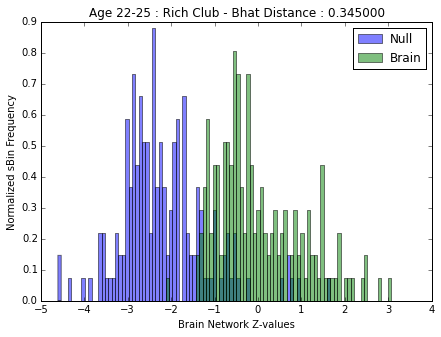

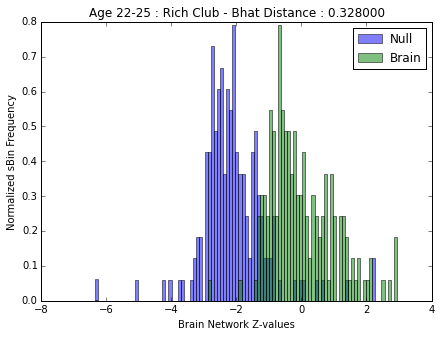

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater


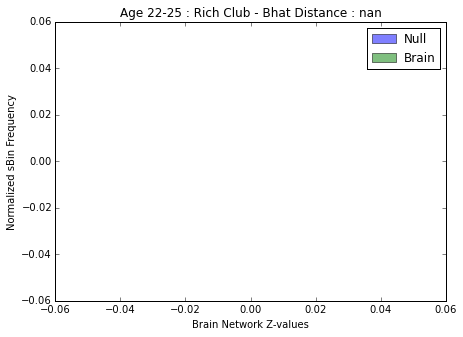

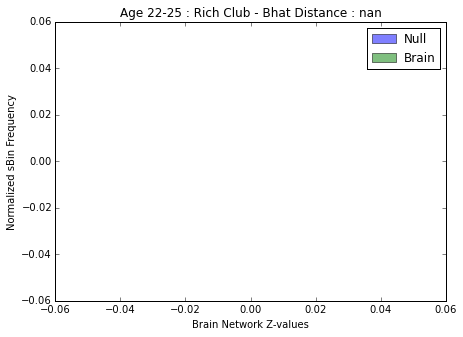

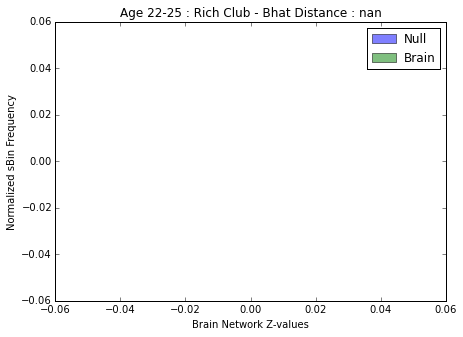

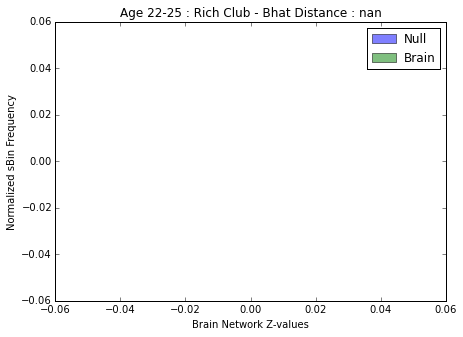

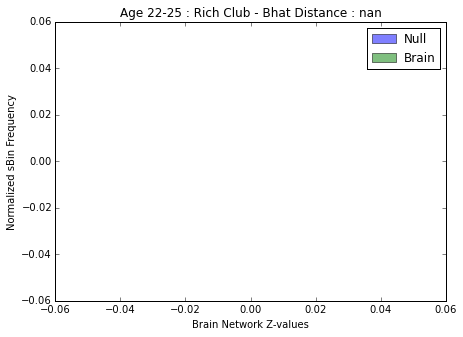

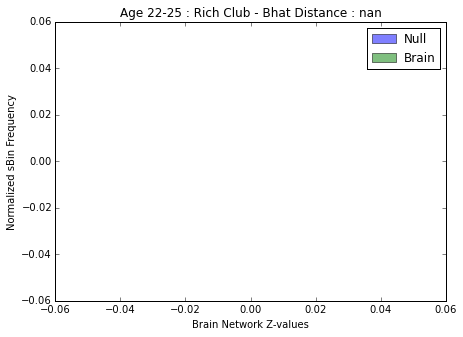

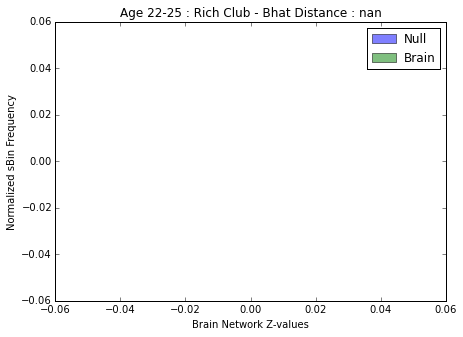

Mplex :  1
0/176 


//anaconda/lib/python2.7/site-packages/bctpy-0.4.1-py2.7.egg/bct/algorithms/core.py:448: RuntimeWarning: invalid value encountered in double_scalars
  Rw[k] = Wr / np.sum(wrank_r)


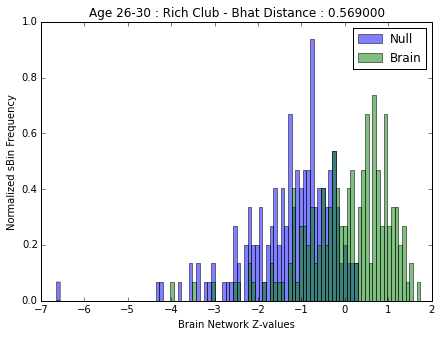

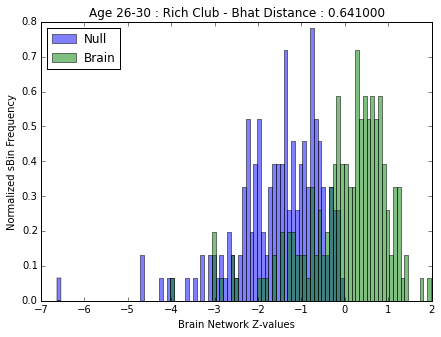

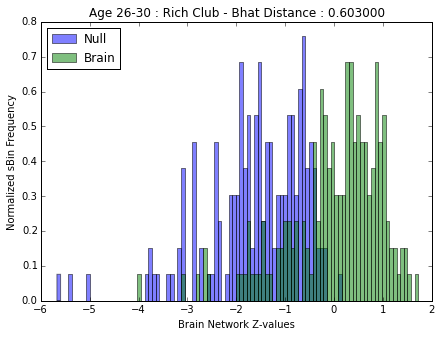

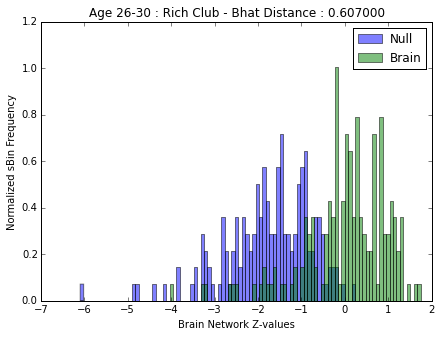

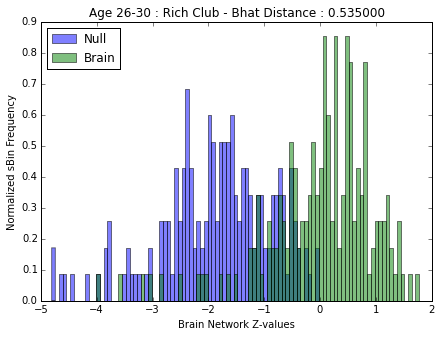

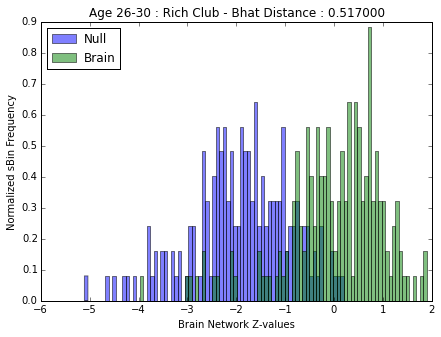

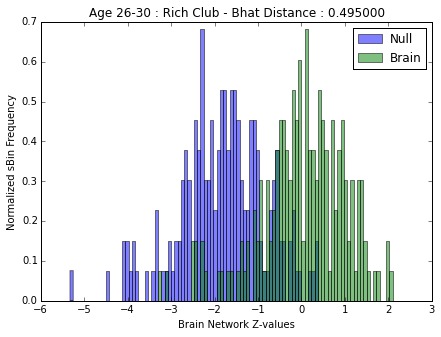

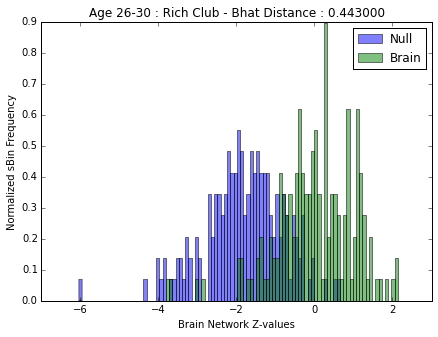

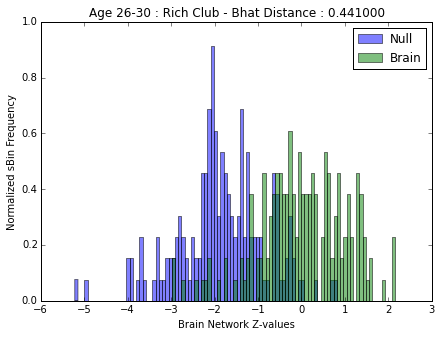

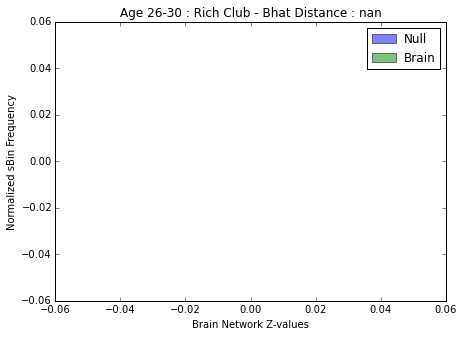

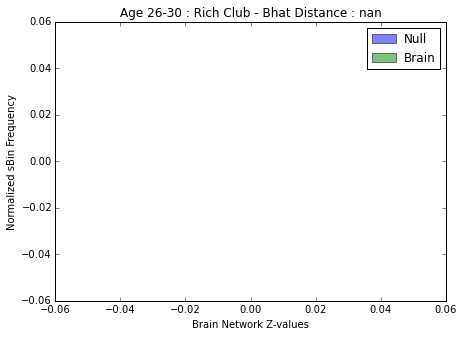

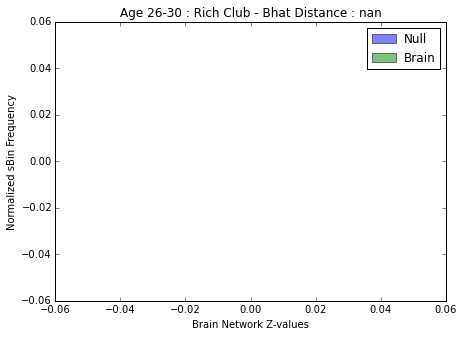

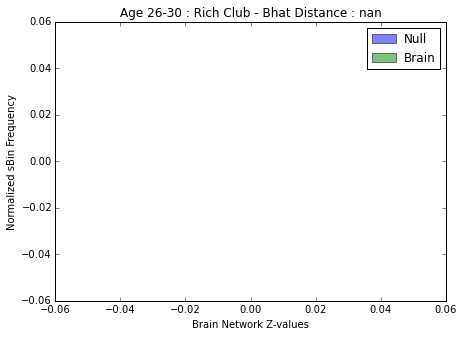

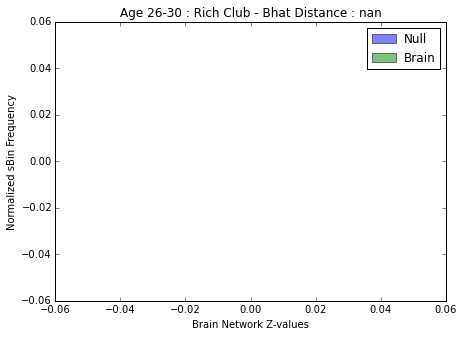

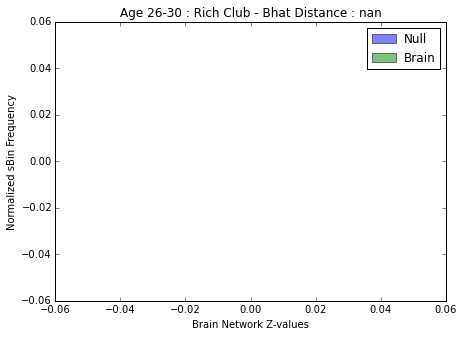

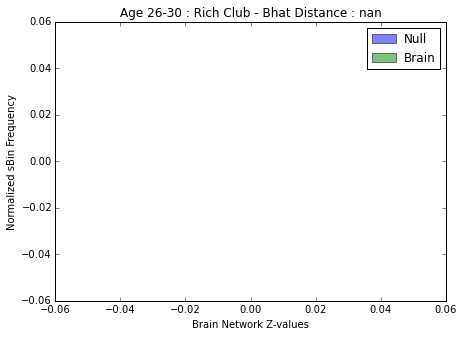

Mplex :  2
0/176 


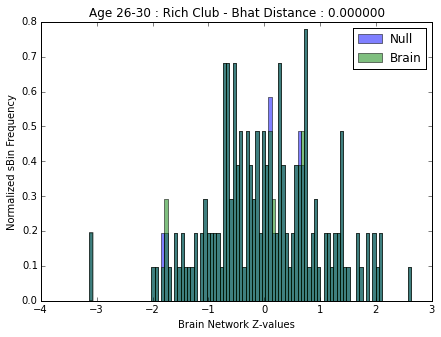

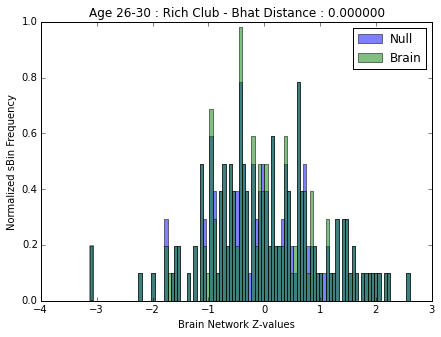

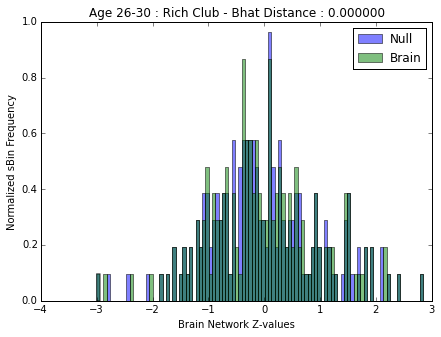

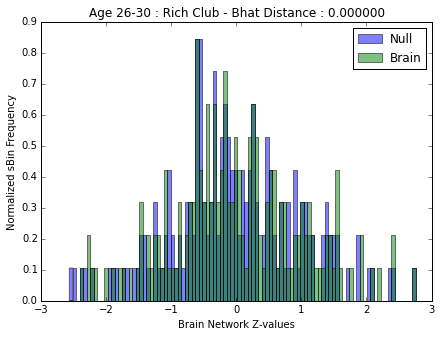

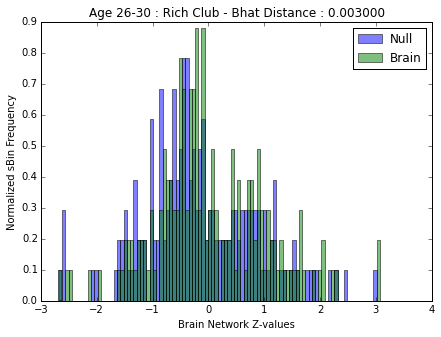

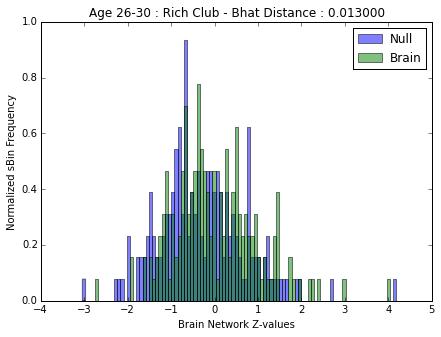

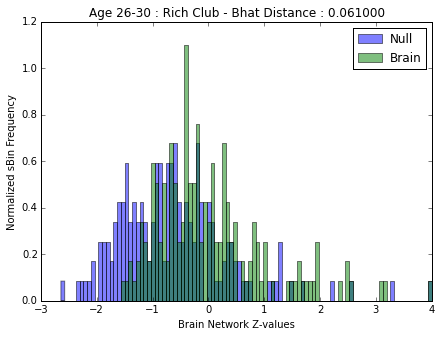

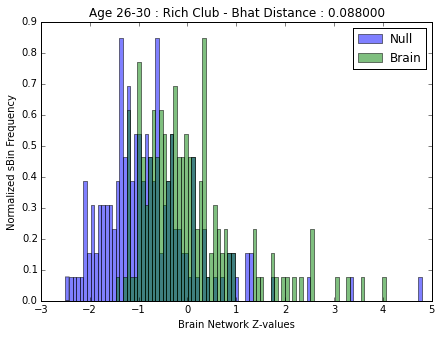

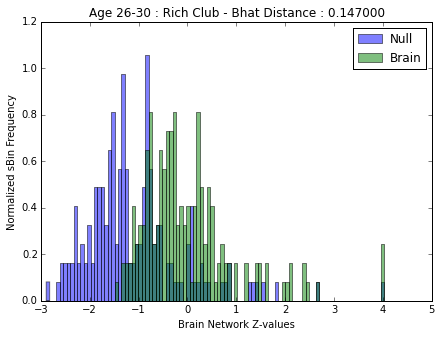

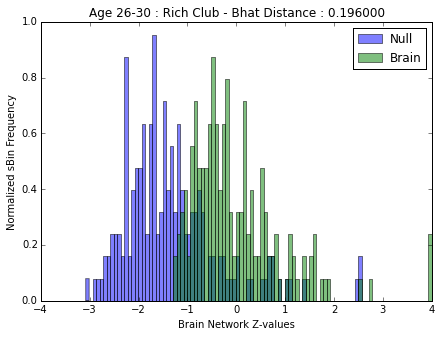

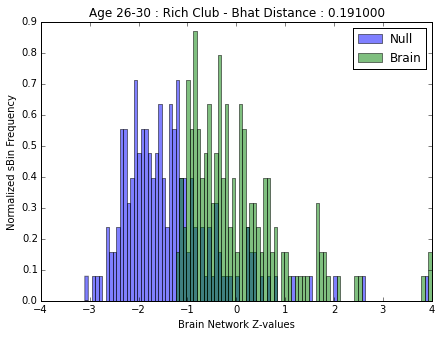

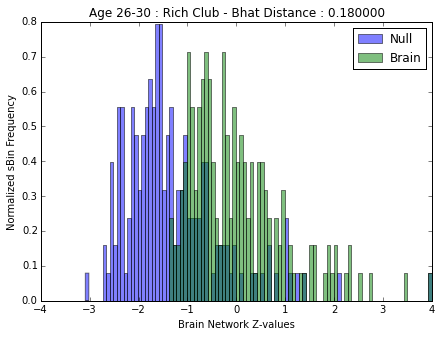

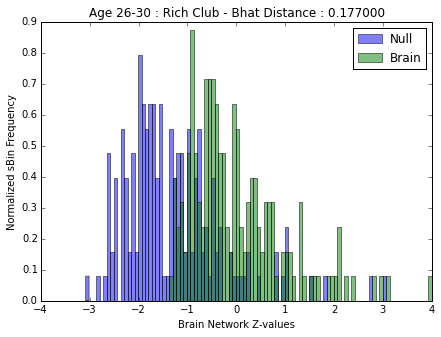

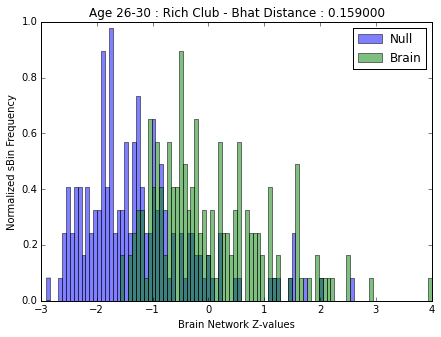

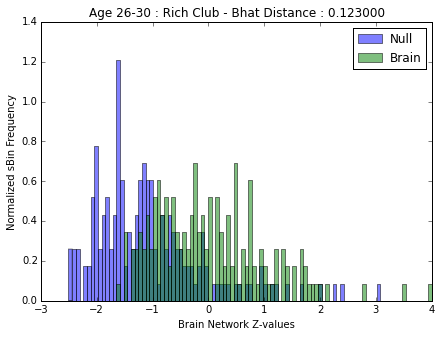

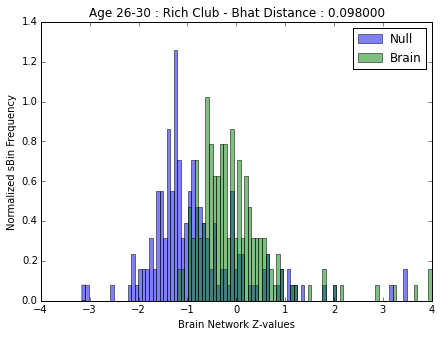

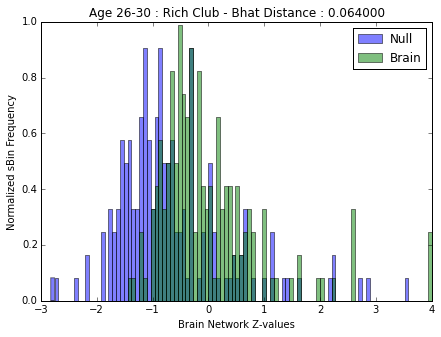

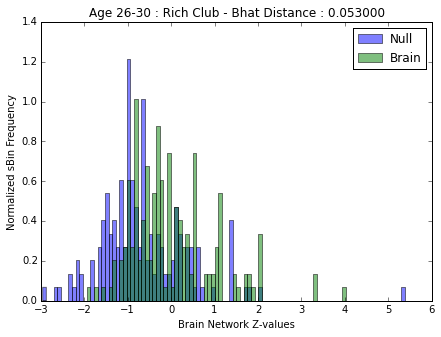

Mplex :  3
0/176 


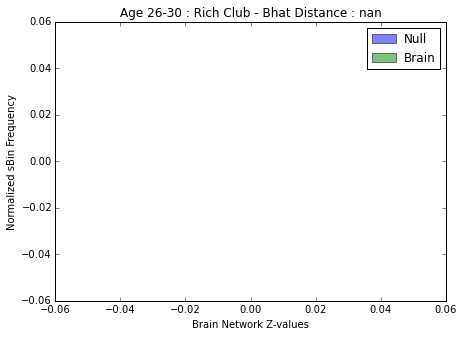

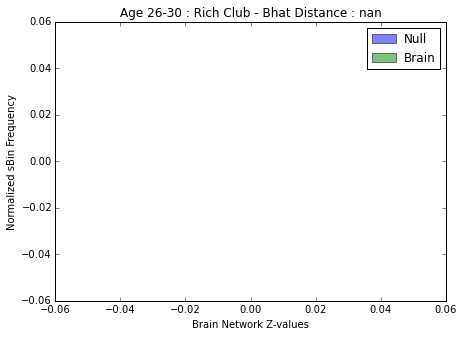

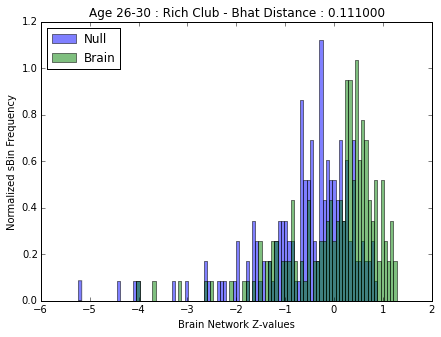

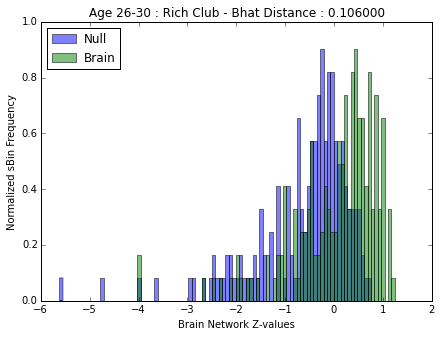

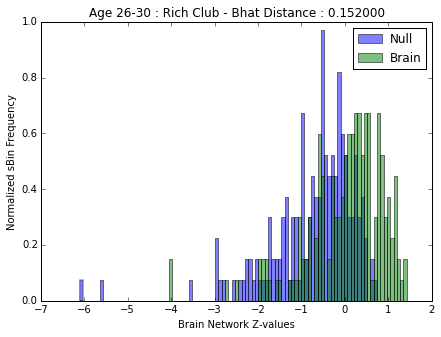

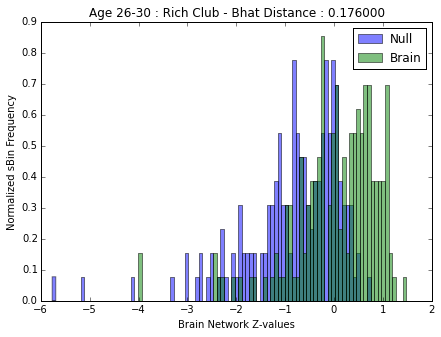

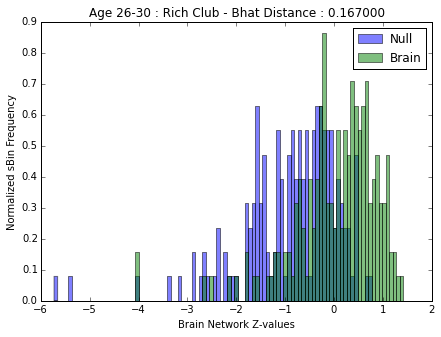

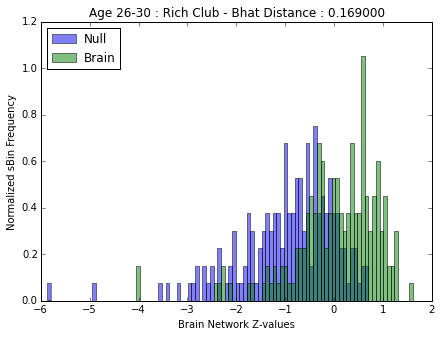

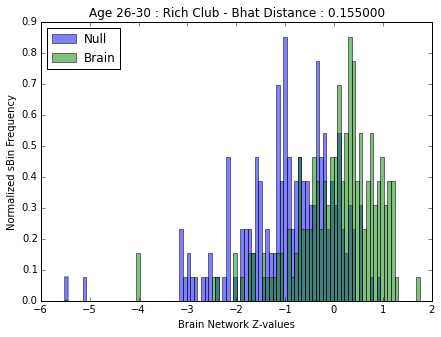

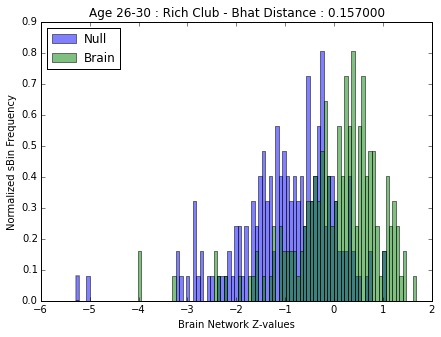

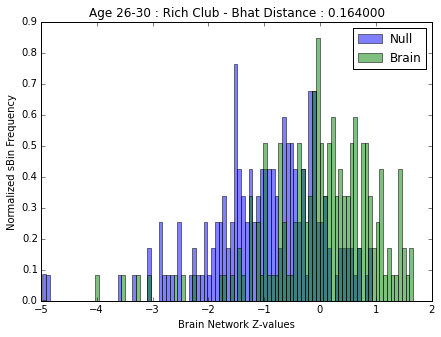

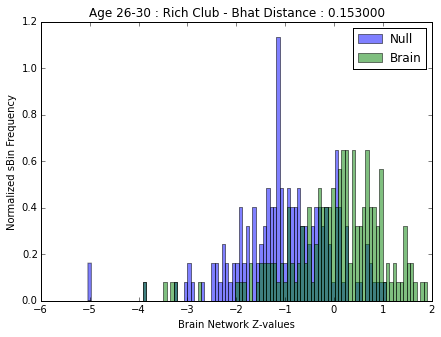

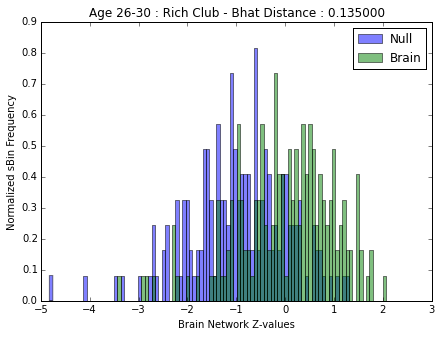

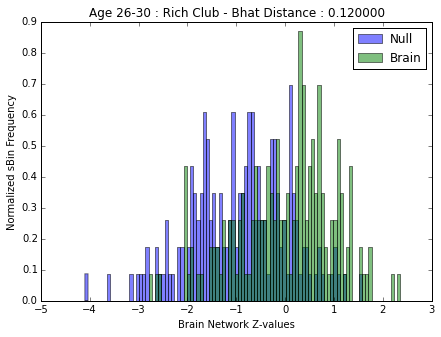

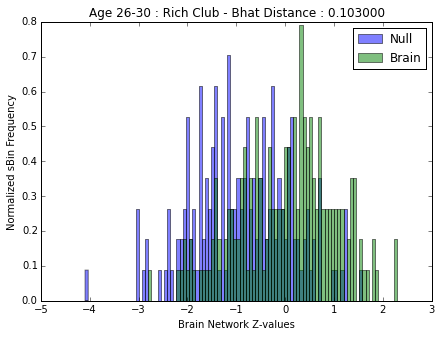

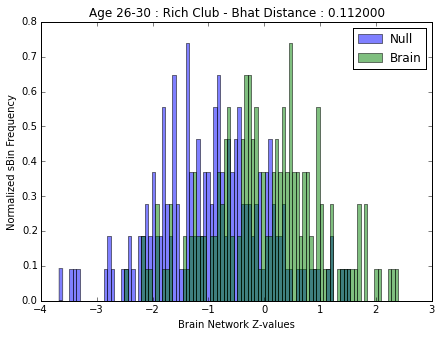

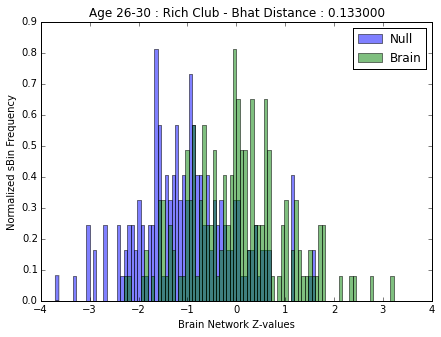

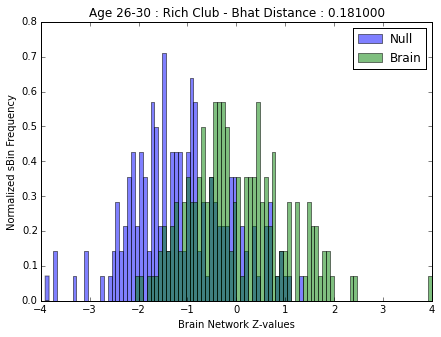

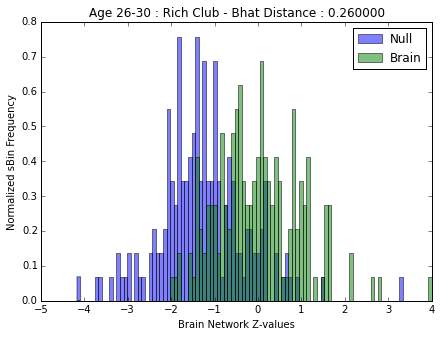

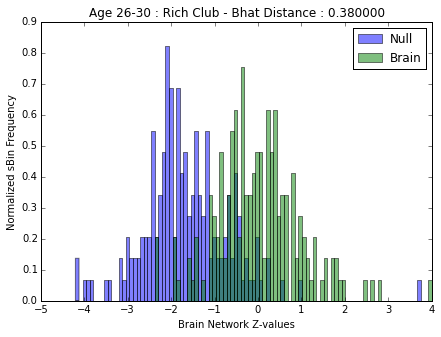

Mplex :  4
0/350 
250/350 


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


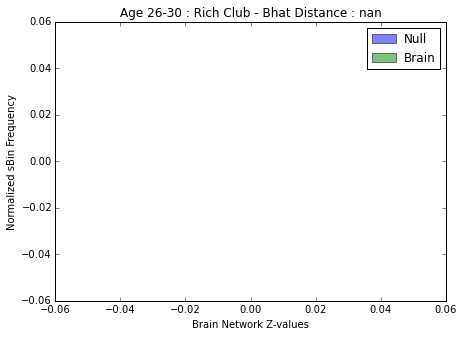

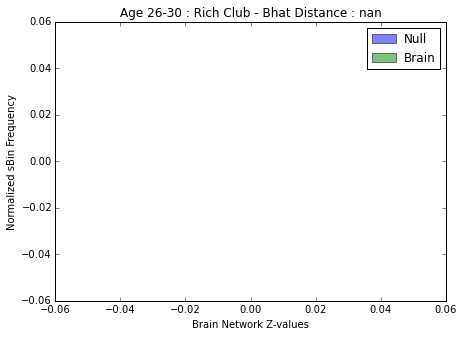

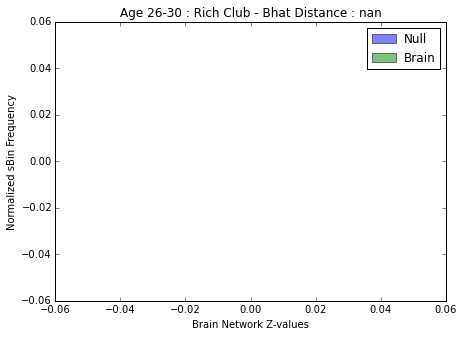

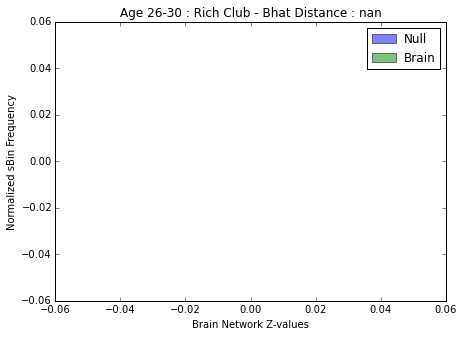

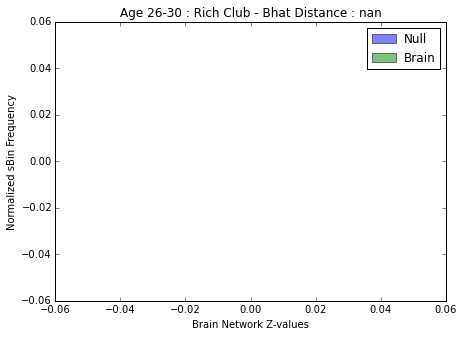

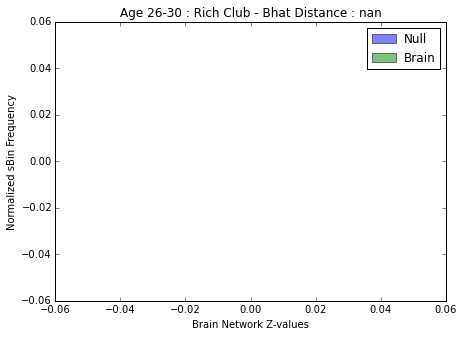

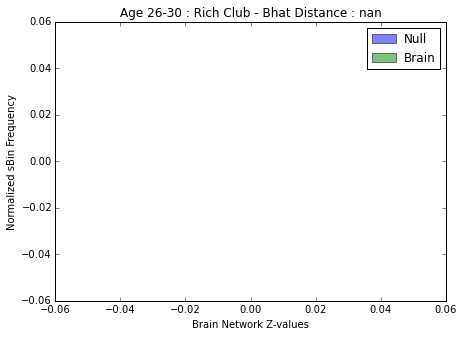

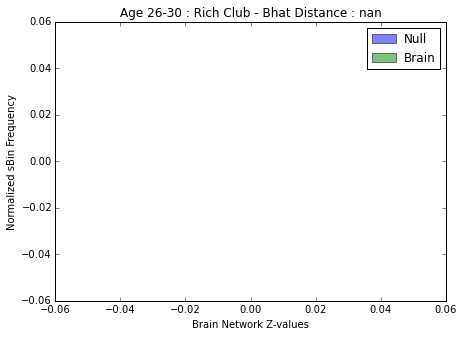

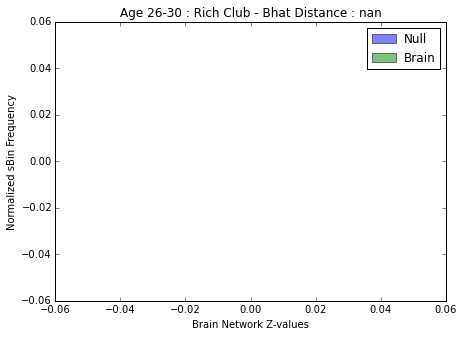

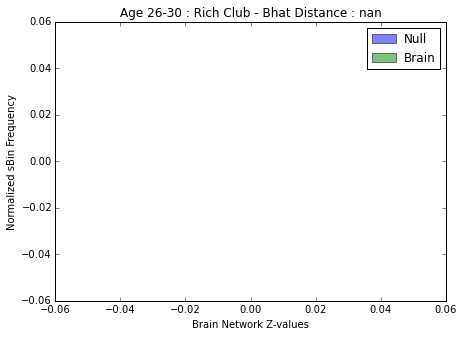

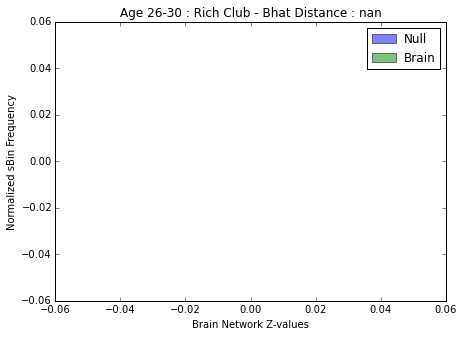

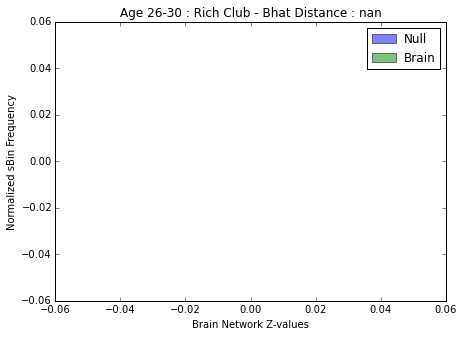

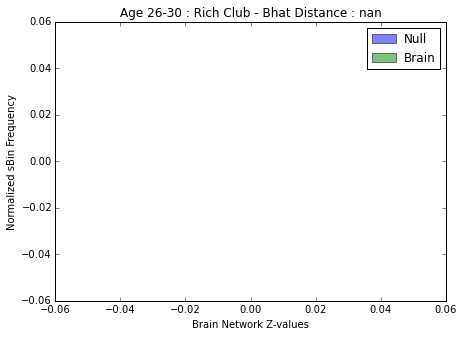

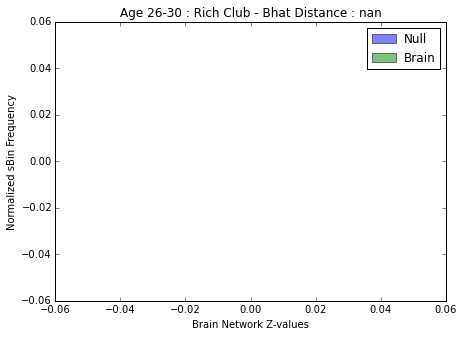

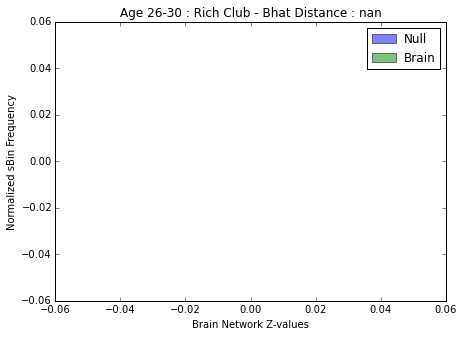

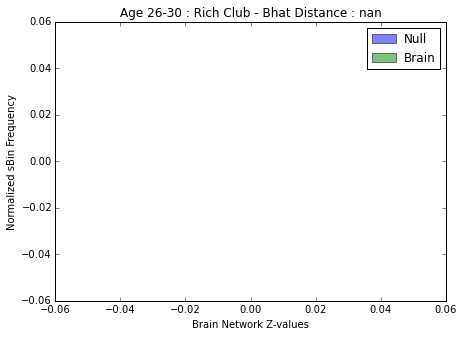

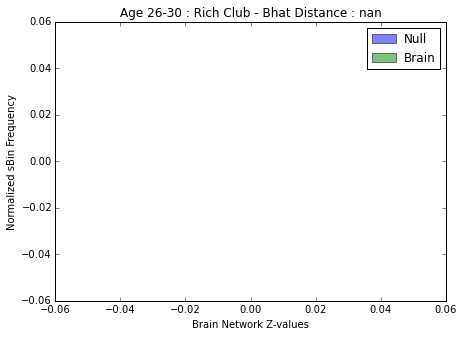

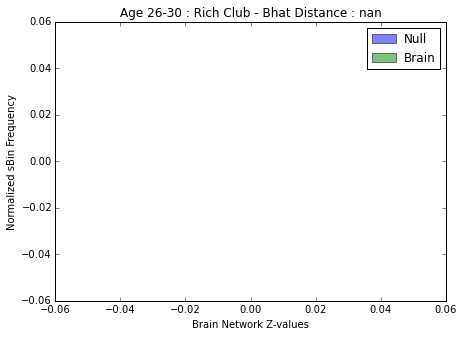

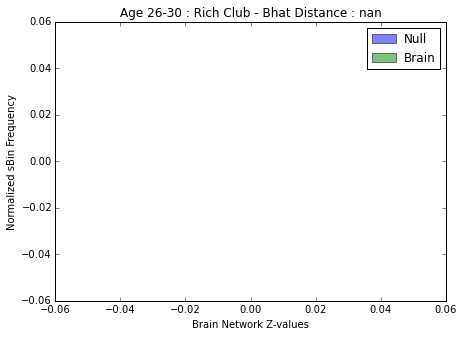

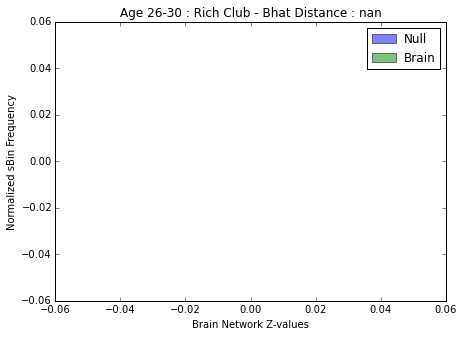

Mplex :  5
0/350 
250/350 


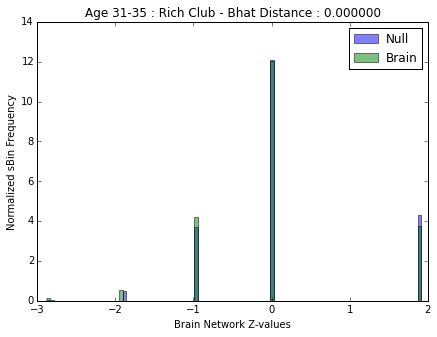

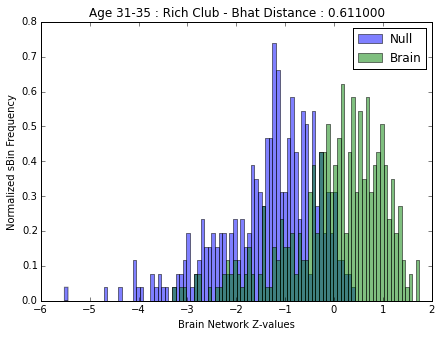

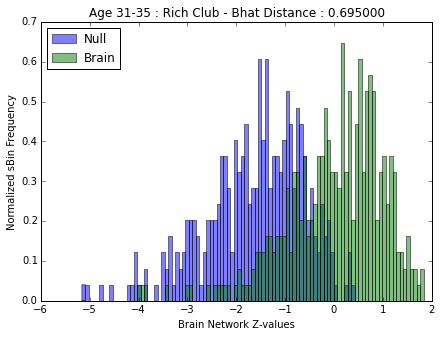

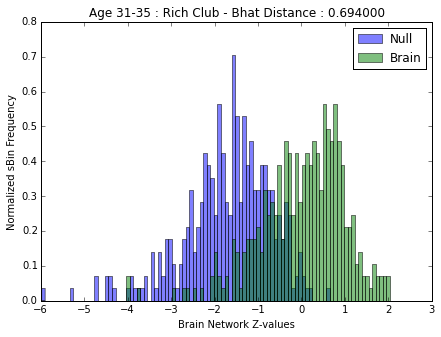

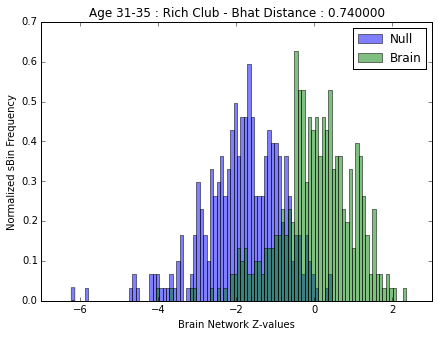

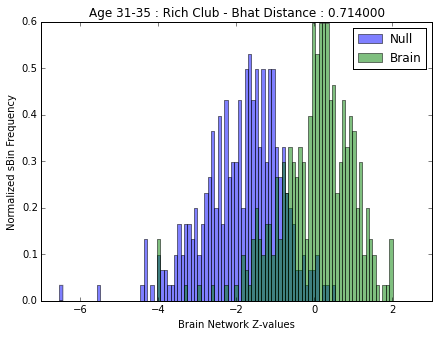

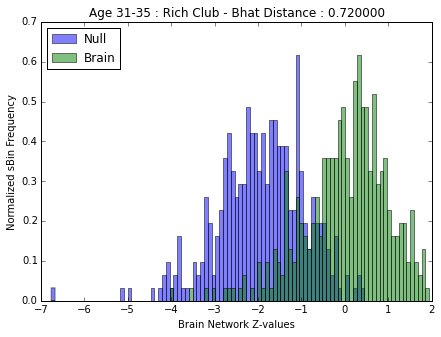

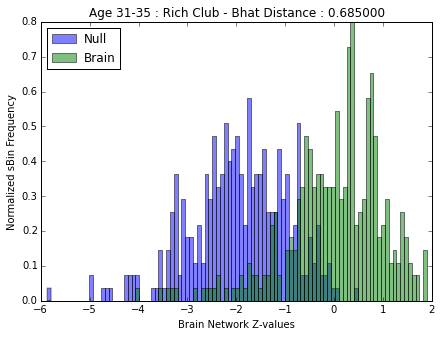

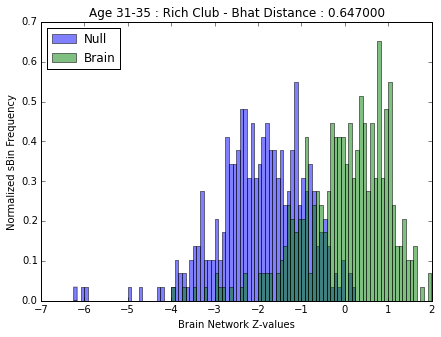

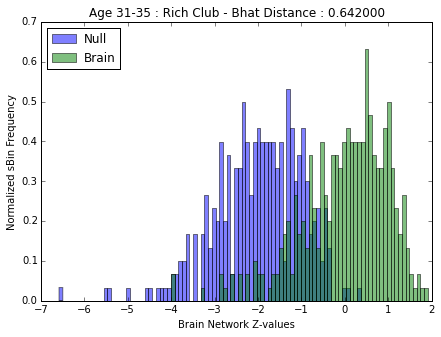

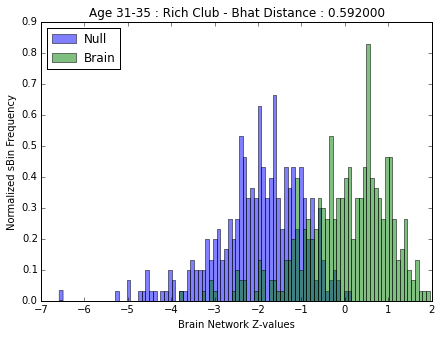

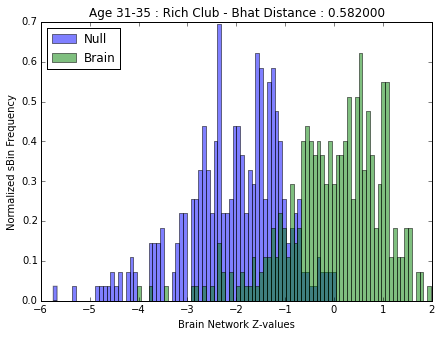

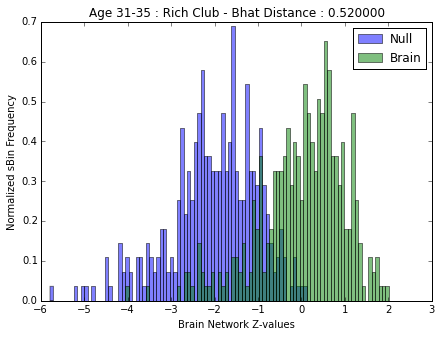

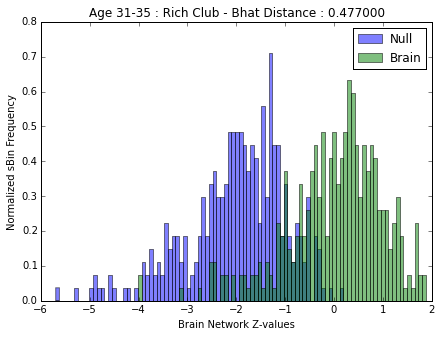

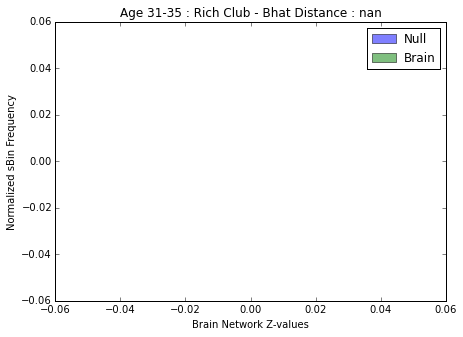

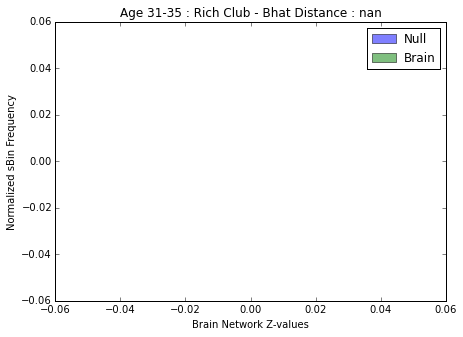

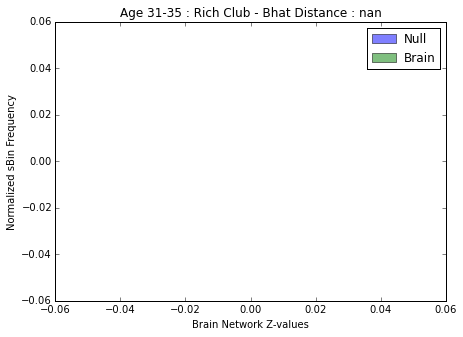

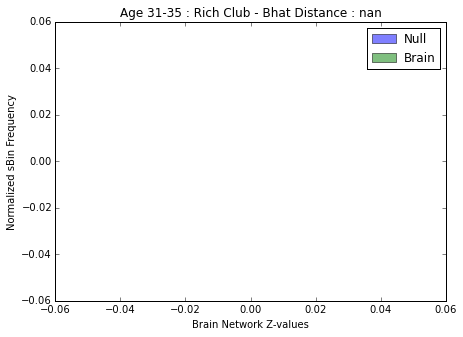

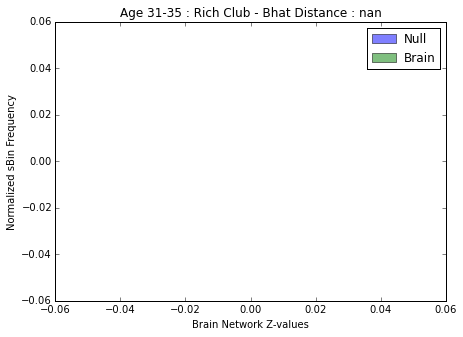

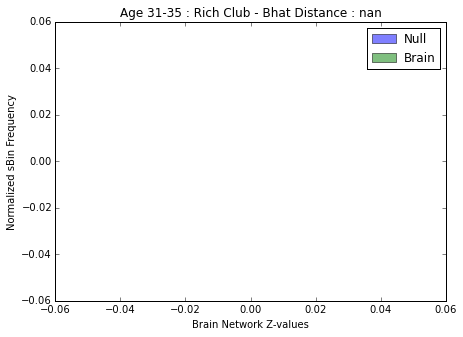

Mplex :  6
0/350 
250/350 


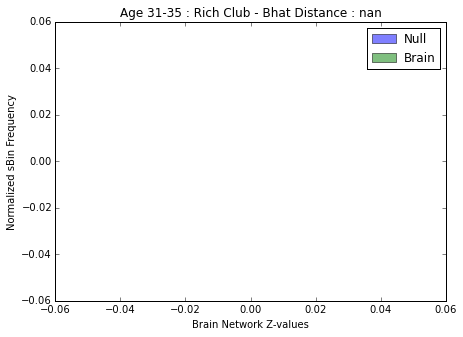

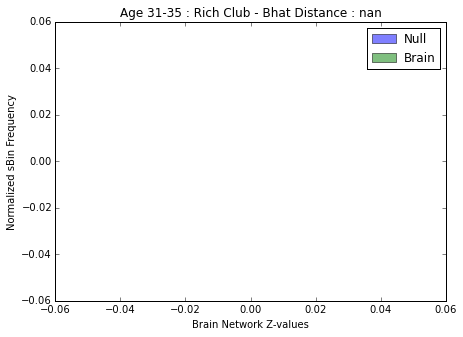

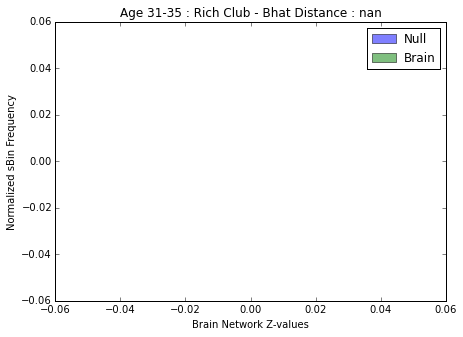

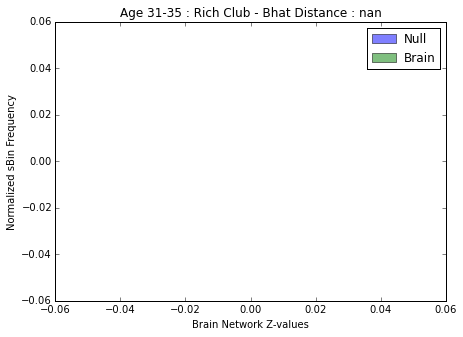

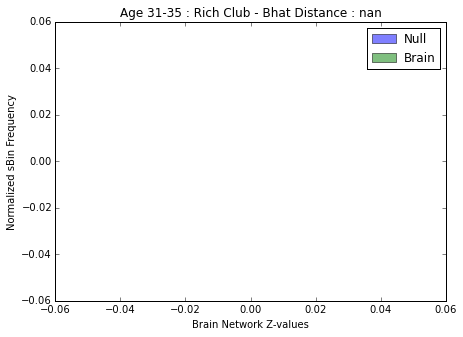

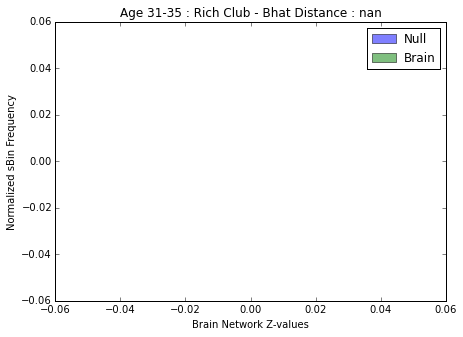

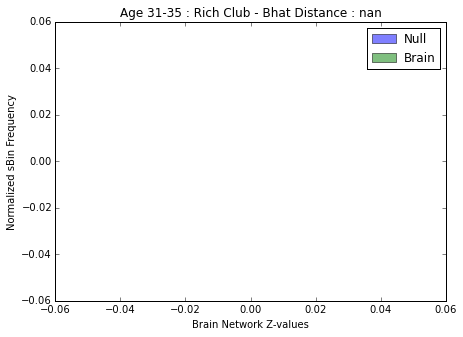

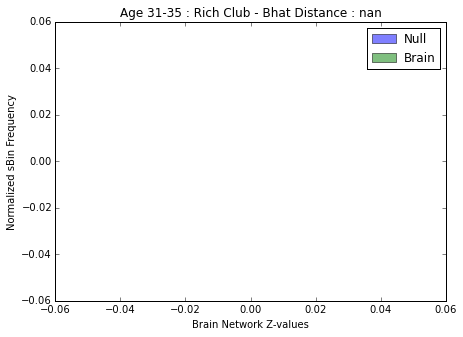

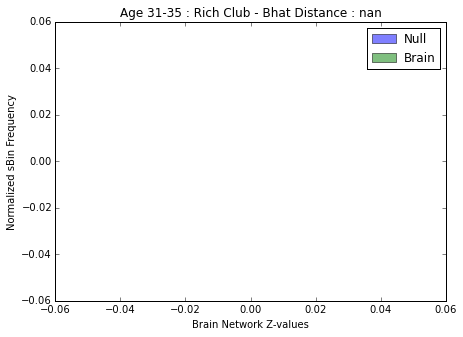

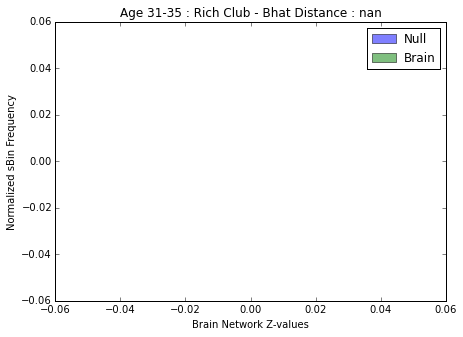

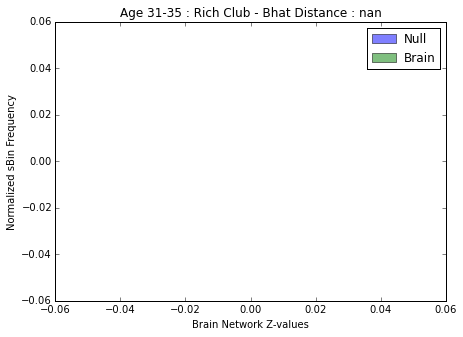

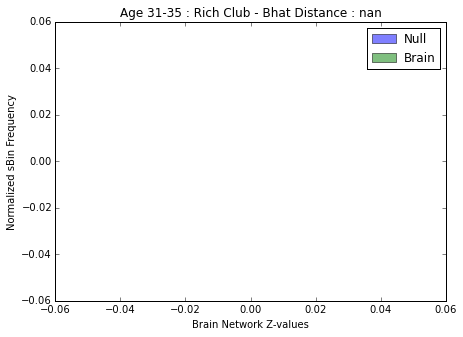

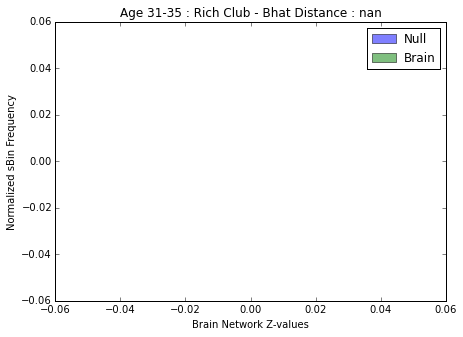

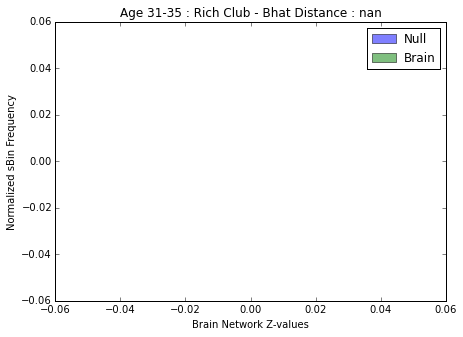

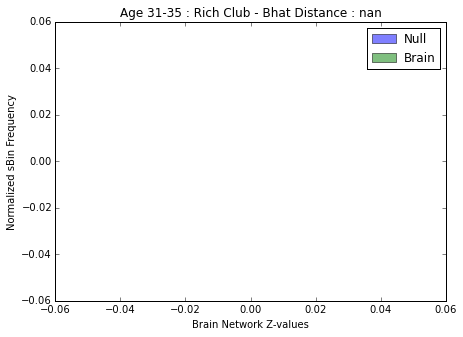

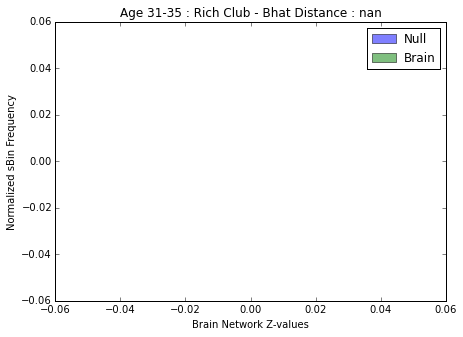

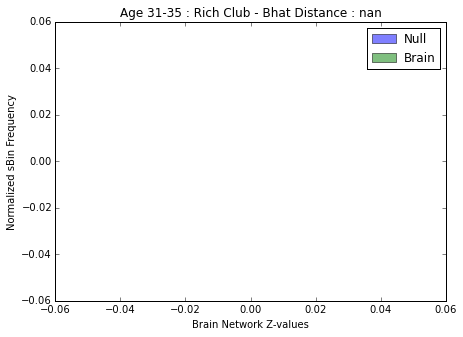

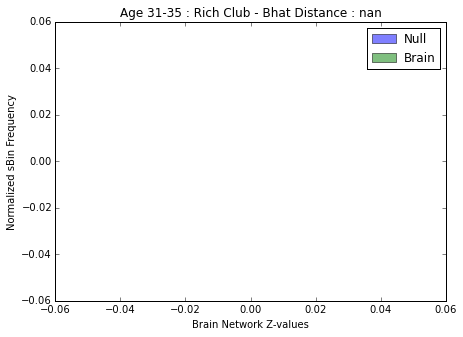

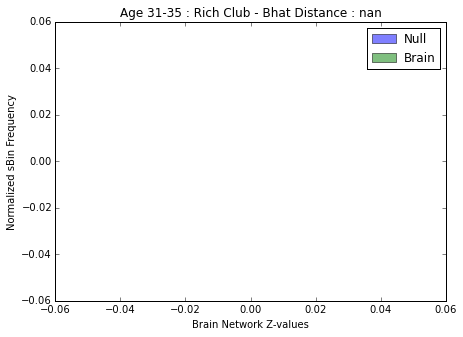

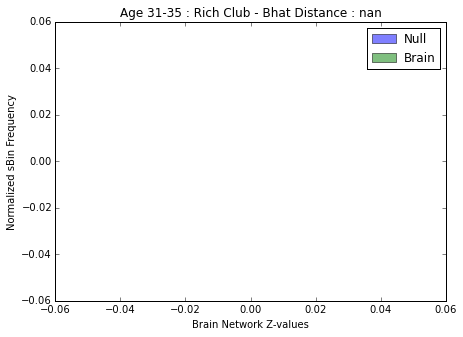

Mplex :  7
0/350 
250/350 


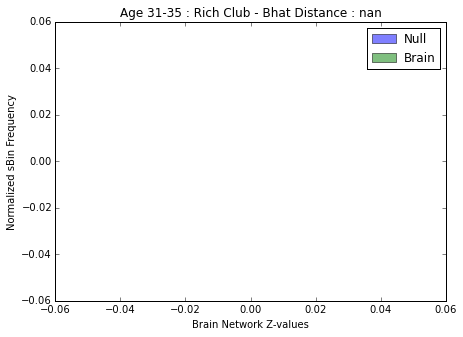

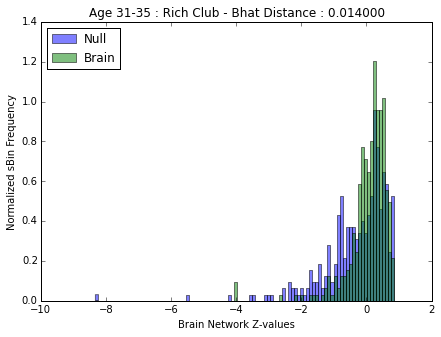

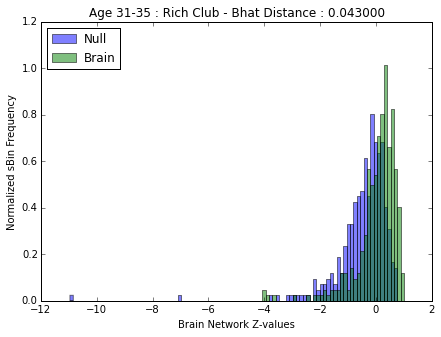

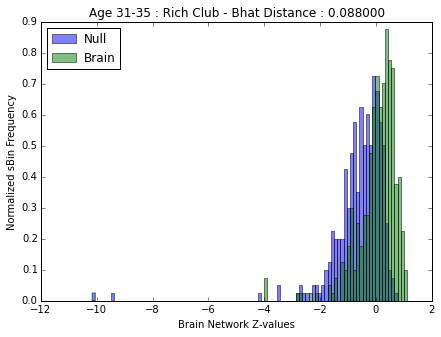

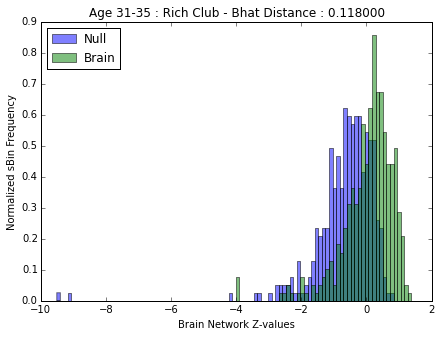

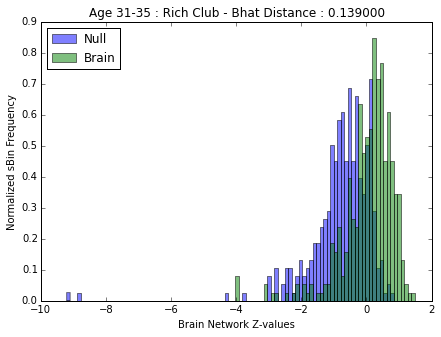

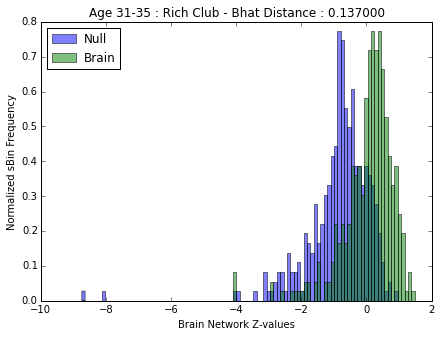

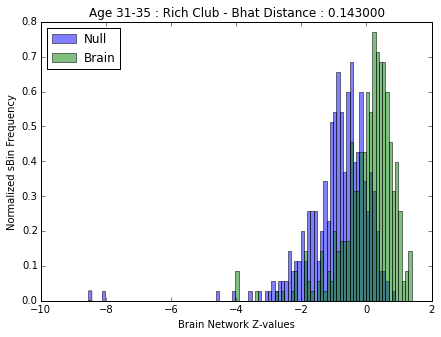

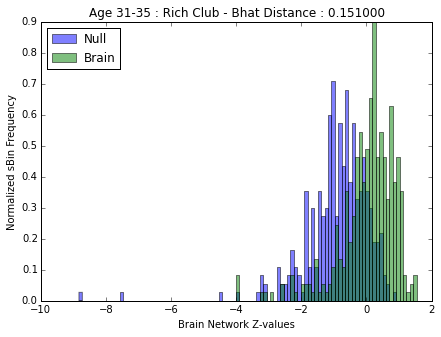

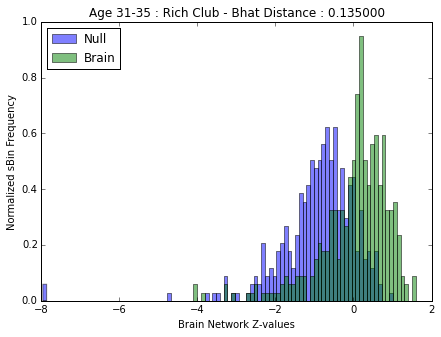

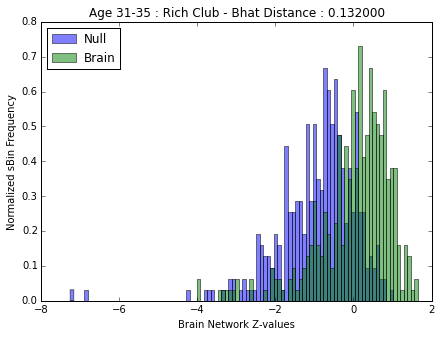

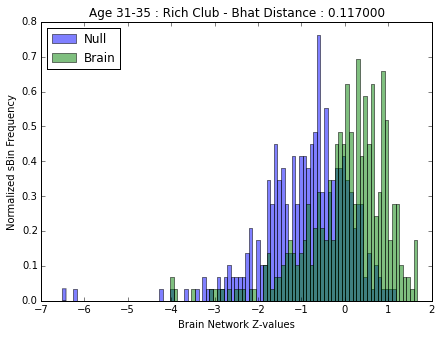

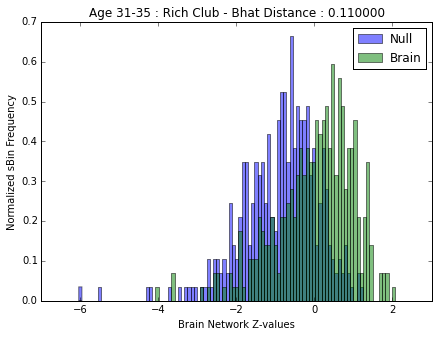

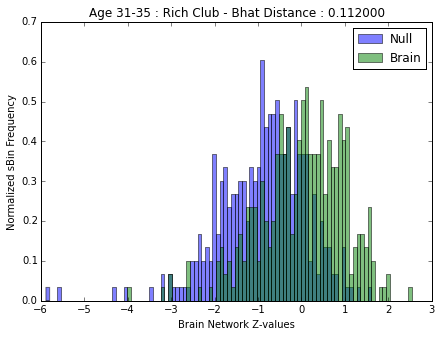

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5684: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


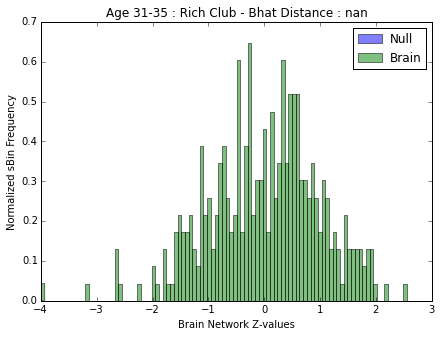

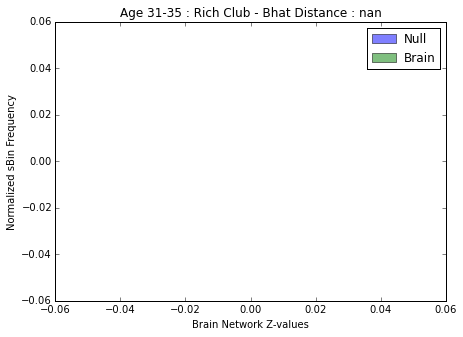

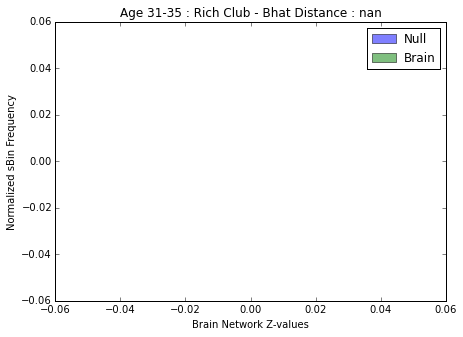

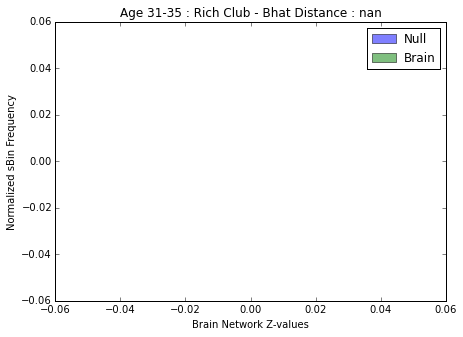

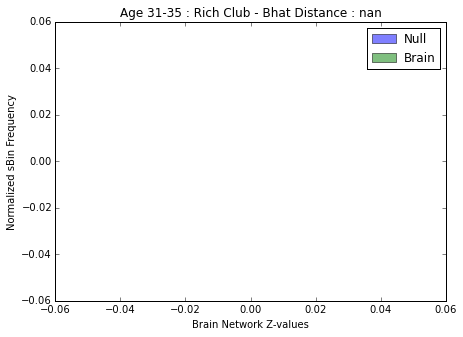

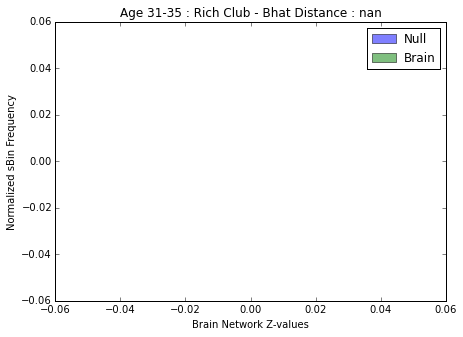

Mplex :  8
0/288 
250/288 


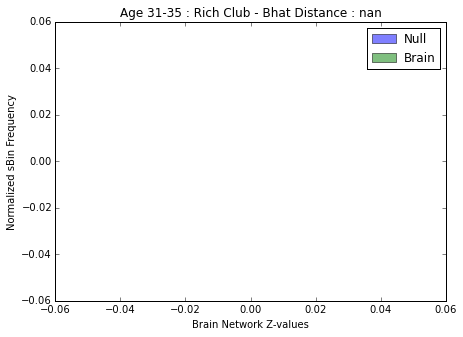

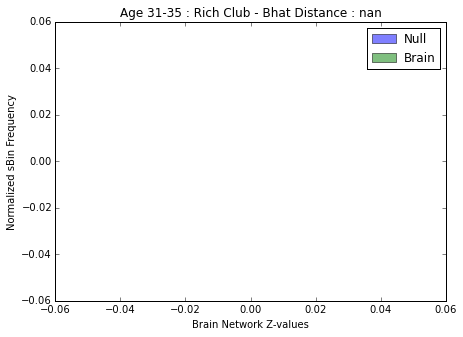

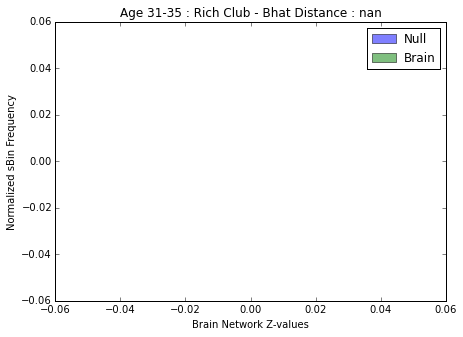

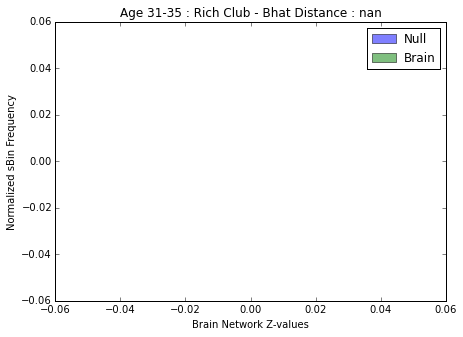

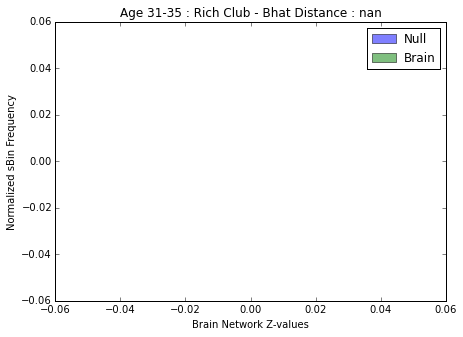

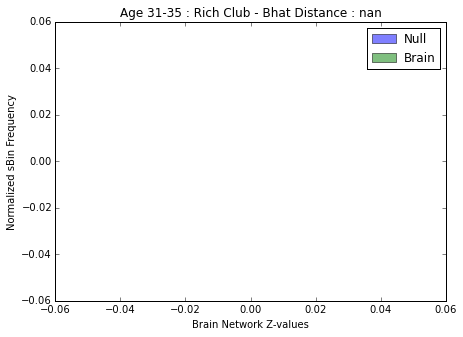

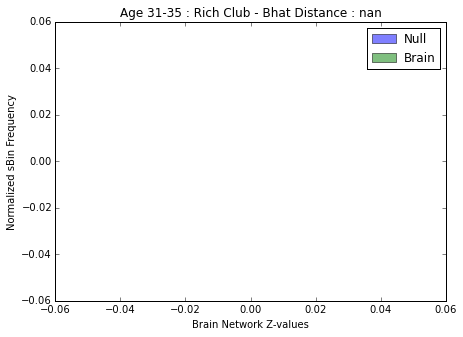

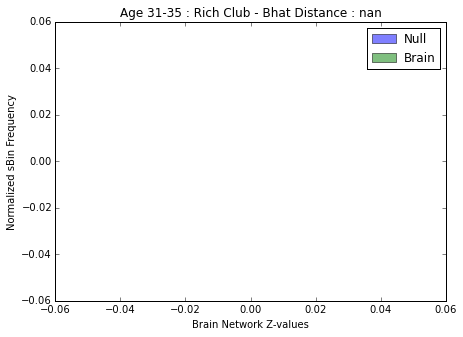

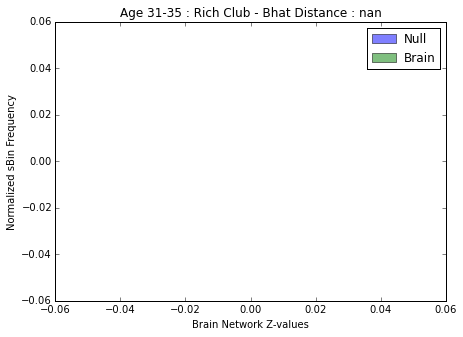

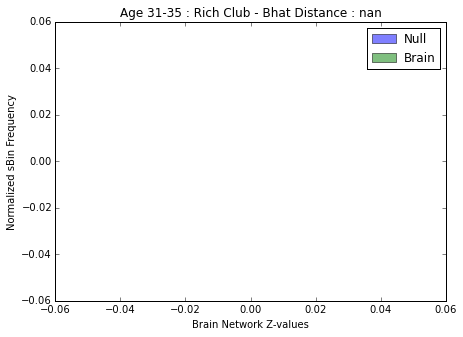

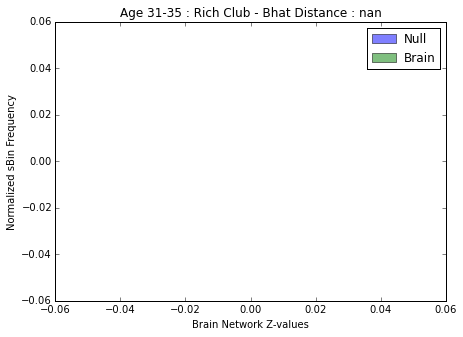

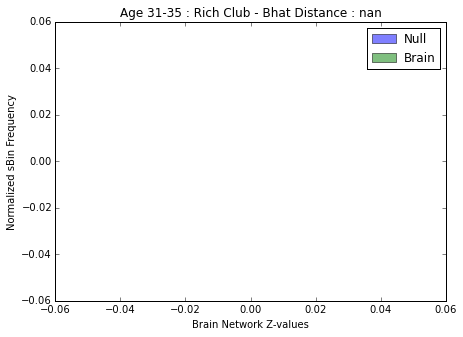

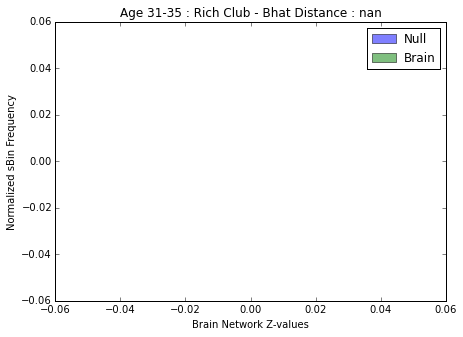

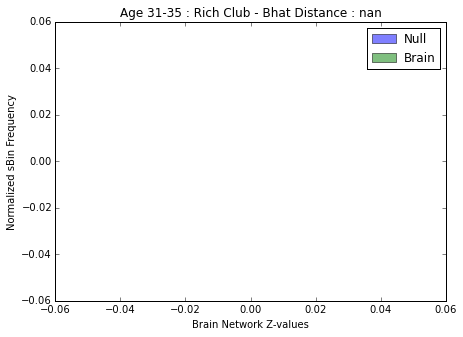

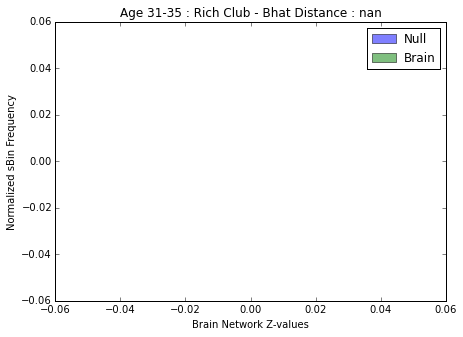

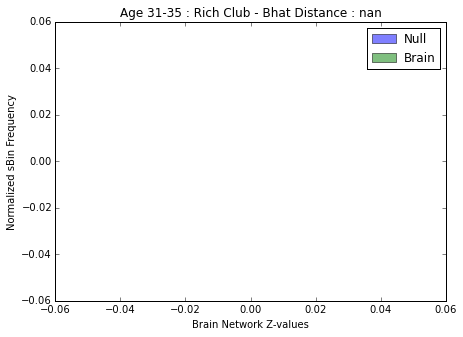

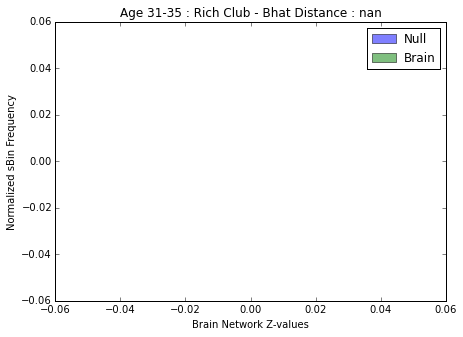

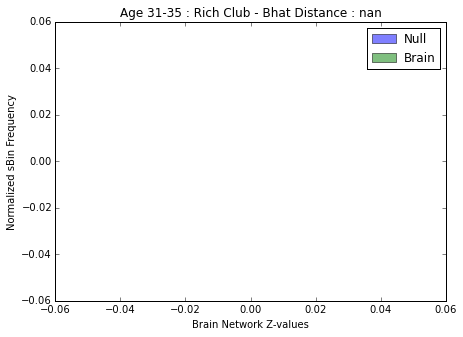

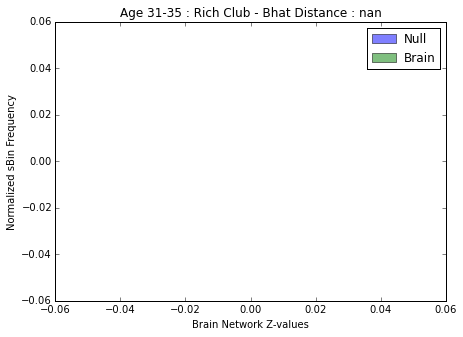

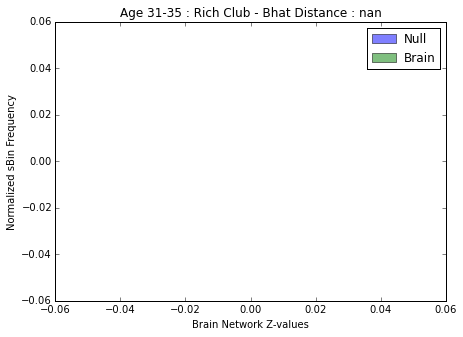

Mplex :  9
0/288 
250/288 


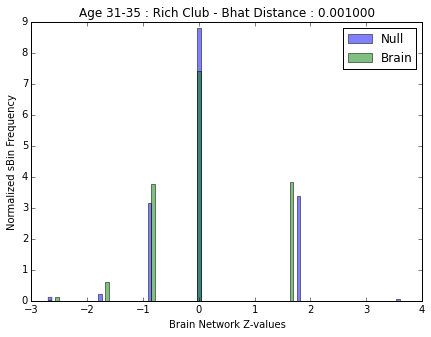

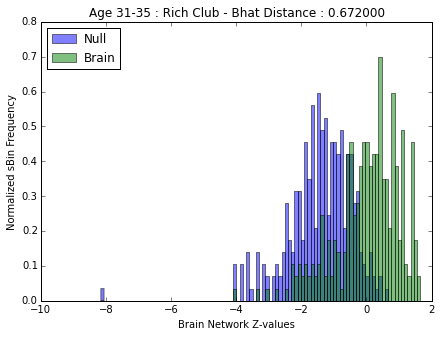

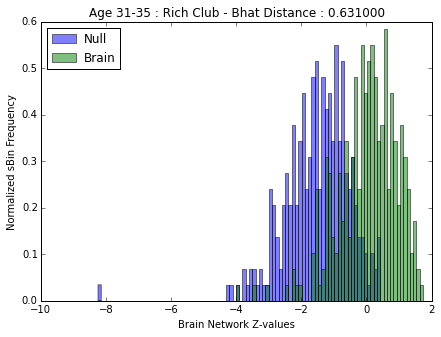

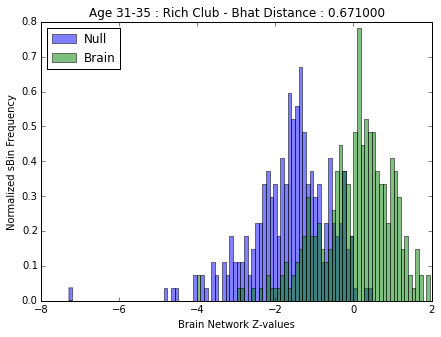

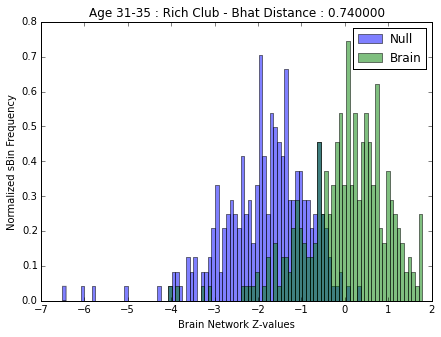

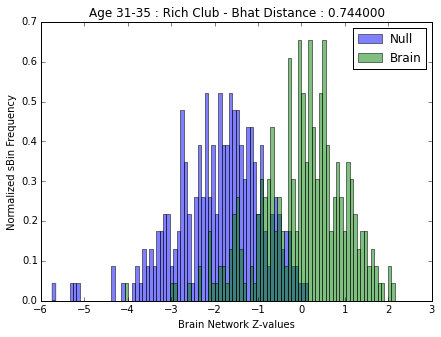

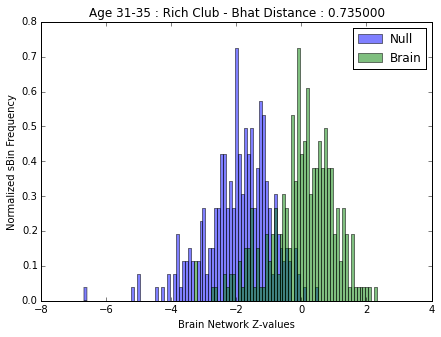

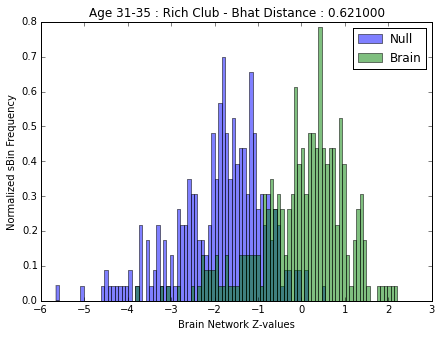

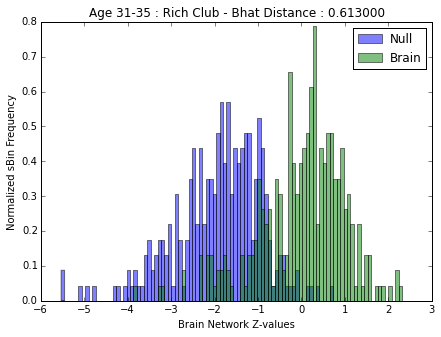

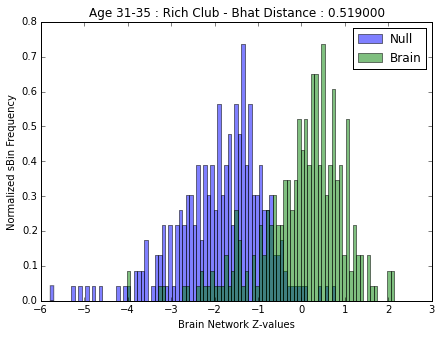

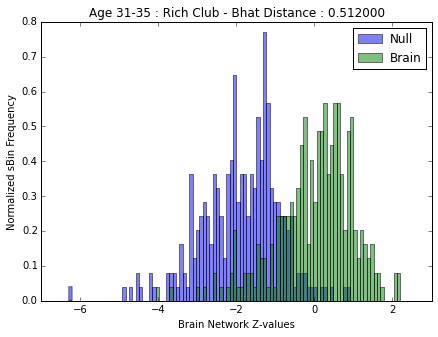

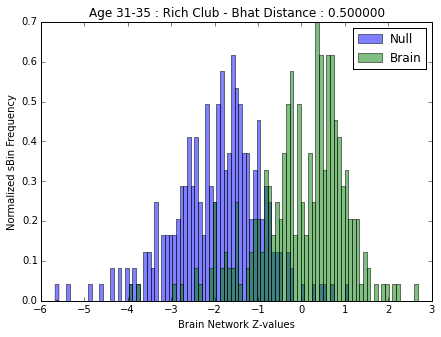

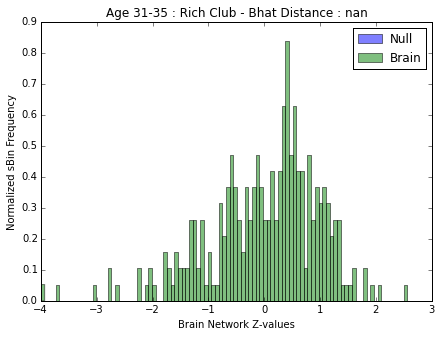

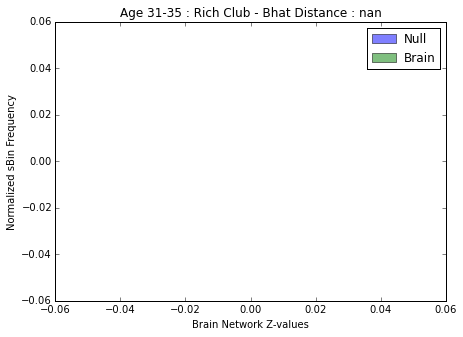

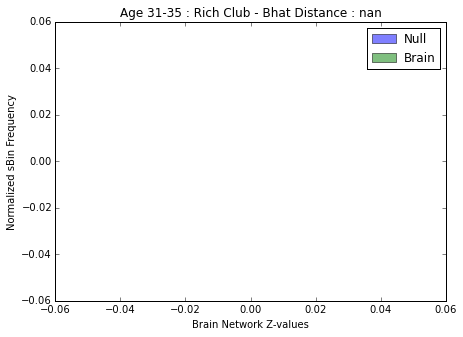

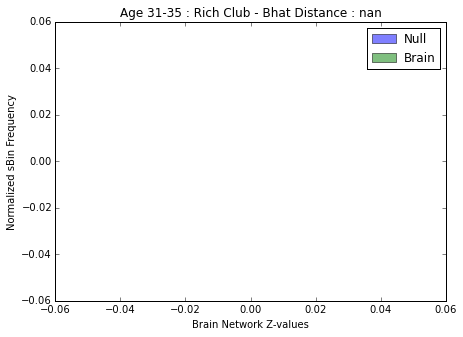

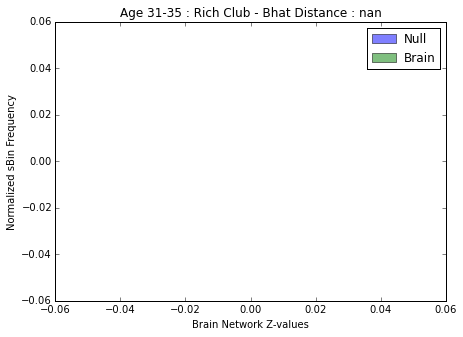

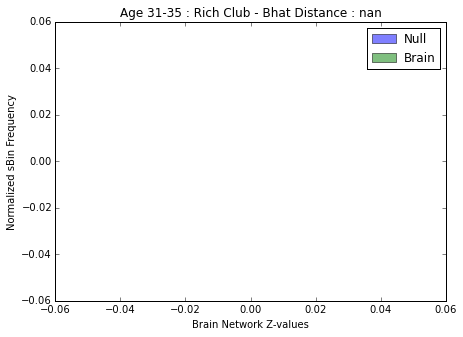

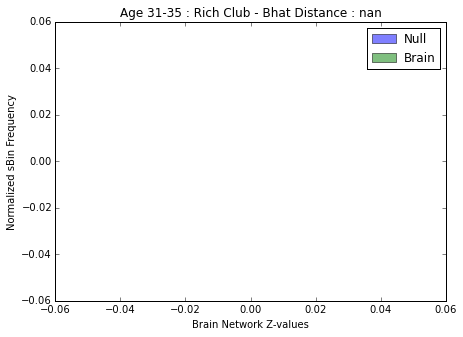

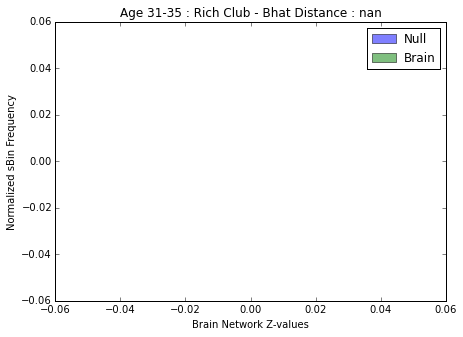

Mplex :  10
0/288 
250/288 


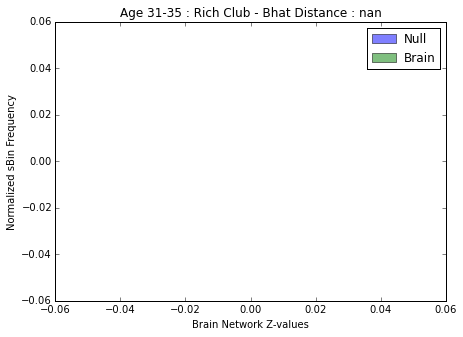

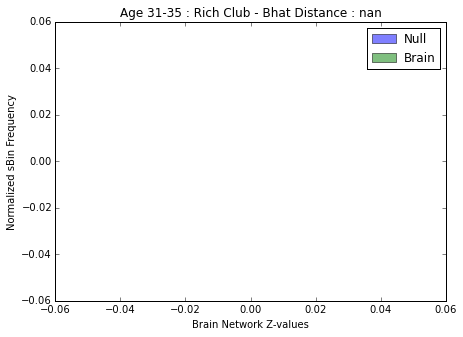

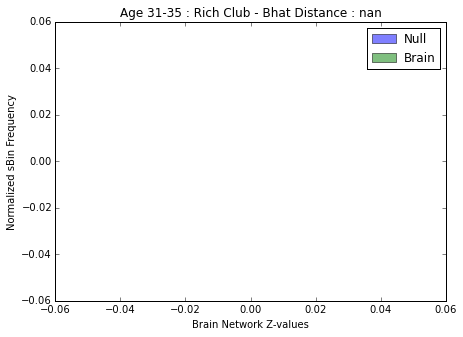

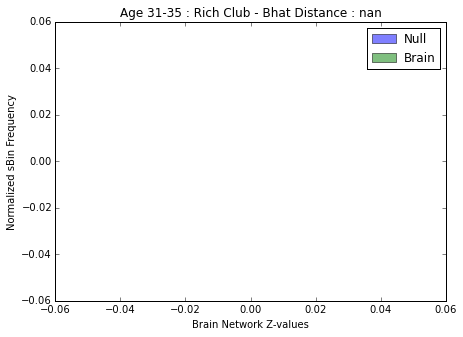

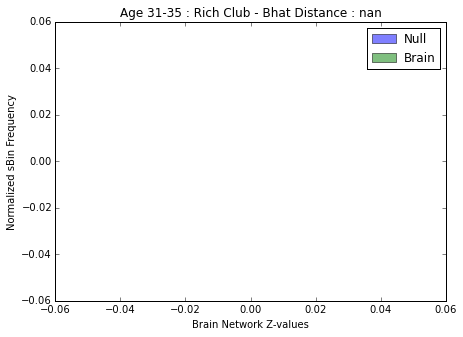

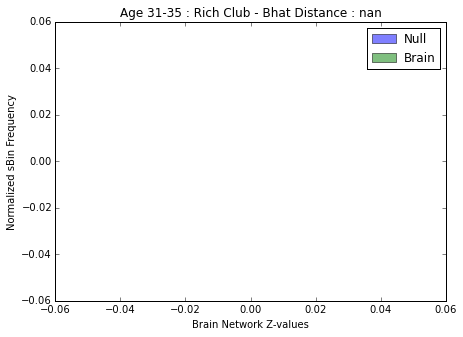

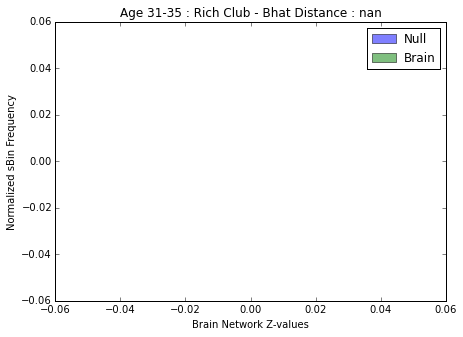

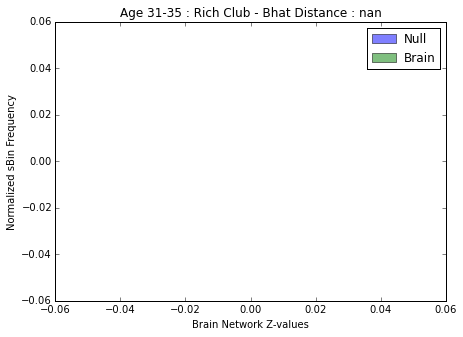

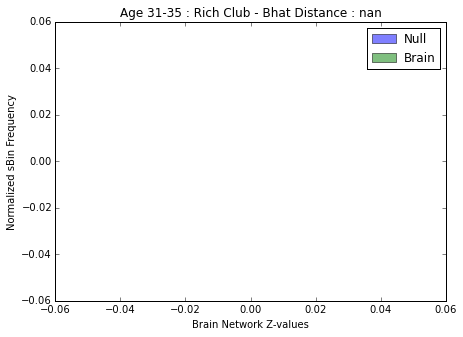

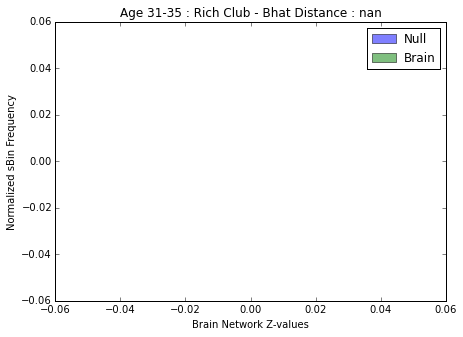

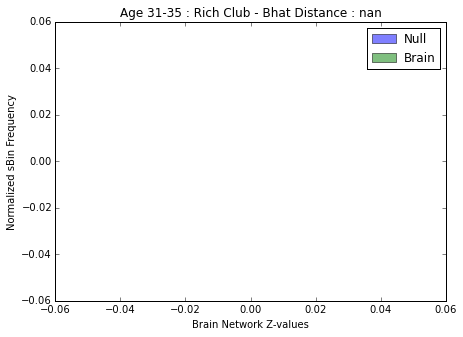

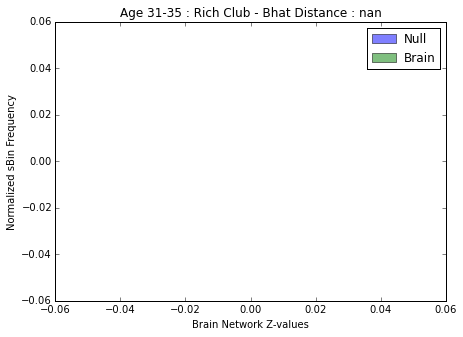

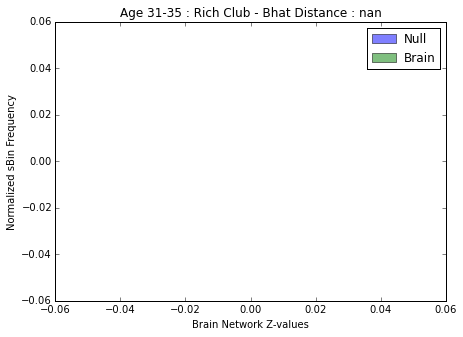

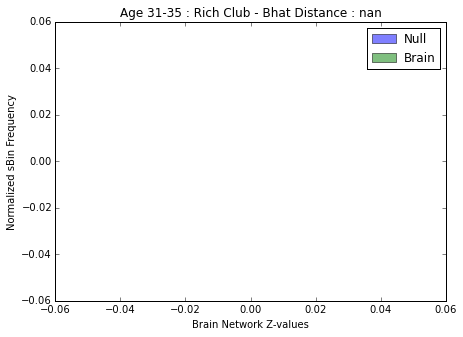

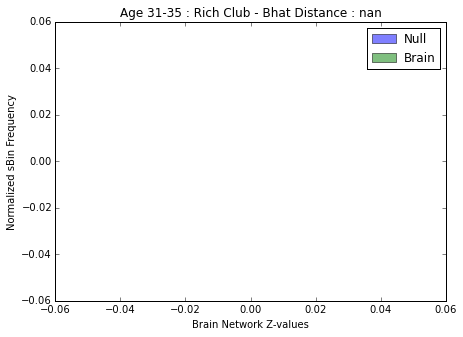

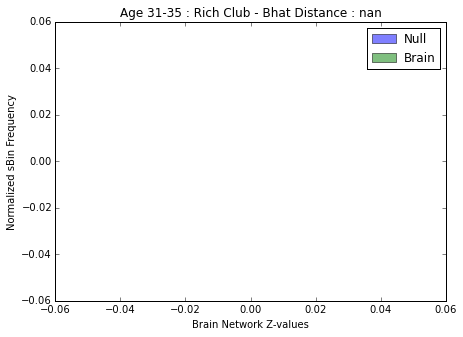

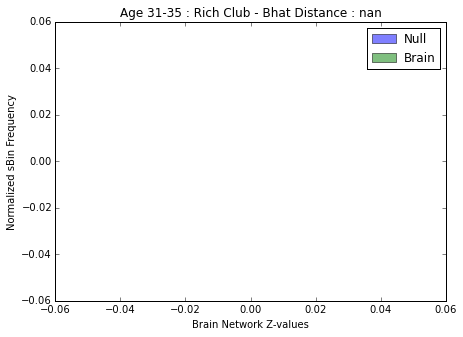

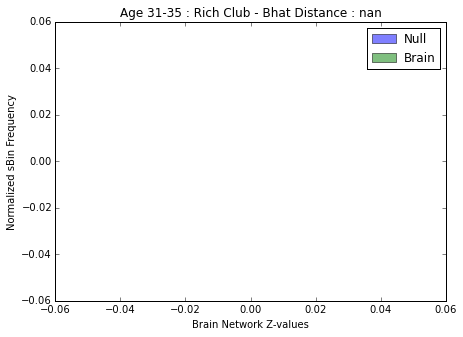

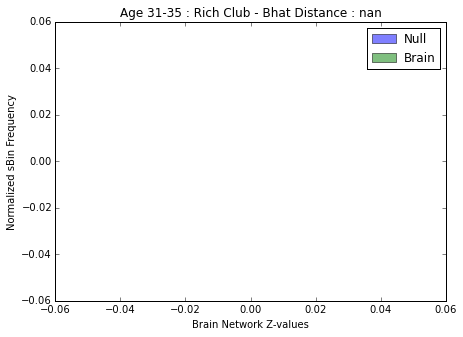

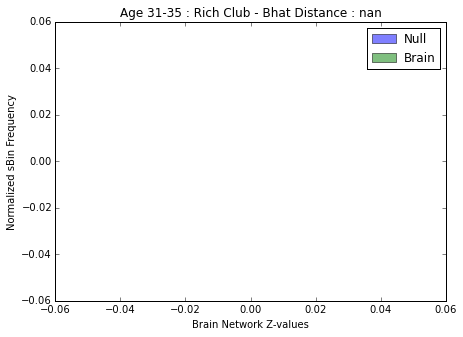

Mplex :  11
0/288 
250/288 


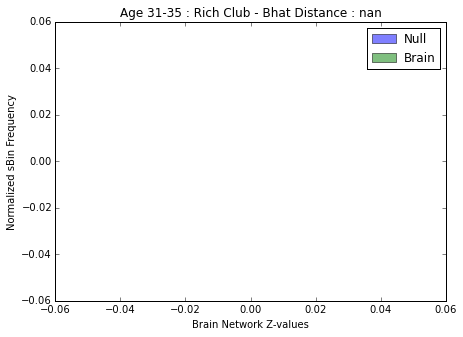

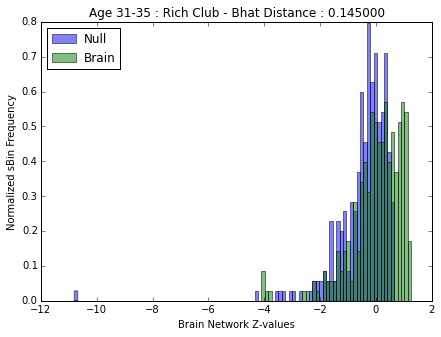

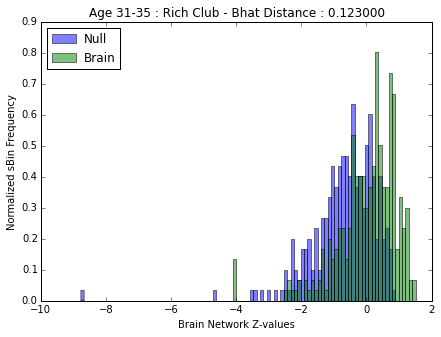

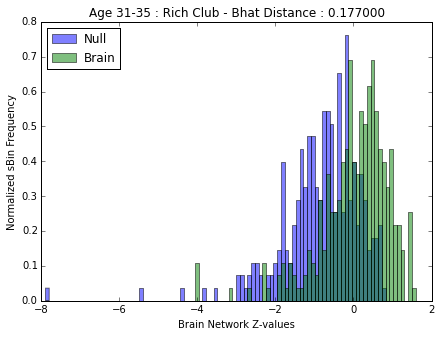

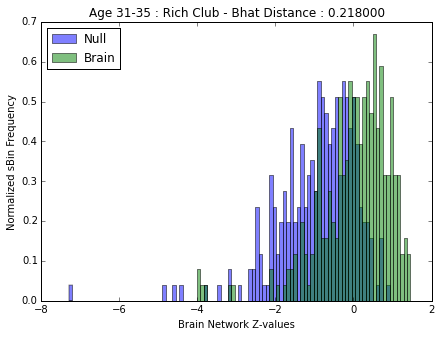

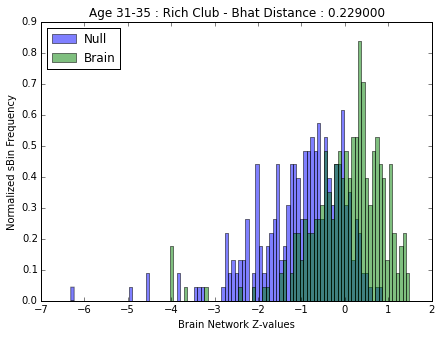

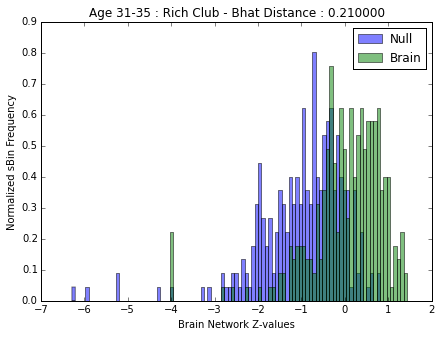

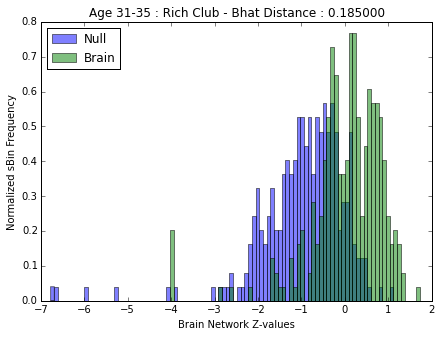

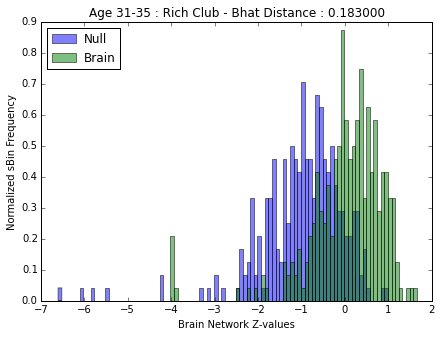

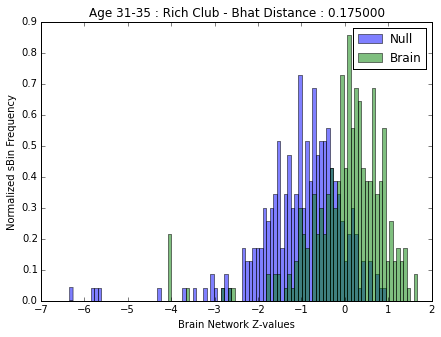

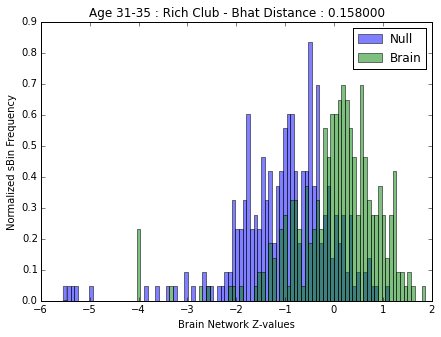

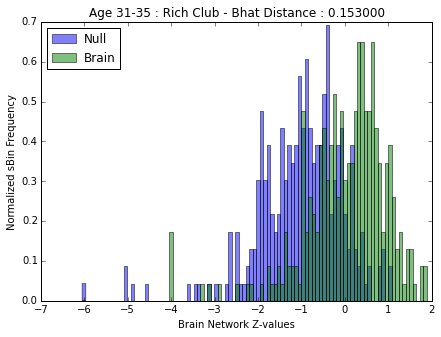

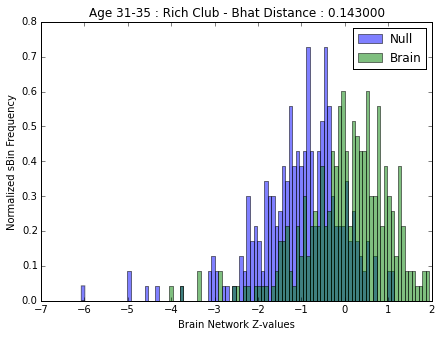

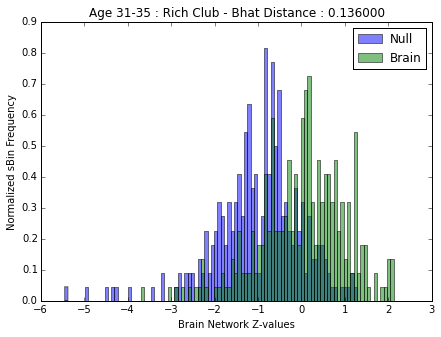

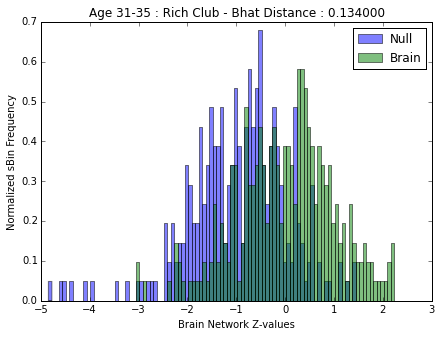

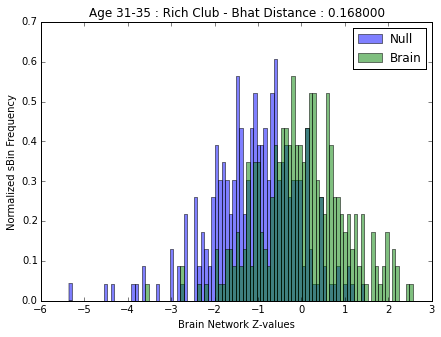

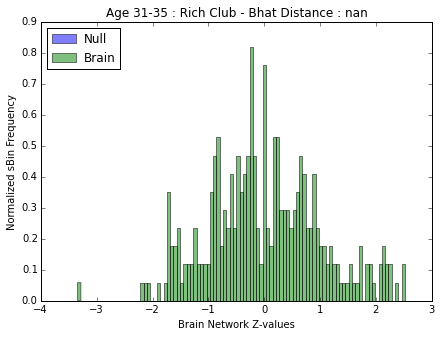

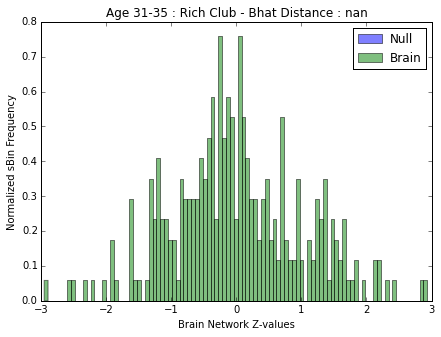

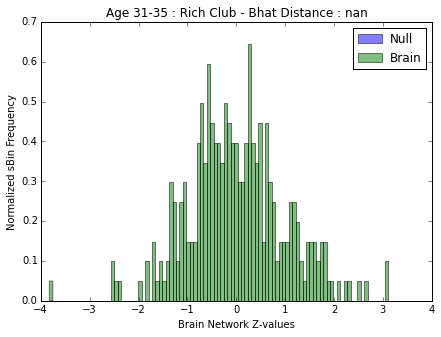

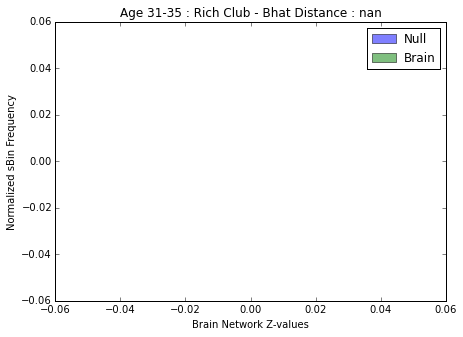

In [14]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((20,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx == 0 or mp_idx == 2:
            btwn,_,_ = bct.rich_club_bu(net,20)
            btwn_null,_,_ = bct.rich_club_bu(null,20)
        else:
            btwn = bct.rich_club_wu(net,20)
            btwn_null = bct.rich_club_wu(null,20)
        for ii in range(20):
            nb[ii,net_idx,0] = btwn[ii]
            nb[ii,net_idx,1] = btwn_null[ii]
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Rich Club']*20, 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Rich Club']*20, 'Age 26-30')
    else:
        plot_hist(nb,['Rich Club']*20, 'Age 31-35')

## 4. Degree

Mplex :  0
0/176 


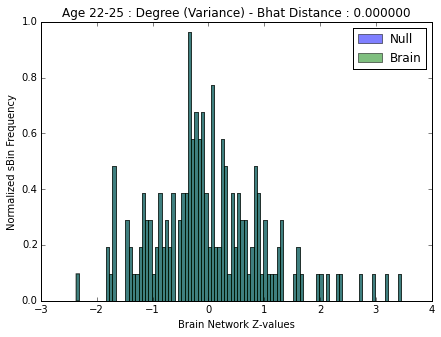

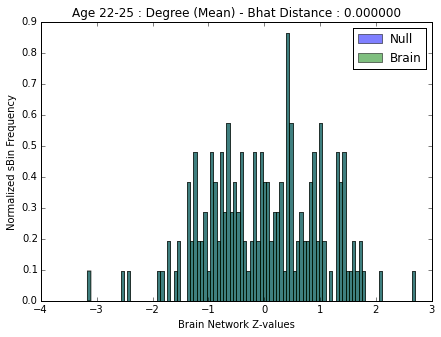

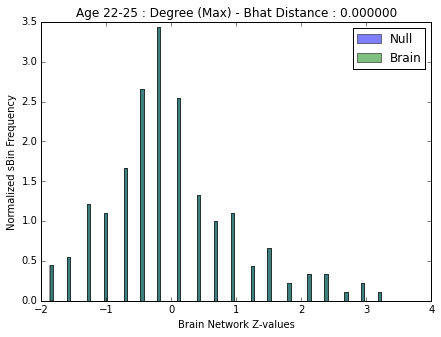

Mplex :  1
0/176 


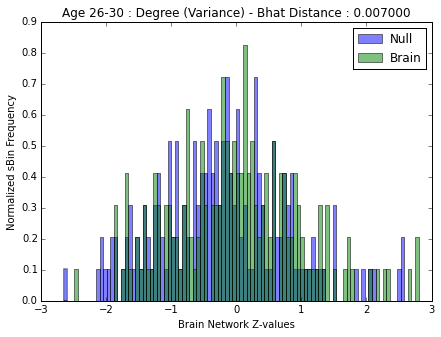

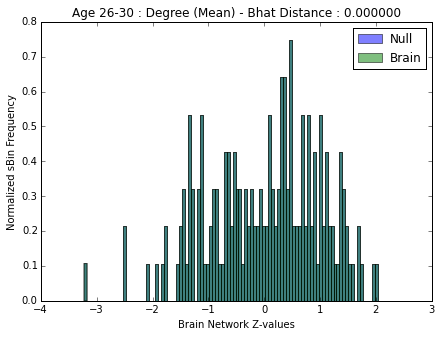

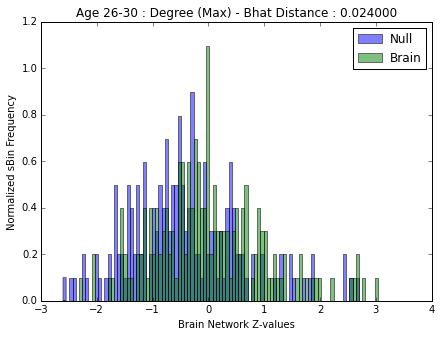

Mplex :  2
0/176 


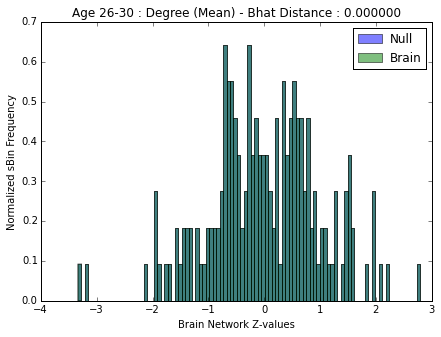

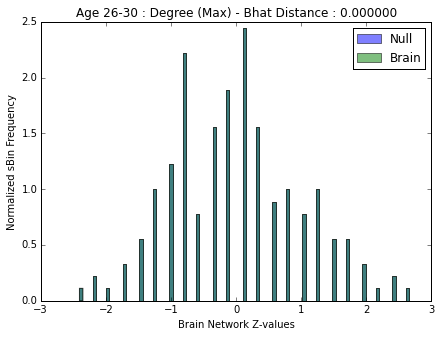

Mplex :  3
0/176 


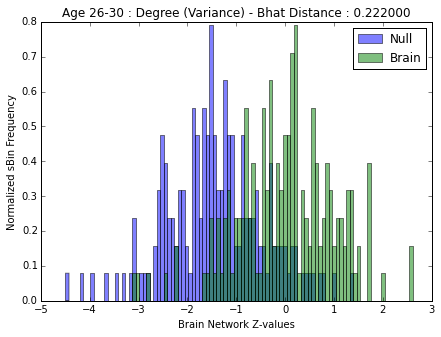

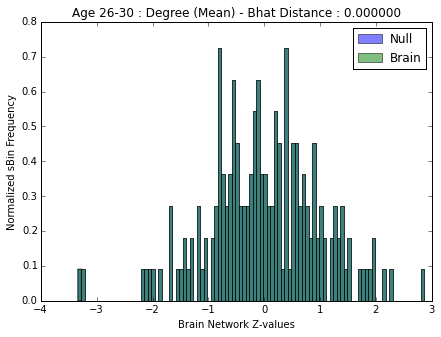

Mplex :  4
0/350 
250/350 


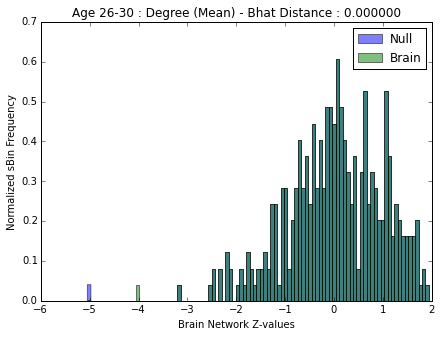

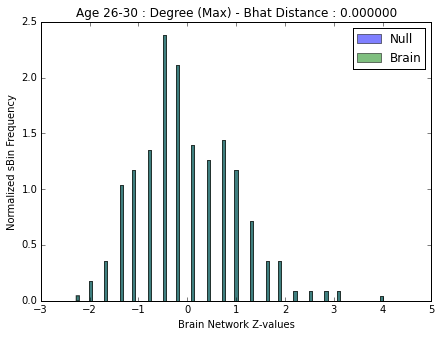

Mplex :  5
0/350 
250/350 


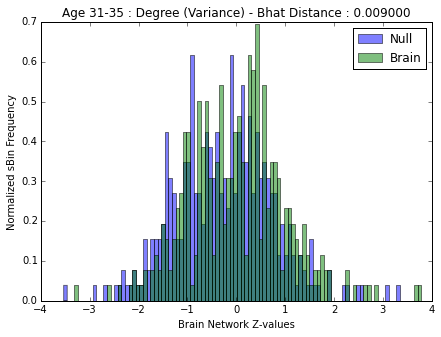

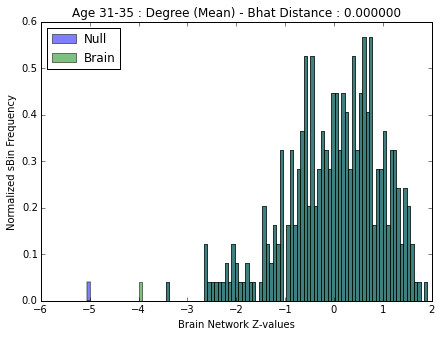

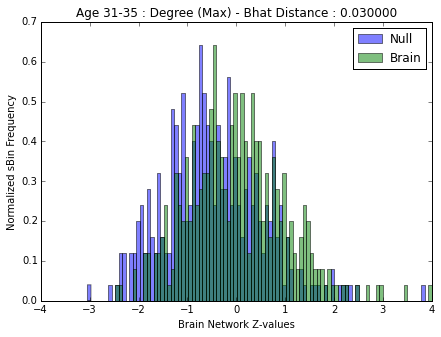

Mplex :  6
0/350 
250/350 


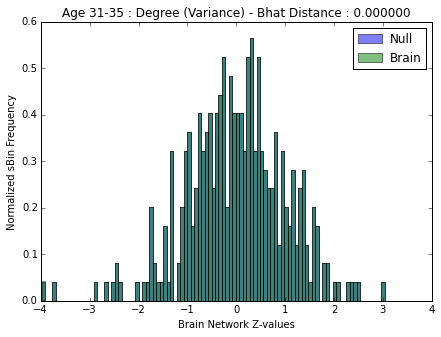

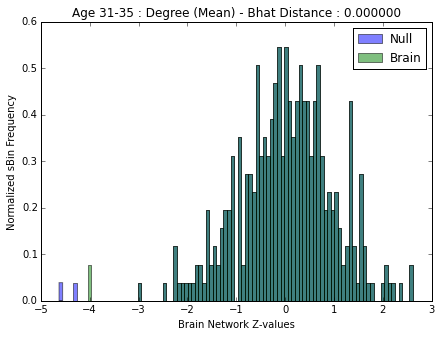

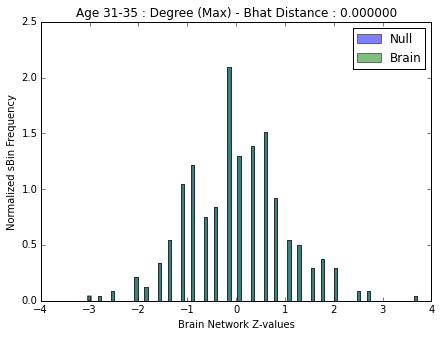

Mplex :  7
0/350 
250/350 


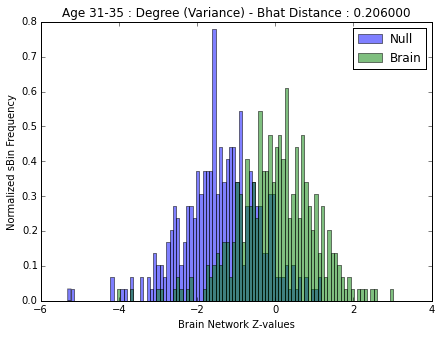

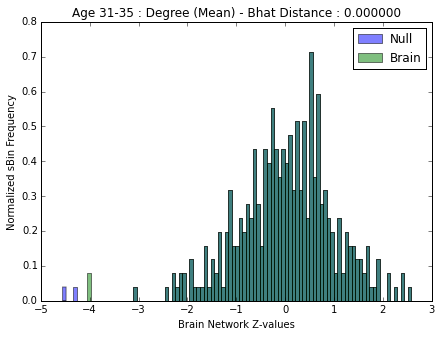

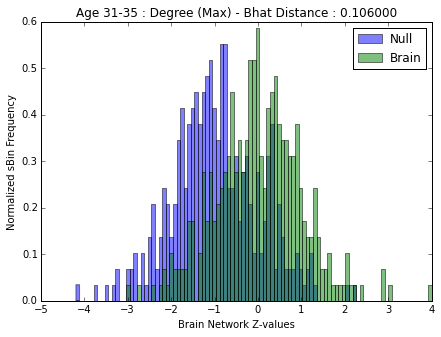

Mplex :  8
0/288 
250/288 


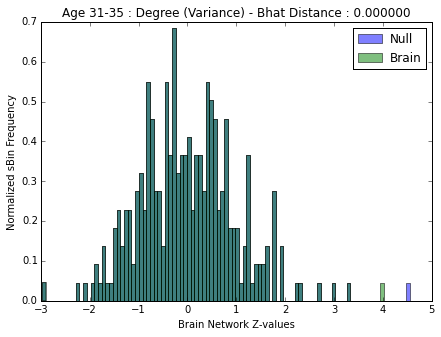

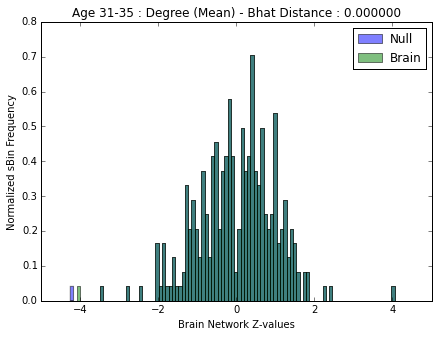

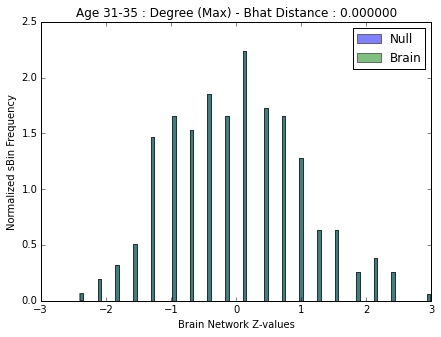

Mplex :  9
0/288 
250/288 


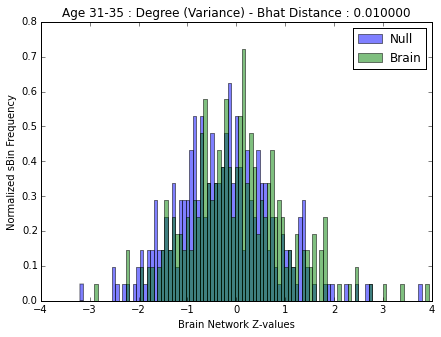

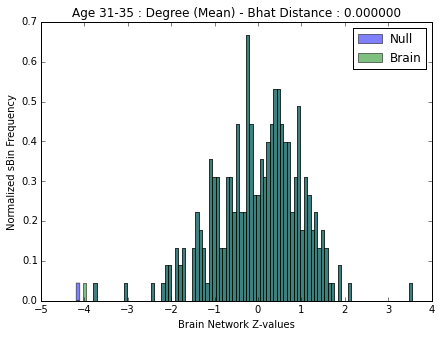

Mplex :  10
0/288 
250/288 


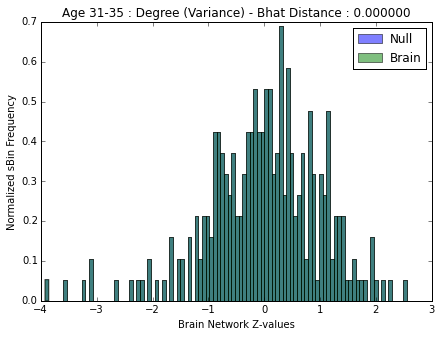

Mplex :  11
0/288 
250/288 


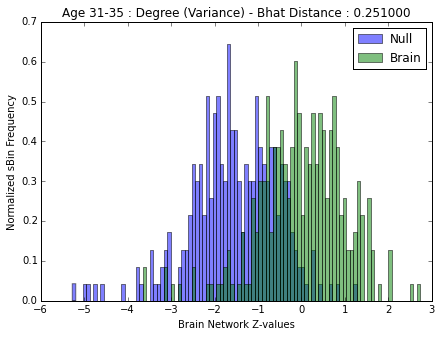

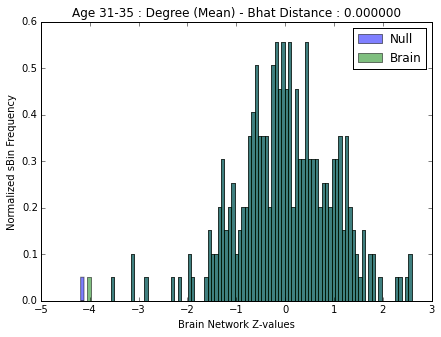

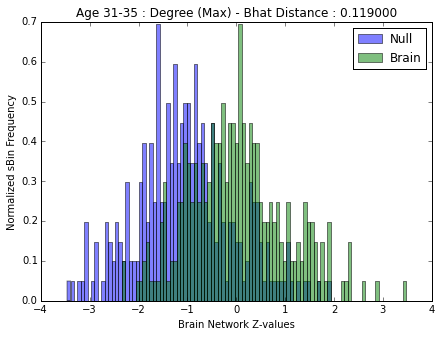

In [15]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.degrees_und(net)
            btwn_null = bct.degrees_und(null)
        else:
            btwn = bct.strengths_und(net)
            btwn_null = bct.strengths_und(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Degree (Variance)','Degree (Mean)', 'Degree (Max)'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Degree (Variance)','Degree (Mean)', 'Degree (Max)'], 'Age 26-30')
    else:
        plot_hist(nb,['Degree (Variance)','Degree (Mean)', 'Degree (Max)'], 'Age 31-35')

## 5. Distance

### 5A. Characteristic Path Length

Mplex :  0
0/176 
Mplex :  1
0/176 
Mplex :  2
0/176 
Mplex :  3
0/176 
Mplex :  4
0/350 
250/350 
Mplex :  5
0/350 
250/350 
Mplex :  6
0/350 
250/350 
Mplex :  7
0/350 
250/350 
Mplex :  8
0/288 
250/288 
Mplex :  9
0/288 
250/288 
Mplex :  10
0/288 
250/288 
Mplex :  11
0/288 
250/288 


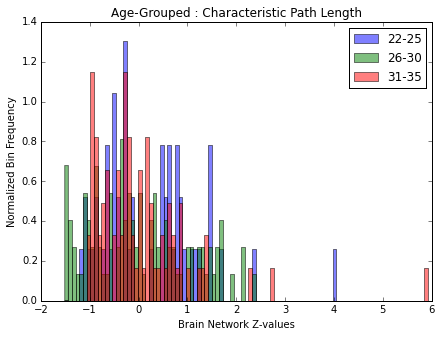

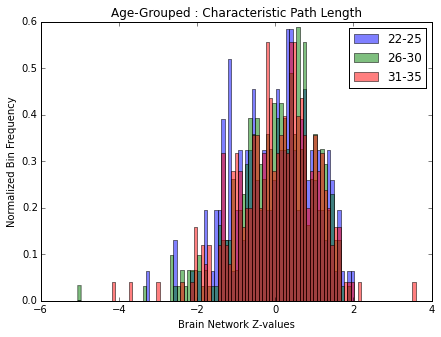

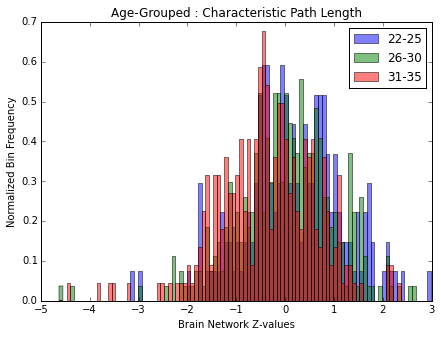

In [36]:
allvals = np.zeros((len(mp_list),820,1))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn,_,_,_,_ = bct.charpath(net+1e-7)
        btwn_null,_,_,_,_ = bct.charpath(null+1e-7)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
        allvals[mp_idx,net_idx,0] = btwn
    #if np.ceil(mp_idx / 4) == 0:
    #    plot_hist(nb,['Characteristic Path Length'], 'Age 22-25')
    #elif np.ceil(mp_idx / 4) == 1:
    #    plot_hist(nb,['Characteristic Path Length'], 'Age 26-30')
    #else:
    #    plot_hist(nb,['Characteristic Path Length'], 'Age 31-35')
plot_together(allvals,['Characteristic Path Length'])

### 5B. Efficiency from CharPath

Mplex :  0
0/176 
Mplex :  1
0/176 
Mplex :  2
0/176 
Mplex :  3
0/176 
Mplex :  4
0/350 
250/350 
Mplex :  5
0/350 
250/350 
Mplex :  6
0/350 
250/350 
Mplex :  7
0/350 
250/350 
Mplex :  8
0/288 
250/288 
Mplex :  9
0/288 
250/288 
Mplex :  10
0/288 
250/288 
Mplex :  11
0/288 
250/288 


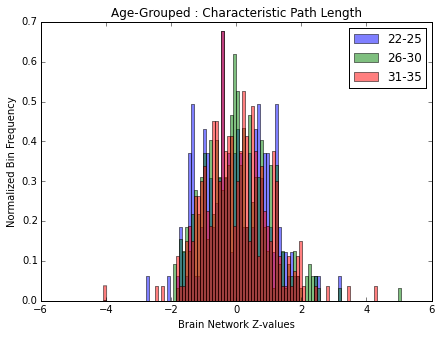

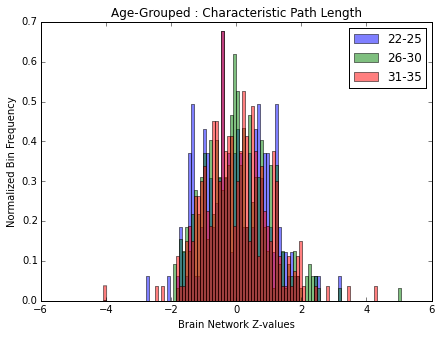

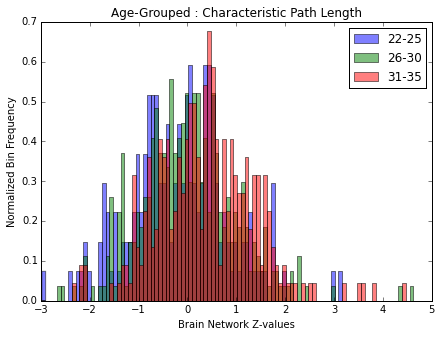

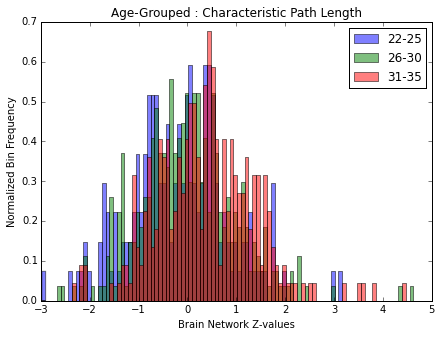

In [39]:
allvals = np.zeros((len(mp_list),354,1))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,btwn,_,_,_ = bct.charpath(net+1e-7)
        _,btwn_null,_,_,_ = bct.charpath(null+1e-7)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
        allvals[mp_idx,net_idx,0] = btwn
    #if np.ceil(mp_idx / 4) == 0:
    #    plot_hist(nb,['Efficiency'], 'Age 22-25')
    #elif np.ceil(mp_idx / 4) == 1:
    #    plot_hist(nb,['Efficiency'], 'Age 26-30')
    #else:
    #    plot_hist(nb,['Efficiency'], 'Age 31-35')
plot_together(allvals,['Efficiency'])

### 5C. Global Efficiency

Mplex :  0
0/176 
Mplex :  1
0/176 
Mplex :  2
0/176 
Mplex :  3
0/176 
Mplex :  4
0/350 
250/350 
Mplex :  5
0/350 
250/350 
Mplex :  6
0/350 
250/350 
Mplex :  7
0/350 
250/350 
Mplex :  8
0/288 
250/288 
Mplex :  9
0/288 
250/288 
Mplex :  10
0/288 
250/288 
Mplex :  11
0/288 
250/288 


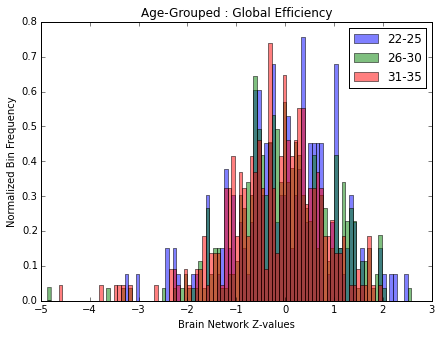

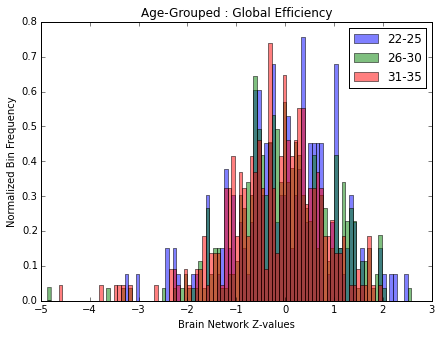

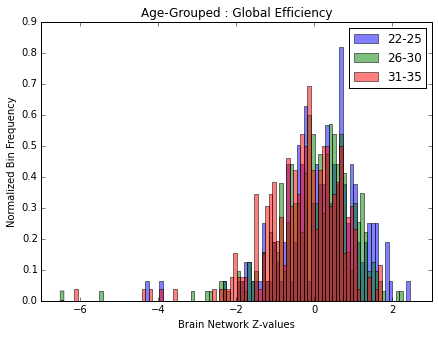

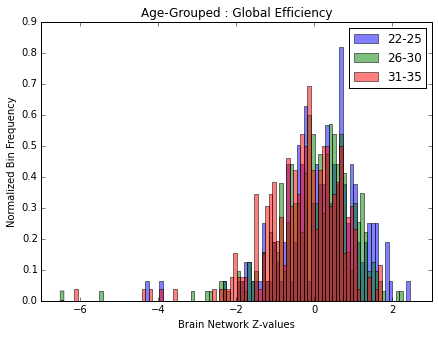

In [40]:
allvals = np.zeros((len(mp_list),354,1))
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn,_ = bct.efficiency_bin(net)
        btwn_null,_= bct.efficiency_bin(null)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
        allvals[mp_idx,net_idx,0] = btwn
    #if np.ceil(mp_idx / 4) == 0:
    #    plot_hist(nb,['Global Efficiency'], 'Age 22-25')
    #elif np.ceil(mp_idx / 4) == 1:
    #    plot_hist(nb,['Global Efficiency'], 'Age 26-30')
    #else:
    #    plot_hist(nb,['Global Efficiency'], 'Age 31-35')
plot_together(allvals,['Global Efficiency'])

### 5D. Local Efficiency 

Mplex :  0
0/176 


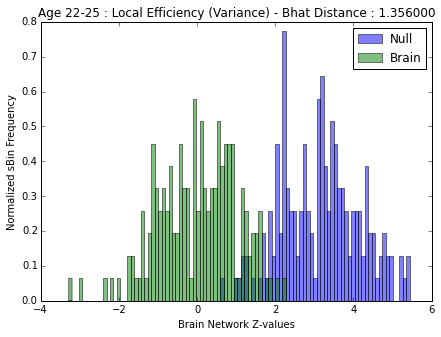

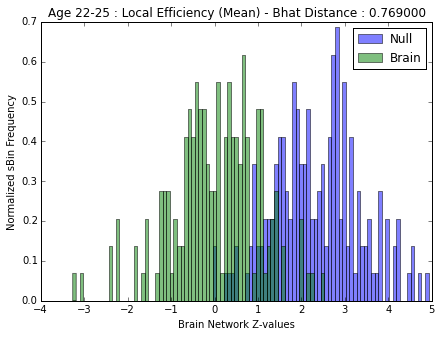

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


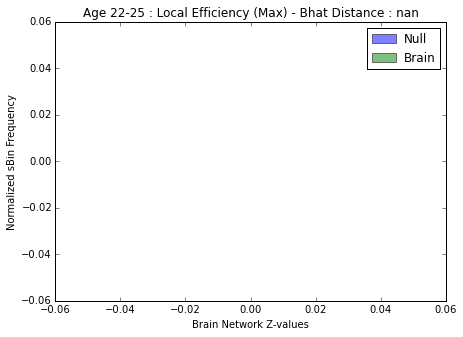

Mplex :  1
0/176 


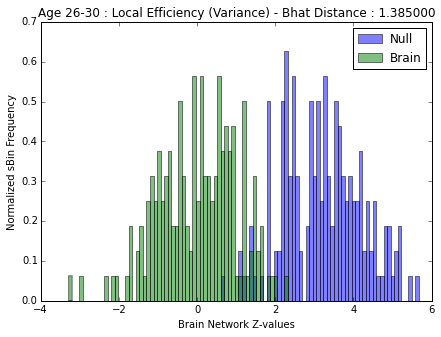

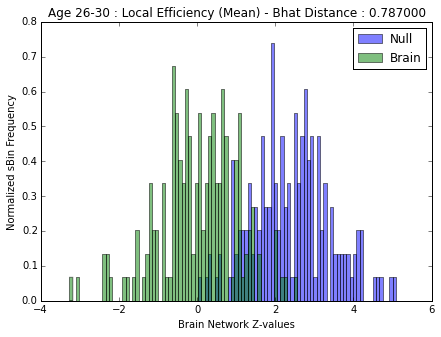

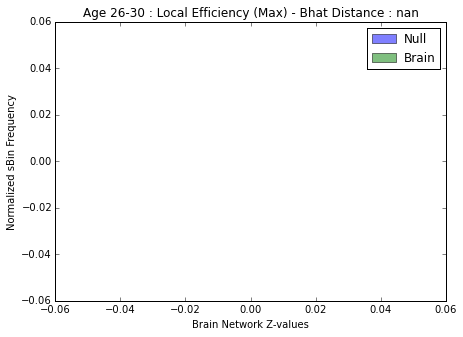

Mplex :  2
0/176 


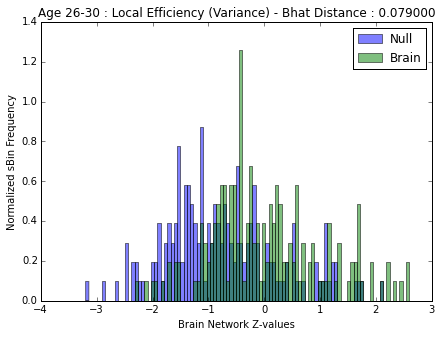

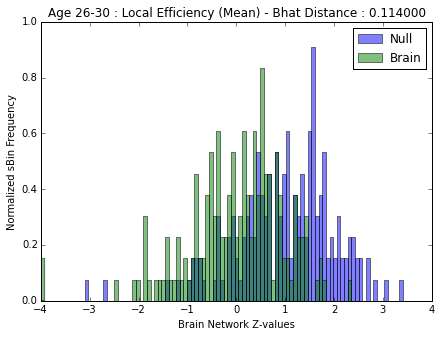

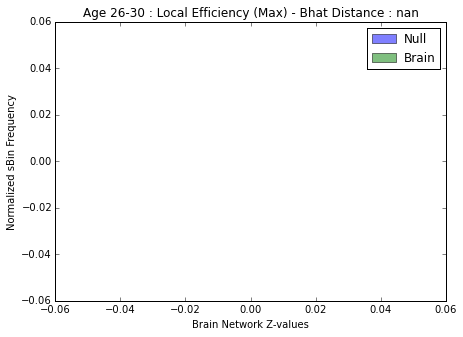

Mplex :  3
0/176 


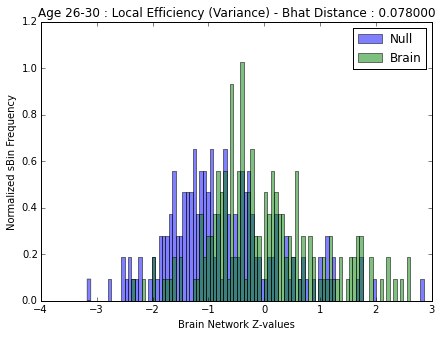

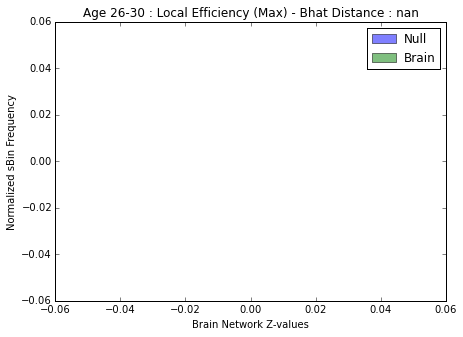

Mplex :  4
0/350 
250/350 


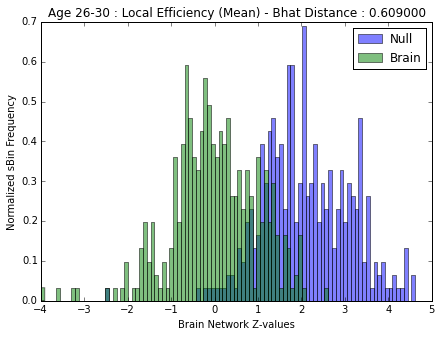

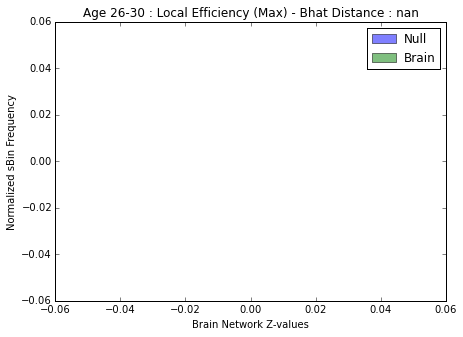

Mplex :  5
0/350 
250/350 


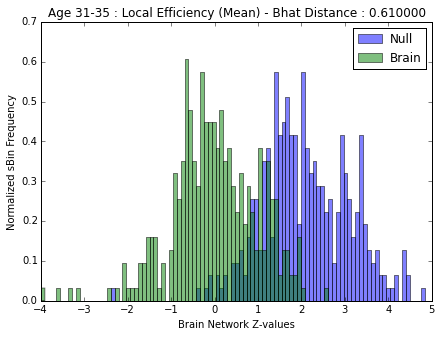

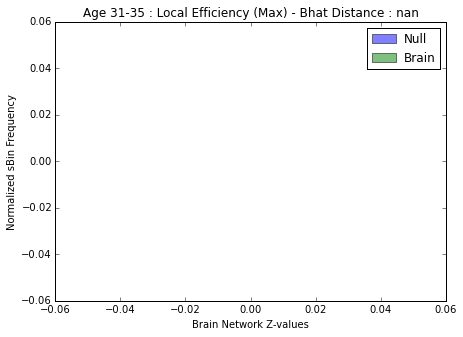

Mplex :  6
0/350 
250/350 


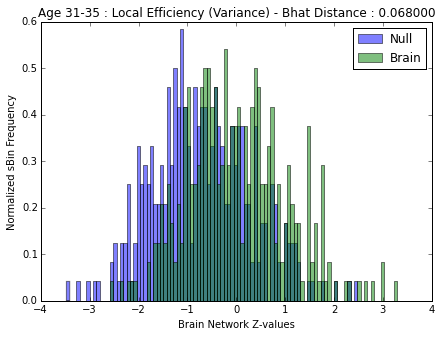

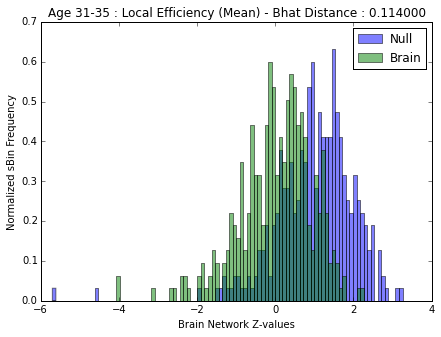

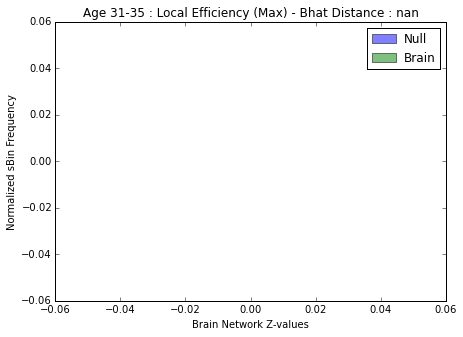

Mplex :  7
0/350 
250/350 


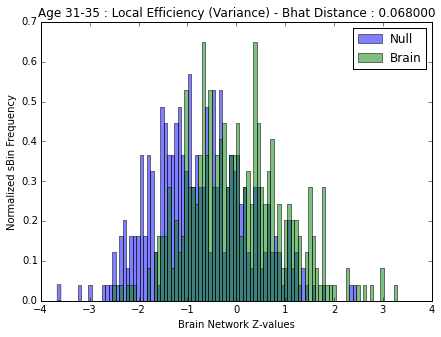

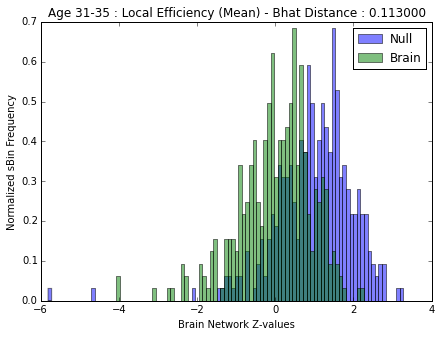

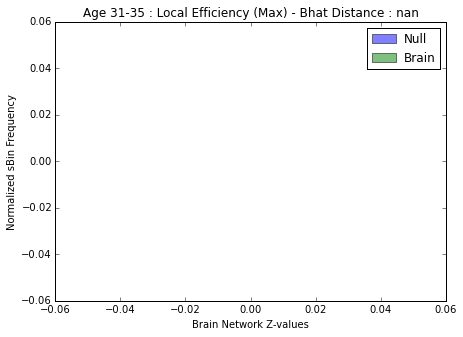

Mplex :  8
0/288 
250/288 


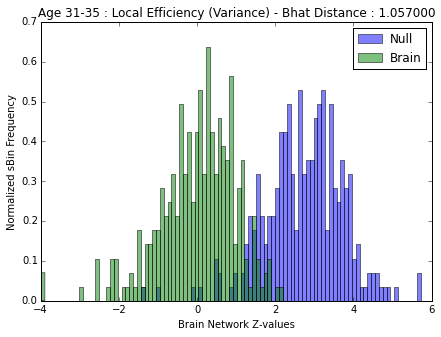

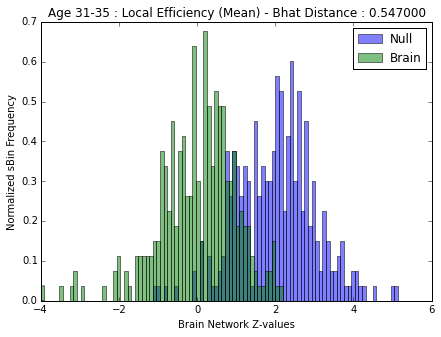

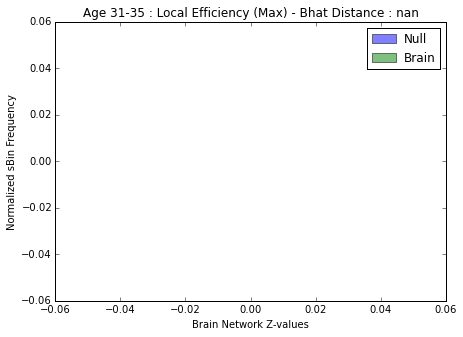

Mplex :  9
0/288 
250/288 


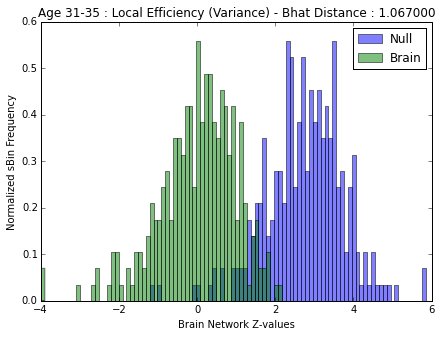

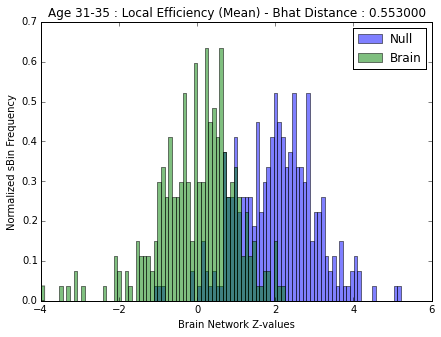

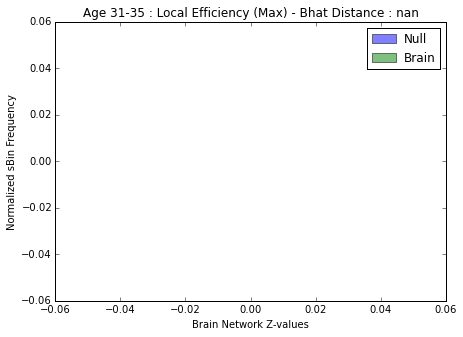

Mplex :  10
0/288 
250/288 


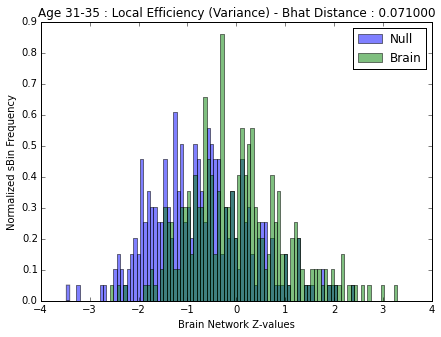

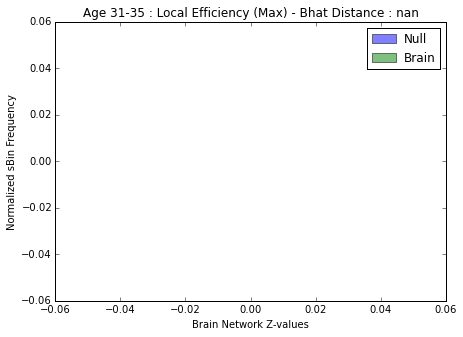

Mplex :  11
0/288 
250/288 


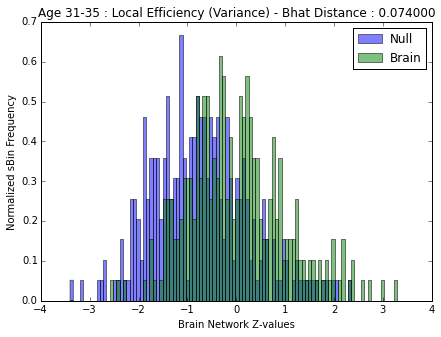

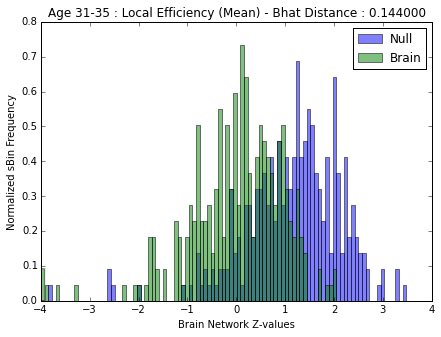

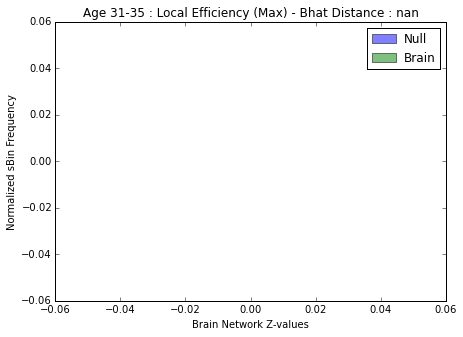

In [22]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,btwn = bct.efficiency_bin(net)
        _,btwn_null = bct.efficiency_bin(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Local Efficiency (Variance)', 'Local Efficiency (Mean)', 'Local Efficiency (Max)'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Local Efficiency (Variance)', 'Local Efficiency (Mean)', 'Local Efficiency (Max)'], 'Age 26-30')
    else:
        plot_hist(nb,['Local Efficiency (Variance)', 'Local Efficiency (Mean)', 'Local Efficiency (Max)'], 'Age 31-35')

### 5E. Eccentricity

Mplex :  0
0/176 


//anaconda/lib/python2.7/site-packages/bctpy-0.4.1-py2.7.egg/bct/algorithms/distance.py:159: RuntimeWarning: divide by zero encountered in true_divide
  D = 1 / D  # invert distance


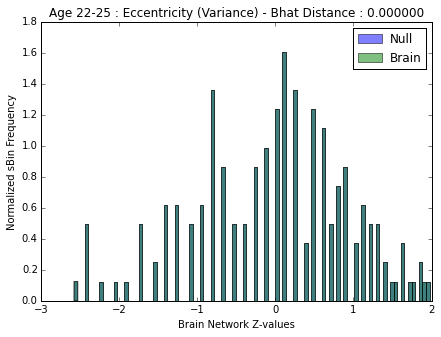

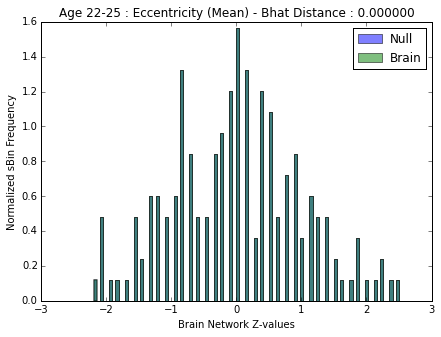

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


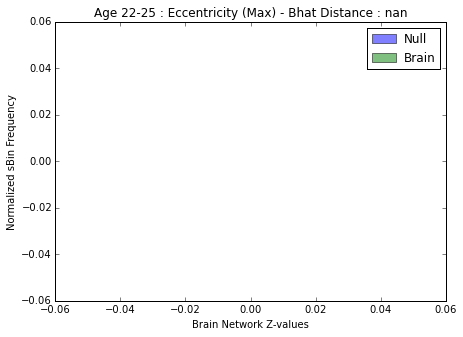

Mplex :  1
0/176 


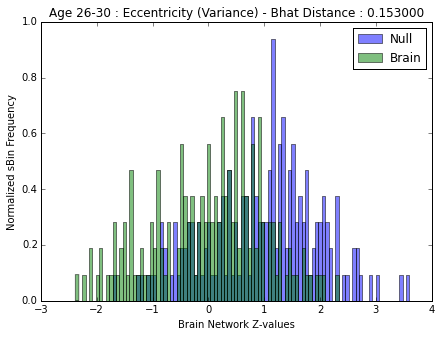

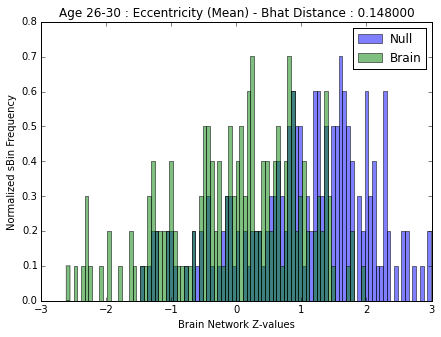

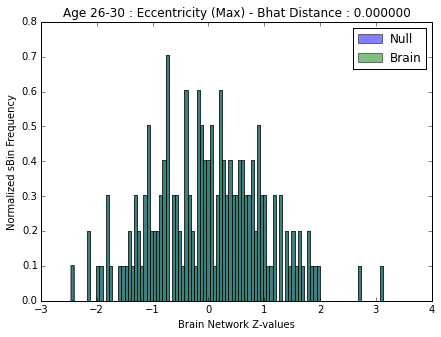

Mplex :  2
0/176 


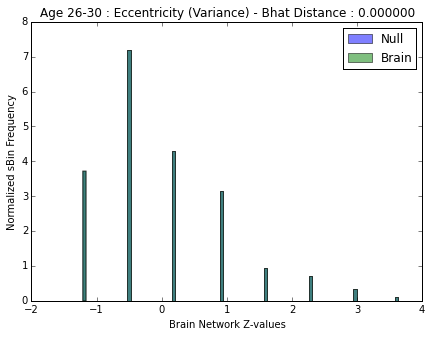

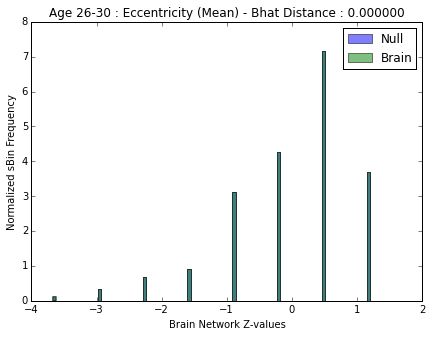

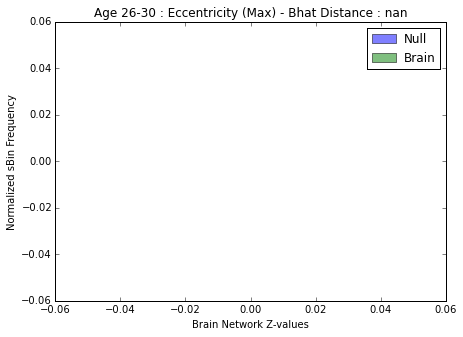

Mplex :  3
0/176 


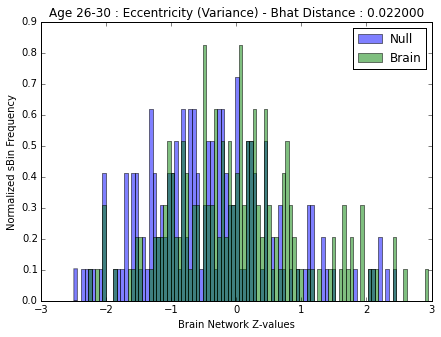

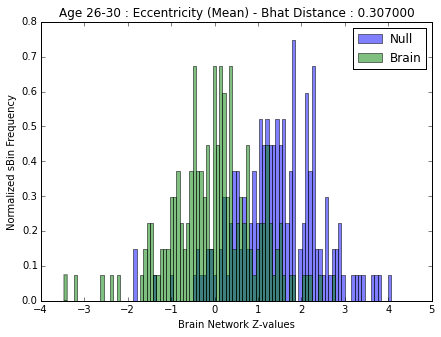

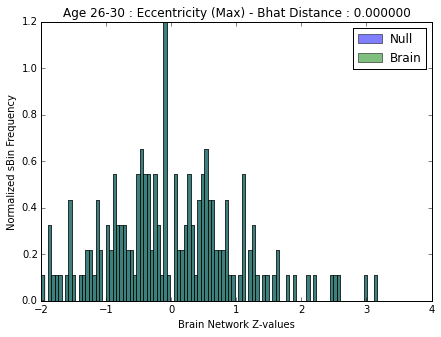

Mplex :  4
0/350 
250/350 


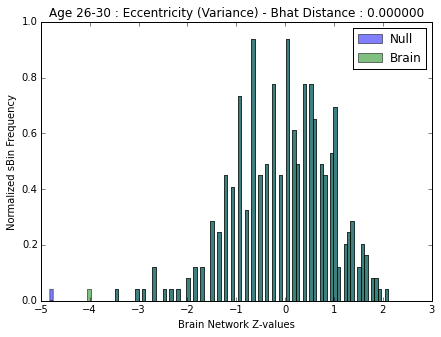

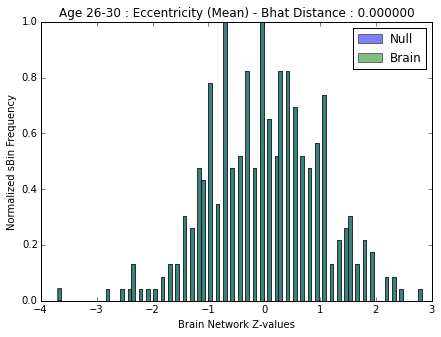

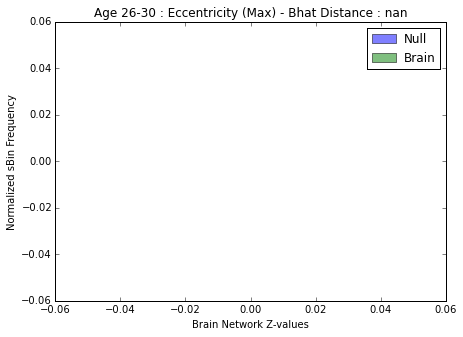

Mplex :  5
0/350 
250/350 


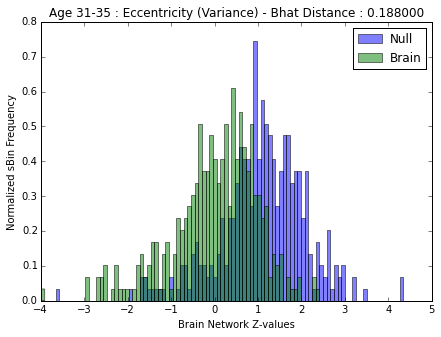

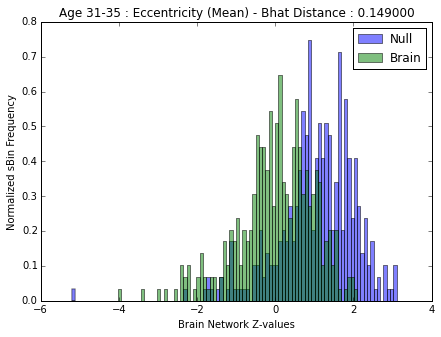

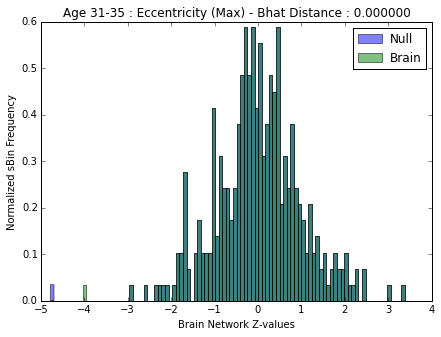

Mplex :  6
0/350 
250/350 


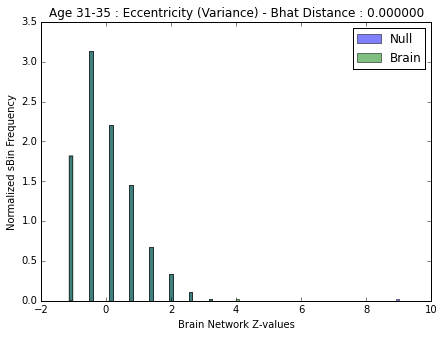

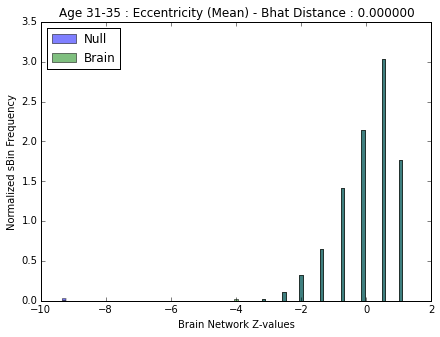

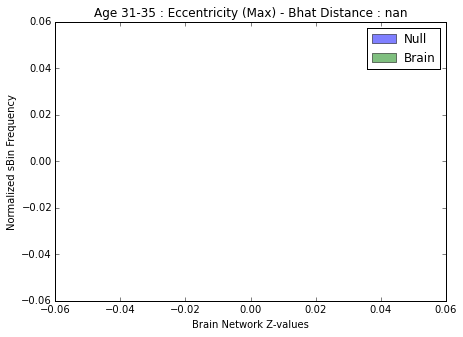

Mplex :  7
0/350 
250/350 


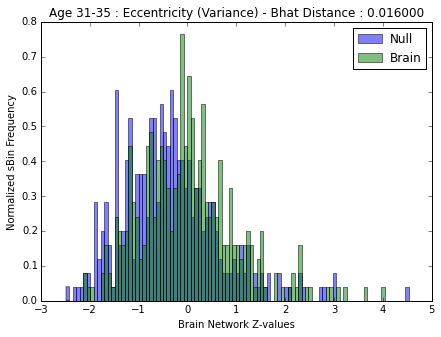

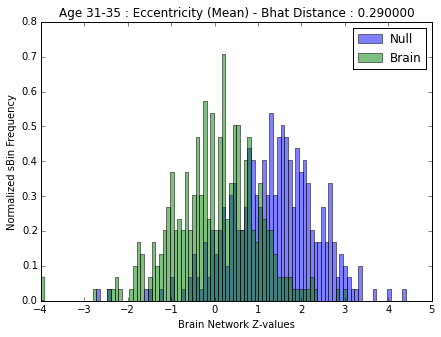

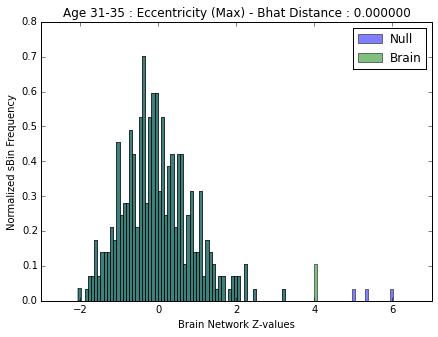

Mplex :  8
0/288 
250/288 


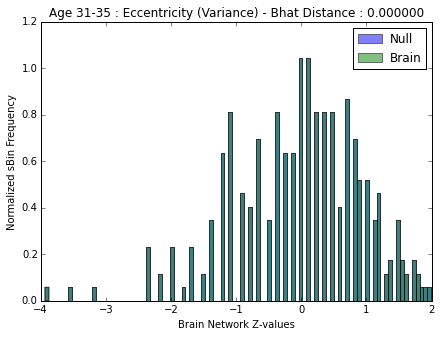

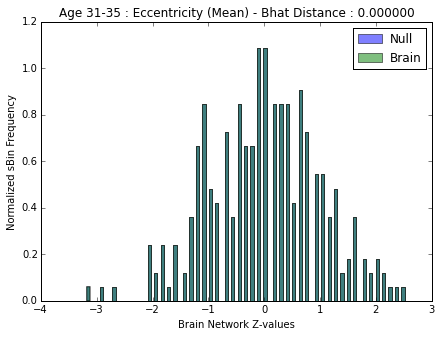

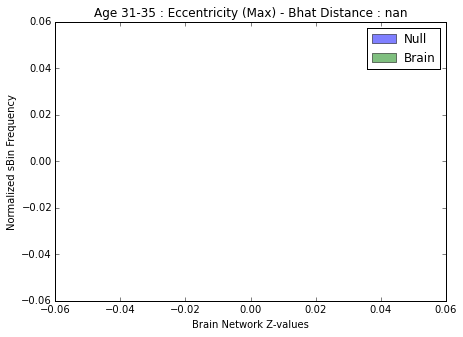

Mplex :  9
0/288 
250/288 


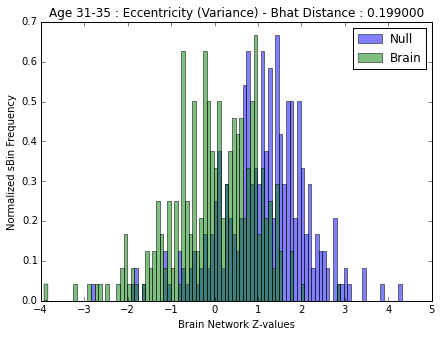

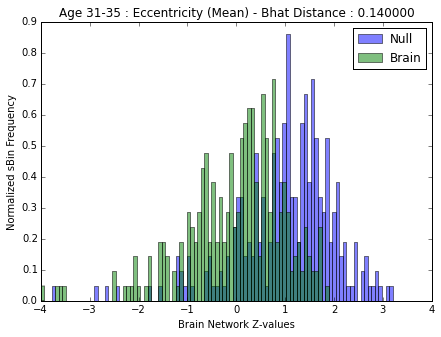

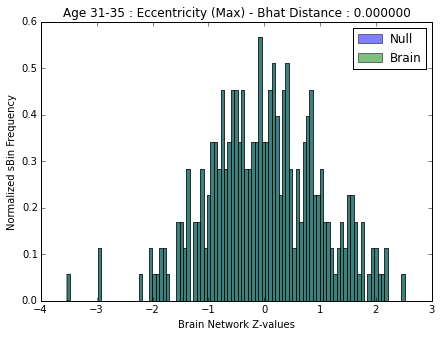

Mplex :  10
0/288 
250/288 


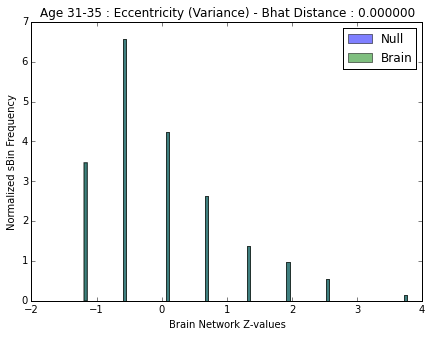

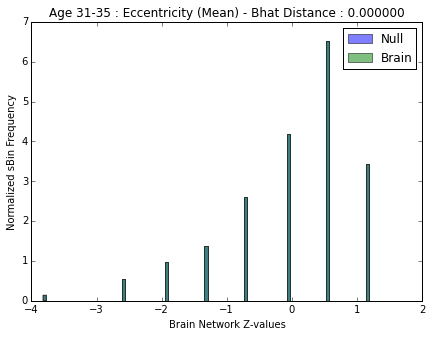

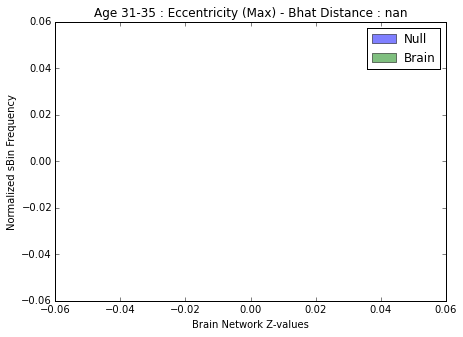

Mplex :  11
0/288 
250/288 


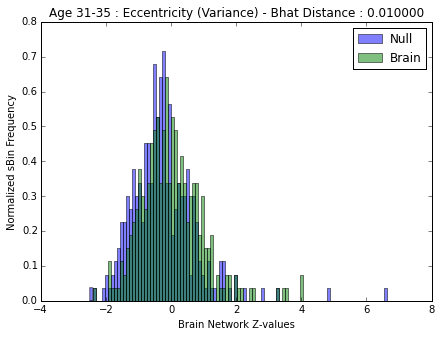

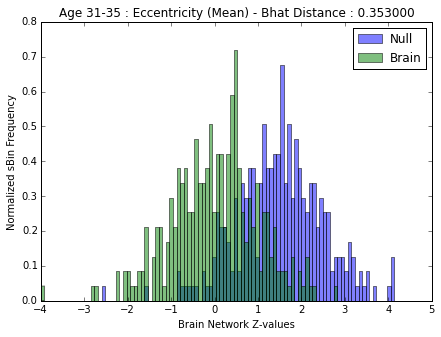

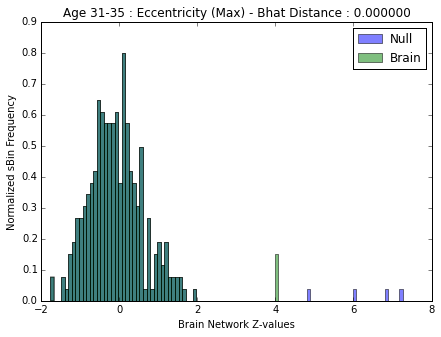

In [23]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,_,btwn,_,_ = bct.charpath(net)
        _,_,btwn_null,_,_ = bct.charpath(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    if np.ceil(mp_idx / 4) == 0:
        plot_hist(nb,['Eccentricity (Variance)', 'Eccentricity (Mean)', 'Eccentricity (Max)'], 'Age 22-25')
    elif np.ceil(mp_idx / 4) == 1:
        plot_hist(nb,['Eccentricity (Variance)', 'Eccentricity (Mean)', 'Eccentricity (Max)'], 'Age 26-30')
    else:
        plot_hist(nb,['Eccentricity (Variance)', 'Eccentricity (Mean)', 'Eccentricity (Max)'], 'Age 31-35')